In [1]:
from random import shuffle
import csv
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#define 1 deck of shuffled cards
def deck():
    deck = []
    for suit in ['H','S','D','C']:
        for rank in ['A','2','3','4','5','6','7','8','9','T','J','Q','K']:
            deck.append(suit+rank)
      
    shuffle(deck)

    return deck

In [3]:
#count how many points in the player / dealer's hand
def pointCount(myCards):
    mycount = 0
    acecount = 0
    for i in myCards:
        if(i[1] in 'TJQK'):
            mycount += 10
        elif(i[1] != 'A'):
            mycount += int(i[1])
        else:
            acecount += 1
    
    #depends on how close we are to blackjack, do we want ace to be 1 or 11? I'll let the distance from blackjack to decide.
    totalcount1 = mycount+(acecount*1)
    totalcount2 = mycount+(acecount*11)
    
    dif1 = abs(21 - totalcount1)
    dif2 = abs(21 - totalcount2)
    
    if(acecount == 1 and (dif2<dif1)):
        mycount += 11
    elif(acecount != 0):
        mycount += 1

    return mycount

In [4]:
#passing out cards to player and dealer, 1 at a time sequentially
def createPlayingHands(myDeck):
    dealerHand = []
    playerHand = []
   
    playerHand.append(myDeck.pop(0))
    dealerHand.append(myDeck.pop(0))
    playerHand.append(myDeck.pop(0))
    dealerHand.append(myDeck.pop(0)) #this is face down
    
    #currently deals dealer till 16 - this should be at the end
#     while (pointCount(dealerHand) <= 16):
#         dealerHand.append(myDeck.pop(0))

    return (dealerHand, playerHand)

In [5]:
#simple blackjack game, always a new deck to calculate winning / losing / draw percentage
def blackjackGameSim(Snum):
    myDeck = deck() #new deck all the time

    hands = createPlayingHands(myDeck)
    dealer = hands[0]
    player = hands[1]

#   this steps determines when we stand. Can be commented out to see no hit scenario.
    while (pointCount(player) <= Snum):
        player.append(myDeck.pop(0))
        
    #soft 17 dealer
    while (pointCount(dealer) <= 17):
        dealer.append(myDeck.pop(0))

    dealerCount = pointCount(dealer)
    playerCount = pointCount(player)

#     print(f'Dealer has {dealer}; total of {int(dealerCount)} points.')
#     print(f'Player has {player}; total of {int(playerCount)} points.')
    
    #decision to take another card or hit or stand etc, should be done here
    #points will need to be recounted based on decision
    #dealer will keep hitting until 16 or higher
    #if both gets blackjack in 2 cards, its a push, only get back original bet
    #if player gets 2 card black jack and dealer gets 3 card black jack, player still wins here
    
    ptCount = 0
    winCount = 0
    loseCount = 0
    drawCount = 0
    
    if((playerCount == 21) and (dealerCount == 21)):
        #draw
        ptCount +=0
        drawCount +=1
    elif(playerCount == 21):
#         print("Blackjack! Player win!")
        ptCount += 1
        winCount += 1
    elif(dealerCount == 21):
#         print("Blackjack! Dealer win!")
        ptCount += 0
        loseCount += 1
    elif(playerCount > 21):
#         print("Player Busts! With " + str(playerCount) + "points. Dealer wins!")
        ptCount += 0
        loseCount += 1
    elif(dealerCount > 21):
#         print("Dealer Busts! With " + str(dealerCount) + "points. Player wins!")
        ptCount += 1
        winCount += 1
    elif(playerCount>dealerCount):
#         print("Player Wins!")
        ptCount += 1
        winCount +=1
    elif(playerCount<dealerCount):
#         print("Dealer Wins!")
        ptCount += 0
        loseCount += 1
    elif(playerCount==dealerCount):
#         print("Draw!")
        ptCount += 0
        drawCount +=1
    return ptCount,winCount,loseCount,drawCount

In [18]:
#create dictionary to record data, to record over time data
d = defaultdict(int)
win_perc = defaultdict(float)
lose_perc = defaultdict(float)
draw_perc = defaultdict(float)

#set up the game with 1 million repetition (20 million was used initially from this code as well)
sNum = 21
n = 1000000
totalPts = 0
win = 0
lose = 0
draw = 0

num = 0
# for num in range(sNum):
for i in range(n):
    ptCount,winCount,loseCount,drawCount = blackjackGameSim(num)
    totalPts += ptCount
    win += winCount
    lose += loseCount
    draw += drawCount
    win_perc[i] = win/(i+1)
    lose_perc[i] = lose/(i+1)
    draw_perc[i] = draw/(i+1)
d[num] = totalPts
print(f'If "Stand" # is set to {num}. Total points from all {n} games is {d[num]}. Win % of {(win/n)*100}%. Lose % of {(lose/n)*100}%. Draw % of {(draw/n)*100}%.')
totalPts=0
win = 0
lose = 0
draw = 0

If "Stand" # is set to 0. Total points from all 1000000 games is 466016. Win % of 46.6016%. Lose % of 49.2871%. Draw % of 4.1113%.


In [19]:
#this will save results to csv in my folder to create graphs
my_dictionary = dict(win_perc)

with open('test6.csv', 'w') as f:
    for key in my_dictionary.keys():
        f.write("%s, %s\n" % (key, my_dictionary[key]))
        
my_dictionary = dict(lose_perc)
with open('test7.csv', 'w') as f:
    for key in my_dictionary.keys():
        f.write("%s, %s\n" % (key, my_dictionary[key]))

my_dictionary = dict(draw_perc)
with open('test8.csv', 'w') as f:
    for key in my_dictionary.keys():
        f.write("%s, %s\n" % (key, my_dictionary[key]))

In [ ]:
#testing percentage to get each stand number and it's winning percentage
d = defaultdict(int)

sNum = 21
n = 1000000
totalPts = 0
win = 0
lose = 0
draw = 0

for num in range(sNum):
    for i in range(n):
        ptCount,winCount,loseCount,drawCount = blackjackGameSim(num)
        totalPts += ptCount
        win += winCount
        lose += loseCount
        draw += drawCount
    d[num] = totalPts
    print(f'If "Stand" # is set to {num}. Total points from all {n} games is {d[num]}. Win % of {(win/n)*100}%. Lose % of {(lose/n)*100}%. Draw % of {(draw/n)*100}%.')
    totalPts=0
    win = 0
    lose = 0
    draw = 0

In [ ]:
#Stand Strategies

In [6]:
#black jack game to determine distribution for stand on 10, 11 , 12 strategy
def blackjackGame(playerBet,shoe):
    hands = createPlayingHands(shoe)
    dealer = hands[0]
    player = hands[1]

    dealerCount = pointCount(dealer)
    playerCount = pointCount(player)
    
    while (pointCount(player) <= 12): #stand number determined and changed here
        player.append(shoe.pop(0))
    while (pointCount(dealer) <= 17):
        dealer.append(shoe.pop(0))

    playerCount = pointCount(player)
    dealerCount = pointCount(dealer)
    
       
    if((playerCount == 21) and (dealerCount == 21)):
        playerBet = playerBet
    elif(playerCount == 21):
        playerBet *= 2.5
    elif(dealerCount == 21):
        playerBet -= playerBet
    elif(playerCount > 21):
        playerBet -= playerBet
    elif(dealerCount > 21):
        playerBet *= 2
    elif(playerCount>dealerCount):
        playerBet *= 2
    elif(playerCount<dealerCount):
        playerBet -= playerBet
    elif(playerCount==dealerCount):
        playerBet = playerBet
    
#     print("Dealer - " + str(dealerCount) + " points, Player - " + str(playerCount) +" points. Results this round: " + str(playerBet - 100))
    return playerBet,shoe

    

In [ ]:
#Basic Strategy

In [9]:
#blackjack game to take in basic strategy data frame
def blackjackGame(playerBet,shoe,df):
    hands = createPlayingHands(shoe)
    dealer = hands[0]
    player = hands[1]

    dealerCount = pointCount(dealer)
    playerCount = pointCount(player)
    
    df = df
    
    if (playerCount != 21):
        bStrat = df[dealer[0][1]][playerCount]
        while (bStrat != "S"):
            player.append(shoe.pop(0))
            playerCount = pointCount(player)
            if (playerCount < 20):
                bStrat = df[dealer[0][1]][playerCount]
            else:
                bStrat = "S"
    
#     while (pointCount(player) <= 12):
#         player.append(shoe.pop(0))
    while (pointCount(dealer) <= 17):
        dealer.append(shoe.pop(0))

#     playerCount = pointCount(player)
    dealerCount = pointCount(dealer)
    
       
    if((playerCount == 21) and (dealerCount == 21)):
        playerBet = playerBet
    elif(playerCount == 21):
        playerBet *= 2.5
    elif(dealerCount == 21):
        playerBet -= playerBet
    elif(playerCount > 21):
        playerBet -= playerBet
    elif(dealerCount > 21):
        playerBet *= 2
    elif(playerCount>dealerCount):
        playerBet *= 2
    elif(playerCount<dealerCount):
        playerBet -= playerBet
    elif(playerCount==dealerCount):
        playerBet = playerBet
    
#     print("Dealer - " + str(dealerCount) + " points, Player - " + str(playerCount) +" points. Results this round: " + str(playerBet - 100))
    return playerBet,shoe


In [12]:
#simulation set up

n = 1000
playerTotalAmount = 100000
playerBet = 100

myDeck = deck()
shoe = myDeck*6
shuffle(shoe)
countShoe = len(shoe)

#this was the location in my folder, also included in the zip file
df = pd.read_csv(r"C:\Users\victo\OneDrive - Georgia Institute of Technology\Victor's Stuff\ISYE 6644\project\basicstrategyorg.csv",index_col=0)

def multiGame(n,totalAmt,betAmt,shoe,countShoe,df):
    for i in range(n):
        totalAmt -= betAmt
        returnBet,remainShoe = blackjackGame(betAmt,shoe,df)
        totalAmt+=returnBet
        # print(returnBet)
    #     print("Remaining amount: " + str(playerTotalAmount))

        if(len(remainShoe)<(0.80*countShoe)):
            myDeck = deck()
            shoe = myDeck*6
            shuffle(shoe)
    
#     print("Remaining amount after "+ str(n)+" games: " + str(totalAmt))
    return totalAmt,shoe


from collections import defaultdict

d = defaultdict(int)
simulNum = 100000

for num in range(simulNum):
    returnPL,shoe = multiGame(n,playerTotalAmount,playerBet,shoe,countShoe,df)
    d[num] = returnPL
    print("updating... "+str(num)) #make sure that the code is still running and didn't stall

# print(dict(d))


updating... 0
updating... 1
updating... 2
updating... 3
updating... 4
updating... 5
updating... 6
updating... 7
updating... 8
updating... 9
updating... 10
updating... 11
updating... 12
updating... 13
updating... 14
updating... 15
updating... 16
updating... 17
updating... 18
updating... 19
updating... 20
updating... 21
updating... 22
updating... 23
updating... 24
updating... 25
updating... 26
updating... 27
updating... 28
updating... 29
updating... 30
updating... 31
updating... 32
updating... 33
updating... 34
updating... 35
updating... 36
updating... 37
updating... 38
updating... 39
updating... 40
updating... 41
updating... 42
updating... 43
updating... 44
updating... 45
updating... 46
updating... 47
updating... 48
updating... 49
updating... 50
updating... 51
updating... 52
updating... 53
updating... 54
updating... 55
updating... 56
updating... 57
updating... 58
updating... 59
updating... 60
updating... 61
updating... 62
updating... 63
updating... 64
updating... 65
updating... 66
updat

updating... 525
updating... 526
updating... 527
updating... 528
updating... 529
updating... 530
updating... 531
updating... 532
updating... 533
updating... 534
updating... 535
updating... 536
updating... 537
updating... 538
updating... 539
updating... 540
updating... 541
updating... 542
updating... 543
updating... 544
updating... 545
updating... 546
updating... 547
updating... 548
updating... 549
updating... 550
updating... 551
updating... 552
updating... 553
updating... 554
updating... 555
updating... 556
updating... 557
updating... 558
updating... 559
updating... 560
updating... 561
updating... 562
updating... 563
updating... 564
updating... 565
updating... 566
updating... 567
updating... 568
updating... 569
updating... 570
updating... 571
updating... 572
updating... 573
updating... 574
updating... 575
updating... 576
updating... 577
updating... 578
updating... 579
updating... 580
updating... 581
updating... 582
updating... 583
updating... 584
updating... 585
updating... 586
updating

updating... 1038
updating... 1039
updating... 1040
updating... 1041
updating... 1042
updating... 1043
updating... 1044
updating... 1045
updating... 1046
updating... 1047
updating... 1048
updating... 1049
updating... 1050
updating... 1051
updating... 1052
updating... 1053
updating... 1054
updating... 1055
updating... 1056
updating... 1057
updating... 1058
updating... 1059
updating... 1060
updating... 1061
updating... 1062
updating... 1063
updating... 1064
updating... 1065
updating... 1066
updating... 1067
updating... 1068
updating... 1069
updating... 1070
updating... 1071
updating... 1072
updating... 1073
updating... 1074
updating... 1075
updating... 1076
updating... 1077
updating... 1078
updating... 1079
updating... 1080
updating... 1081
updating... 1082
updating... 1083
updating... 1084
updating... 1085
updating... 1086
updating... 1087
updating... 1088
updating... 1089
updating... 1090
updating... 1091
updating... 1092
updating... 1093
updating... 1094
updating... 1095
updating... 10

updating... 1521
updating... 1522
updating... 1523
updating... 1524
updating... 1525
updating... 1526
updating... 1527
updating... 1528
updating... 1529
updating... 1530
updating... 1531
updating... 1532
updating... 1533
updating... 1534
updating... 1535
updating... 1536
updating... 1537
updating... 1538
updating... 1539
updating... 1540
updating... 1541
updating... 1542
updating... 1543
updating... 1544
updating... 1545
updating... 1546
updating... 1547
updating... 1548
updating... 1549
updating... 1550
updating... 1551
updating... 1552
updating... 1553
updating... 1554
updating... 1555
updating... 1556
updating... 1557
updating... 1558
updating... 1559
updating... 1560
updating... 1561
updating... 1562
updating... 1563
updating... 1564
updating... 1565
updating... 1566
updating... 1567
updating... 1568
updating... 1569
updating... 1570
updating... 1571
updating... 1572
updating... 1573
updating... 1574
updating... 1575
updating... 1576
updating... 1577
updating... 1578
updating... 15

updating... 2005
updating... 2006
updating... 2007
updating... 2008
updating... 2009
updating... 2010
updating... 2011
updating... 2012
updating... 2013
updating... 2014
updating... 2015
updating... 2016
updating... 2017
updating... 2018
updating... 2019
updating... 2020
updating... 2021
updating... 2022
updating... 2023
updating... 2024
updating... 2025
updating... 2026
updating... 2027
updating... 2028
updating... 2029
updating... 2030
updating... 2031
updating... 2032
updating... 2033
updating... 2034
updating... 2035
updating... 2036
updating... 2037
updating... 2038
updating... 2039
updating... 2040
updating... 2041
updating... 2042
updating... 2043
updating... 2044
updating... 2045
updating... 2046
updating... 2047
updating... 2048
updating... 2049
updating... 2050
updating... 2051
updating... 2052
updating... 2053
updating... 2054
updating... 2055
updating... 2056
updating... 2057
updating... 2058
updating... 2059
updating... 2060
updating... 2061
updating... 2062
updating... 20

updating... 2495
updating... 2496
updating... 2497
updating... 2498
updating... 2499
updating... 2500
updating... 2501
updating... 2502
updating... 2503
updating... 2504
updating... 2505
updating... 2506
updating... 2507
updating... 2508
updating... 2509
updating... 2510
updating... 2511
updating... 2512
updating... 2513
updating... 2514
updating... 2515
updating... 2516
updating... 2517
updating... 2518
updating... 2519
updating... 2520
updating... 2521
updating... 2522
updating... 2523
updating... 2524
updating... 2525
updating... 2526
updating... 2527
updating... 2528
updating... 2529
updating... 2530
updating... 2531
updating... 2532
updating... 2533
updating... 2534
updating... 2535
updating... 2536
updating... 2537
updating... 2538
updating... 2539
updating... 2540
updating... 2541
updating... 2542
updating... 2543
updating... 2544
updating... 2545
updating... 2546
updating... 2547
updating... 2548
updating... 2549
updating... 2550
updating... 2551
updating... 2552
updating... 25

updating... 2988
updating... 2989
updating... 2990
updating... 2991
updating... 2992
updating... 2993
updating... 2994
updating... 2995
updating... 2996
updating... 2997
updating... 2998
updating... 2999
updating... 3000
updating... 3001
updating... 3002
updating... 3003
updating... 3004
updating... 3005
updating... 3006
updating... 3007
updating... 3008
updating... 3009
updating... 3010
updating... 3011
updating... 3012
updating... 3013
updating... 3014
updating... 3015
updating... 3016
updating... 3017
updating... 3018
updating... 3019
updating... 3020
updating... 3021
updating... 3022
updating... 3023
updating... 3024
updating... 3025
updating... 3026
updating... 3027
updating... 3028
updating... 3029
updating... 3030
updating... 3031
updating... 3032
updating... 3033
updating... 3034
updating... 3035
updating... 3036
updating... 3037
updating... 3038
updating... 3039
updating... 3040
updating... 3041
updating... 3042
updating... 3043
updating... 3044
updating... 3045
updating... 30

updating... 3478
updating... 3479
updating... 3480
updating... 3481
updating... 3482
updating... 3483
updating... 3484
updating... 3485
updating... 3486
updating... 3487
updating... 3488
updating... 3489
updating... 3490
updating... 3491
updating... 3492
updating... 3493
updating... 3494
updating... 3495
updating... 3496
updating... 3497
updating... 3498
updating... 3499
updating... 3500
updating... 3501
updating... 3502
updating... 3503
updating... 3504
updating... 3505
updating... 3506
updating... 3507
updating... 3508
updating... 3509
updating... 3510
updating... 3511
updating... 3512
updating... 3513
updating... 3514
updating... 3515
updating... 3516
updating... 3517
updating... 3518
updating... 3519
updating... 3520
updating... 3521
updating... 3522
updating... 3523
updating... 3524
updating... 3525
updating... 3526
updating... 3527
updating... 3528
updating... 3529
updating... 3530
updating... 3531
updating... 3532
updating... 3533
updating... 3534
updating... 3535
updating... 35

updating... 3969
updating... 3970
updating... 3971
updating... 3972
updating... 3973
updating... 3974
updating... 3975
updating... 3976
updating... 3977
updating... 3978
updating... 3979
updating... 3980
updating... 3981
updating... 3982
updating... 3983
updating... 3984
updating... 3985
updating... 3986
updating... 3987
updating... 3988
updating... 3989
updating... 3990
updating... 3991
updating... 3992
updating... 3993
updating... 3994
updating... 3995
updating... 3996
updating... 3997
updating... 3998
updating... 3999
updating... 4000
updating... 4001
updating... 4002
updating... 4003
updating... 4004
updating... 4005
updating... 4006
updating... 4007
updating... 4008
updating... 4009
updating... 4010
updating... 4011
updating... 4012
updating... 4013
updating... 4014
updating... 4015
updating... 4016
updating... 4017
updating... 4018
updating... 4019
updating... 4020
updating... 4021
updating... 4022
updating... 4023
updating... 4024
updating... 4025
updating... 4026
updating... 40

updating... 4452
updating... 4453
updating... 4454
updating... 4455
updating... 4456
updating... 4457
updating... 4458
updating... 4459
updating... 4460
updating... 4461
updating... 4462
updating... 4463
updating... 4464
updating... 4465
updating... 4466
updating... 4467
updating... 4468
updating... 4469
updating... 4470
updating... 4471
updating... 4472
updating... 4473
updating... 4474
updating... 4475
updating... 4476
updating... 4477
updating... 4478
updating... 4479
updating... 4480
updating... 4481
updating... 4482
updating... 4483
updating... 4484
updating... 4485
updating... 4486
updating... 4487
updating... 4488
updating... 4489
updating... 4490
updating... 4491
updating... 4492
updating... 4493
updating... 4494
updating... 4495
updating... 4496
updating... 4497
updating... 4498
updating... 4499
updating... 4500
updating... 4501
updating... 4502
updating... 4503
updating... 4504
updating... 4505
updating... 4506
updating... 4507
updating... 4508
updating... 4509
updating... 45

updating... 4936
updating... 4937
updating... 4938
updating... 4939
updating... 4940
updating... 4941
updating... 4942
updating... 4943
updating... 4944
updating... 4945
updating... 4946
updating... 4947
updating... 4948
updating... 4949
updating... 4950
updating... 4951
updating... 4952
updating... 4953
updating... 4954
updating... 4955
updating... 4956
updating... 4957
updating... 4958
updating... 4959
updating... 4960
updating... 4961
updating... 4962
updating... 4963
updating... 4964
updating... 4965
updating... 4966
updating... 4967
updating... 4968
updating... 4969
updating... 4970
updating... 4971
updating... 4972
updating... 4973
updating... 4974
updating... 4975
updating... 4976
updating... 4977
updating... 4978
updating... 4979
updating... 4980
updating... 4981
updating... 4982
updating... 4983
updating... 4984
updating... 4985
updating... 4986
updating... 4987
updating... 4988
updating... 4989
updating... 4990
updating... 4991
updating... 4992
updating... 4993
updating... 49

updating... 5423
updating... 5424
updating... 5425
updating... 5426
updating... 5427
updating... 5428
updating... 5429
updating... 5430
updating... 5431
updating... 5432
updating... 5433
updating... 5434
updating... 5435
updating... 5436
updating... 5437
updating... 5438
updating... 5439
updating... 5440
updating... 5441
updating... 5442
updating... 5443
updating... 5444
updating... 5445
updating... 5446
updating... 5447
updating... 5448
updating... 5449
updating... 5450
updating... 5451
updating... 5452
updating... 5453
updating... 5454
updating... 5455
updating... 5456
updating... 5457
updating... 5458
updating... 5459
updating... 5460
updating... 5461
updating... 5462
updating... 5463
updating... 5464
updating... 5465
updating... 5466
updating... 5467
updating... 5468
updating... 5469
updating... 5470
updating... 5471
updating... 5472
updating... 5473
updating... 5474
updating... 5475
updating... 5476
updating... 5477
updating... 5478
updating... 5479
updating... 5480
updating... 54

updating... 5905
updating... 5906
updating... 5907
updating... 5908
updating... 5909
updating... 5910
updating... 5911
updating... 5912
updating... 5913
updating... 5914
updating... 5915
updating... 5916
updating... 5917
updating... 5918
updating... 5919
updating... 5920
updating... 5921
updating... 5922
updating... 5923
updating... 5924
updating... 5925
updating... 5926
updating... 5927
updating... 5928
updating... 5929
updating... 5930
updating... 5931
updating... 5932
updating... 5933
updating... 5934
updating... 5935
updating... 5936
updating... 5937
updating... 5938
updating... 5939
updating... 5940
updating... 5941
updating... 5942
updating... 5943
updating... 5944
updating... 5945
updating... 5946
updating... 5947
updating... 5948
updating... 5949
updating... 5950
updating... 5951
updating... 5952
updating... 5953
updating... 5954
updating... 5955
updating... 5956
updating... 5957
updating... 5958
updating... 5959
updating... 5960
updating... 5961
updating... 5962
updating... 59

updating... 6394
updating... 6395
updating... 6396
updating... 6397
updating... 6398
updating... 6399
updating... 6400
updating... 6401
updating... 6402
updating... 6403
updating... 6404
updating... 6405
updating... 6406
updating... 6407
updating... 6408
updating... 6409
updating... 6410
updating... 6411
updating... 6412
updating... 6413
updating... 6414
updating... 6415
updating... 6416
updating... 6417
updating... 6418
updating... 6419
updating... 6420
updating... 6421
updating... 6422
updating... 6423
updating... 6424
updating... 6425
updating... 6426
updating... 6427
updating... 6428
updating... 6429
updating... 6430
updating... 6431
updating... 6432
updating... 6433
updating... 6434
updating... 6435
updating... 6436
updating... 6437
updating... 6438
updating... 6439
updating... 6440
updating... 6441
updating... 6442
updating... 6443
updating... 6444
updating... 6445
updating... 6446
updating... 6447
updating... 6448
updating... 6449
updating... 6450
updating... 6451
updating... 64

updating... 6879
updating... 6880
updating... 6881
updating... 6882
updating... 6883
updating... 6884
updating... 6885
updating... 6886
updating... 6887
updating... 6888
updating... 6889
updating... 6890
updating... 6891
updating... 6892
updating... 6893
updating... 6894
updating... 6895
updating... 6896
updating... 6897
updating... 6898
updating... 6899
updating... 6900
updating... 6901
updating... 6902
updating... 6903
updating... 6904
updating... 6905
updating... 6906
updating... 6907
updating... 6908
updating... 6909
updating... 6910
updating... 6911
updating... 6912
updating... 6913
updating... 6914
updating... 6915
updating... 6916
updating... 6917
updating... 6918
updating... 6919
updating... 6920
updating... 6921
updating... 6922
updating... 6923
updating... 6924
updating... 6925
updating... 6926
updating... 6927
updating... 6928
updating... 6929
updating... 6930
updating... 6931
updating... 6932
updating... 6933
updating... 6934
updating... 6935
updating... 6936
updating... 69

updating... 7367
updating... 7368
updating... 7369
updating... 7370
updating... 7371
updating... 7372
updating... 7373
updating... 7374
updating... 7375
updating... 7376
updating... 7377
updating... 7378
updating... 7379
updating... 7380
updating... 7381
updating... 7382
updating... 7383
updating... 7384
updating... 7385
updating... 7386
updating... 7387
updating... 7388
updating... 7389
updating... 7390
updating... 7391
updating... 7392
updating... 7393
updating... 7394
updating... 7395
updating... 7396
updating... 7397
updating... 7398
updating... 7399
updating... 7400
updating... 7401
updating... 7402
updating... 7403
updating... 7404
updating... 7405
updating... 7406
updating... 7407
updating... 7408
updating... 7409
updating... 7410
updating... 7411
updating... 7412
updating... 7413
updating... 7414
updating... 7415
updating... 7416
updating... 7417
updating... 7418
updating... 7419
updating... 7420
updating... 7421
updating... 7422
updating... 7423
updating... 7424
updating... 74

updating... 7850
updating... 7851
updating... 7852
updating... 7853
updating... 7854
updating... 7855
updating... 7856
updating... 7857
updating... 7858
updating... 7859
updating... 7860
updating... 7861
updating... 7862
updating... 7863
updating... 7864
updating... 7865
updating... 7866
updating... 7867
updating... 7868
updating... 7869
updating... 7870
updating... 7871
updating... 7872
updating... 7873
updating... 7874
updating... 7875
updating... 7876
updating... 7877
updating... 7878
updating... 7879
updating... 7880
updating... 7881
updating... 7882
updating... 7883
updating... 7884
updating... 7885
updating... 7886
updating... 7887
updating... 7888
updating... 7889
updating... 7890
updating... 7891
updating... 7892
updating... 7893
updating... 7894
updating... 7895
updating... 7896
updating... 7897
updating... 7898
updating... 7899
updating... 7900
updating... 7901
updating... 7902
updating... 7903
updating... 7904
updating... 7905
updating... 7906
updating... 7907
updating... 79

updating... 8340
updating... 8341
updating... 8342
updating... 8343
updating... 8344
updating... 8345
updating... 8346
updating... 8347
updating... 8348
updating... 8349
updating... 8350
updating... 8351
updating... 8352
updating... 8353
updating... 8354
updating... 8355
updating... 8356
updating... 8357
updating... 8358
updating... 8359
updating... 8360
updating... 8361
updating... 8362
updating... 8363
updating... 8364
updating... 8365
updating... 8366
updating... 8367
updating... 8368
updating... 8369
updating... 8370
updating... 8371
updating... 8372
updating... 8373
updating... 8374
updating... 8375
updating... 8376
updating... 8377
updating... 8378
updating... 8379
updating... 8380
updating... 8381
updating... 8382
updating... 8383
updating... 8384
updating... 8385
updating... 8386
updating... 8387
updating... 8388
updating... 8389
updating... 8390
updating... 8391
updating... 8392
updating... 8393
updating... 8394
updating... 8395
updating... 8396
updating... 8397
updating... 83

updating... 8830
updating... 8831
updating... 8832
updating... 8833
updating... 8834
updating... 8835
updating... 8836
updating... 8837
updating... 8838
updating... 8839
updating... 8840
updating... 8841
updating... 8842
updating... 8843
updating... 8844
updating... 8845
updating... 8846
updating... 8847
updating... 8848
updating... 8849
updating... 8850
updating... 8851
updating... 8852
updating... 8853
updating... 8854
updating... 8855
updating... 8856
updating... 8857
updating... 8858
updating... 8859
updating... 8860
updating... 8861
updating... 8862
updating... 8863
updating... 8864
updating... 8865
updating... 8866
updating... 8867
updating... 8868
updating... 8869
updating... 8870
updating... 8871
updating... 8872
updating... 8873
updating... 8874
updating... 8875
updating... 8876
updating... 8877
updating... 8878
updating... 8879
updating... 8880
updating... 8881
updating... 8882
updating... 8883
updating... 8884
updating... 8885
updating... 8886
updating... 8887
updating... 88

updating... 9314
updating... 9315
updating... 9316
updating... 9317
updating... 9318
updating... 9319
updating... 9320
updating... 9321
updating... 9322
updating... 9323
updating... 9324
updating... 9325
updating... 9326
updating... 9327
updating... 9328
updating... 9329
updating... 9330
updating... 9331
updating... 9332
updating... 9333
updating... 9334
updating... 9335
updating... 9336
updating... 9337
updating... 9338
updating... 9339
updating... 9340
updating... 9341
updating... 9342
updating... 9343
updating... 9344
updating... 9345
updating... 9346
updating... 9347
updating... 9348
updating... 9349
updating... 9350
updating... 9351
updating... 9352
updating... 9353
updating... 9354
updating... 9355
updating... 9356
updating... 9357
updating... 9358
updating... 9359
updating... 9360
updating... 9361
updating... 9362
updating... 9363
updating... 9364
updating... 9365
updating... 9366
updating... 9367
updating... 9368
updating... 9369
updating... 9370
updating... 9371
updating... 93

updating... 9799
updating... 9800
updating... 9801
updating... 9802
updating... 9803
updating... 9804
updating... 9805
updating... 9806
updating... 9807
updating... 9808
updating... 9809
updating... 9810
updating... 9811
updating... 9812
updating... 9813
updating... 9814
updating... 9815
updating... 9816
updating... 9817
updating... 9818
updating... 9819
updating... 9820
updating... 9821
updating... 9822
updating... 9823
updating... 9824
updating... 9825
updating... 9826
updating... 9827
updating... 9828
updating... 9829
updating... 9830
updating... 9831
updating... 9832
updating... 9833
updating... 9834
updating... 9835
updating... 9836
updating... 9837
updating... 9838
updating... 9839
updating... 9840
updating... 9841
updating... 9842
updating... 9843
updating... 9844
updating... 9845
updating... 9846
updating... 9847
updating... 9848
updating... 9849
updating... 9850
updating... 9851
updating... 9852
updating... 9853
updating... 9854
updating... 9855
updating... 9856
updating... 98

updating... 10273
updating... 10274
updating... 10275
updating... 10276
updating... 10277
updating... 10278
updating... 10279
updating... 10280
updating... 10281
updating... 10282
updating... 10283
updating... 10284
updating... 10285
updating... 10286
updating... 10287
updating... 10288
updating... 10289
updating... 10290
updating... 10291
updating... 10292
updating... 10293
updating... 10294
updating... 10295
updating... 10296
updating... 10297
updating... 10298
updating... 10299
updating... 10300
updating... 10301
updating... 10302
updating... 10303
updating... 10304
updating... 10305
updating... 10306
updating... 10307
updating... 10308
updating... 10309
updating... 10310
updating... 10311
updating... 10312
updating... 10313
updating... 10314
updating... 10315
updating... 10316
updating... 10317
updating... 10318
updating... 10319
updating... 10320
updating... 10321
updating... 10322
updating... 10323
updating... 10324
updating... 10325
updating... 10326
updating... 10327
updating..

updating... 10729
updating... 10730
updating... 10731
updating... 10732
updating... 10733
updating... 10734
updating... 10735
updating... 10736
updating... 10737
updating... 10738
updating... 10739
updating... 10740
updating... 10741
updating... 10742
updating... 10743
updating... 10744
updating... 10745
updating... 10746
updating... 10747
updating... 10748
updating... 10749
updating... 10750
updating... 10751
updating... 10752
updating... 10753
updating... 10754
updating... 10755
updating... 10756
updating... 10757
updating... 10758
updating... 10759
updating... 10760
updating... 10761
updating... 10762
updating... 10763
updating... 10764
updating... 10765
updating... 10766
updating... 10767
updating... 10768
updating... 10769
updating... 10770
updating... 10771
updating... 10772
updating... 10773
updating... 10774
updating... 10775
updating... 10776
updating... 10777
updating... 10778
updating... 10779
updating... 10780
updating... 10781
updating... 10782
updating... 10783
updating..

updating... 11191
updating... 11192
updating... 11193
updating... 11194
updating... 11195
updating... 11196
updating... 11197
updating... 11198
updating... 11199
updating... 11200
updating... 11201
updating... 11202
updating... 11203
updating... 11204
updating... 11205
updating... 11206
updating... 11207
updating... 11208
updating... 11209
updating... 11210
updating... 11211
updating... 11212
updating... 11213
updating... 11214
updating... 11215
updating... 11216
updating... 11217
updating... 11218
updating... 11219
updating... 11220
updating... 11221
updating... 11222
updating... 11223
updating... 11224
updating... 11225
updating... 11226
updating... 11227
updating... 11228
updating... 11229
updating... 11230
updating... 11231
updating... 11232
updating... 11233
updating... 11234
updating... 11235
updating... 11236
updating... 11237
updating... 11238
updating... 11239
updating... 11240
updating... 11241
updating... 11242
updating... 11243
updating... 11244
updating... 11245
updating..

updating... 11649
updating... 11650
updating... 11651
updating... 11652
updating... 11653
updating... 11654
updating... 11655
updating... 11656
updating... 11657
updating... 11658
updating... 11659
updating... 11660
updating... 11661
updating... 11662
updating... 11663
updating... 11664
updating... 11665
updating... 11666
updating... 11667
updating... 11668
updating... 11669
updating... 11670
updating... 11671
updating... 11672
updating... 11673
updating... 11674
updating... 11675
updating... 11676
updating... 11677
updating... 11678
updating... 11679
updating... 11680
updating... 11681
updating... 11682
updating... 11683
updating... 11684
updating... 11685
updating... 11686
updating... 11687
updating... 11688
updating... 11689
updating... 11690
updating... 11691
updating... 11692
updating... 11693
updating... 11694
updating... 11695
updating... 11696
updating... 11697
updating... 11698
updating... 11699
updating... 11700
updating... 11701
updating... 11702
updating... 11703
updating..

updating... 12113
updating... 12114
updating... 12115
updating... 12116
updating... 12117
updating... 12118
updating... 12119
updating... 12120
updating... 12121
updating... 12122
updating... 12123
updating... 12124
updating... 12125
updating... 12126
updating... 12127
updating... 12128
updating... 12129
updating... 12130
updating... 12131
updating... 12132
updating... 12133
updating... 12134
updating... 12135
updating... 12136
updating... 12137
updating... 12138
updating... 12139
updating... 12140
updating... 12141
updating... 12142
updating... 12143
updating... 12144
updating... 12145
updating... 12146
updating... 12147
updating... 12148
updating... 12149
updating... 12150
updating... 12151
updating... 12152
updating... 12153
updating... 12154
updating... 12155
updating... 12156
updating... 12157
updating... 12158
updating... 12159
updating... 12160
updating... 12161
updating... 12162
updating... 12163
updating... 12164
updating... 12165
updating... 12166
updating... 12167
updating..

updating... 12577
updating... 12578
updating... 12579
updating... 12580
updating... 12581
updating... 12582
updating... 12583
updating... 12584
updating... 12585
updating... 12586
updating... 12587
updating... 12588
updating... 12589
updating... 12590
updating... 12591
updating... 12592
updating... 12593
updating... 12594
updating... 12595
updating... 12596
updating... 12597
updating... 12598
updating... 12599
updating... 12600
updating... 12601
updating... 12602
updating... 12603
updating... 12604
updating... 12605
updating... 12606
updating... 12607
updating... 12608
updating... 12609
updating... 12610
updating... 12611
updating... 12612
updating... 12613
updating... 12614
updating... 12615
updating... 12616
updating... 12617
updating... 12618
updating... 12619
updating... 12620
updating... 12621
updating... 12622
updating... 12623
updating... 12624
updating... 12625
updating... 12626
updating... 12627
updating... 12628
updating... 12629
updating... 12630
updating... 12631
updating..

updating... 13047
updating... 13048
updating... 13049
updating... 13050
updating... 13051
updating... 13052
updating... 13053
updating... 13054
updating... 13055
updating... 13056
updating... 13057
updating... 13058
updating... 13059
updating... 13060
updating... 13061
updating... 13062
updating... 13063
updating... 13064
updating... 13065
updating... 13066
updating... 13067
updating... 13068
updating... 13069
updating... 13070
updating... 13071
updating... 13072
updating... 13073
updating... 13074
updating... 13075
updating... 13076
updating... 13077
updating... 13078
updating... 13079
updating... 13080
updating... 13081
updating... 13082
updating... 13083
updating... 13084
updating... 13085
updating... 13086
updating... 13087
updating... 13088
updating... 13089
updating... 13090
updating... 13091
updating... 13092
updating... 13093
updating... 13094
updating... 13095
updating... 13096
updating... 13097
updating... 13098
updating... 13099
updating... 13100
updating... 13101
updating..

updating... 13505
updating... 13506
updating... 13507
updating... 13508
updating... 13509
updating... 13510
updating... 13511
updating... 13512
updating... 13513
updating... 13514
updating... 13515
updating... 13516
updating... 13517
updating... 13518
updating... 13519
updating... 13520
updating... 13521
updating... 13522
updating... 13523
updating... 13524
updating... 13525
updating... 13526
updating... 13527
updating... 13528
updating... 13529
updating... 13530
updating... 13531
updating... 13532
updating... 13533
updating... 13534
updating... 13535
updating... 13536
updating... 13537
updating... 13538
updating... 13539
updating... 13540
updating... 13541
updating... 13542
updating... 13543
updating... 13544
updating... 13545
updating... 13546
updating... 13547
updating... 13548
updating... 13549
updating... 13550
updating... 13551
updating... 13552
updating... 13553
updating... 13554
updating... 13555
updating... 13556
updating... 13557
updating... 13558
updating... 13559
updating..

updating... 13970
updating... 13971
updating... 13972
updating... 13973
updating... 13974
updating... 13975
updating... 13976
updating... 13977
updating... 13978
updating... 13979
updating... 13980
updating... 13981
updating... 13982
updating... 13983
updating... 13984
updating... 13985
updating... 13986
updating... 13987
updating... 13988
updating... 13989
updating... 13990
updating... 13991
updating... 13992
updating... 13993
updating... 13994
updating... 13995
updating... 13996
updating... 13997
updating... 13998
updating... 13999
updating... 14000
updating... 14001
updating... 14002
updating... 14003
updating... 14004
updating... 14005
updating... 14006
updating... 14007
updating... 14008
updating... 14009
updating... 14010
updating... 14011
updating... 14012
updating... 14013
updating... 14014
updating... 14015
updating... 14016
updating... 14017
updating... 14018
updating... 14019
updating... 14020
updating... 14021
updating... 14022
updating... 14023
updating... 14024
updating..

updating... 14434
updating... 14435
updating... 14436
updating... 14437
updating... 14438
updating... 14439
updating... 14440
updating... 14441
updating... 14442
updating... 14443
updating... 14444
updating... 14445
updating... 14446
updating... 14447
updating... 14448
updating... 14449
updating... 14450
updating... 14451
updating... 14452
updating... 14453
updating... 14454
updating... 14455
updating... 14456
updating... 14457
updating... 14458
updating... 14459
updating... 14460
updating... 14461
updating... 14462
updating... 14463
updating... 14464
updating... 14465
updating... 14466
updating... 14467
updating... 14468
updating... 14469
updating... 14470
updating... 14471
updating... 14472
updating... 14473
updating... 14474
updating... 14475
updating... 14476
updating... 14477
updating... 14478
updating... 14479
updating... 14480
updating... 14481
updating... 14482
updating... 14483
updating... 14484
updating... 14485
updating... 14486
updating... 14487
updating... 14488
updating..

updating... 14897
updating... 14898
updating... 14899
updating... 14900
updating... 14901
updating... 14902
updating... 14903
updating... 14904
updating... 14905
updating... 14906
updating... 14907
updating... 14908
updating... 14909
updating... 14910
updating... 14911
updating... 14912
updating... 14913
updating... 14914
updating... 14915
updating... 14916
updating... 14917
updating... 14918
updating... 14919
updating... 14920
updating... 14921
updating... 14922
updating... 14923
updating... 14924
updating... 14925
updating... 14926
updating... 14927
updating... 14928
updating... 14929
updating... 14930
updating... 14931
updating... 14932
updating... 14933
updating... 14934
updating... 14935
updating... 14936
updating... 14937
updating... 14938
updating... 14939
updating... 14940
updating... 14941
updating... 14942
updating... 14943
updating... 14944
updating... 14945
updating... 14946
updating... 14947
updating... 14948
updating... 14949
updating... 14950
updating... 14951
updating..

updating... 15355
updating... 15356
updating... 15357
updating... 15358
updating... 15359
updating... 15360
updating... 15361
updating... 15362
updating... 15363
updating... 15364
updating... 15365
updating... 15366
updating... 15367
updating... 15368
updating... 15369
updating... 15370
updating... 15371
updating... 15372
updating... 15373
updating... 15374
updating... 15375
updating... 15376
updating... 15377
updating... 15378
updating... 15379
updating... 15380
updating... 15381
updating... 15382
updating... 15383
updating... 15384
updating... 15385
updating... 15386
updating... 15387
updating... 15388
updating... 15389
updating... 15390
updating... 15391
updating... 15392
updating... 15393
updating... 15394
updating... 15395
updating... 15396
updating... 15397
updating... 15398
updating... 15399
updating... 15400
updating... 15401
updating... 15402
updating... 15403
updating... 15404
updating... 15405
updating... 15406
updating... 15407
updating... 15408
updating... 15409
updating..

updating... 15815
updating... 15816
updating... 15817
updating... 15818
updating... 15819
updating... 15820
updating... 15821
updating... 15822
updating... 15823
updating... 15824
updating... 15825
updating... 15826
updating... 15827
updating... 15828
updating... 15829
updating... 15830
updating... 15831
updating... 15832
updating... 15833
updating... 15834
updating... 15835
updating... 15836
updating... 15837
updating... 15838
updating... 15839
updating... 15840
updating... 15841
updating... 15842
updating... 15843
updating... 15844
updating... 15845
updating... 15846
updating... 15847
updating... 15848
updating... 15849
updating... 15850
updating... 15851
updating... 15852
updating... 15853
updating... 15854
updating... 15855
updating... 15856
updating... 15857
updating... 15858
updating... 15859
updating... 15860
updating... 15861
updating... 15862
updating... 15863
updating... 15864
updating... 15865
updating... 15866
updating... 15867
updating... 15868
updating... 15869
updating..

updating... 16279
updating... 16280
updating... 16281
updating... 16282
updating... 16283
updating... 16284
updating... 16285
updating... 16286
updating... 16287
updating... 16288
updating... 16289
updating... 16290
updating... 16291
updating... 16292
updating... 16293
updating... 16294
updating... 16295
updating... 16296
updating... 16297
updating... 16298
updating... 16299
updating... 16300
updating... 16301
updating... 16302
updating... 16303
updating... 16304
updating... 16305
updating... 16306
updating... 16307
updating... 16308
updating... 16309
updating... 16310
updating... 16311
updating... 16312
updating... 16313
updating... 16314
updating... 16315
updating... 16316
updating... 16317
updating... 16318
updating... 16319
updating... 16320
updating... 16321
updating... 16322
updating... 16323
updating... 16324
updating... 16325
updating... 16326
updating... 16327
updating... 16328
updating... 16329
updating... 16330
updating... 16331
updating... 16332
updating... 16333
updating..

updating... 16736
updating... 16737
updating... 16738
updating... 16739
updating... 16740
updating... 16741
updating... 16742
updating... 16743
updating... 16744
updating... 16745
updating... 16746
updating... 16747
updating... 16748
updating... 16749
updating... 16750
updating... 16751
updating... 16752
updating... 16753
updating... 16754
updating... 16755
updating... 16756
updating... 16757
updating... 16758
updating... 16759
updating... 16760
updating... 16761
updating... 16762
updating... 16763
updating... 16764
updating... 16765
updating... 16766
updating... 16767
updating... 16768
updating... 16769
updating... 16770
updating... 16771
updating... 16772
updating... 16773
updating... 16774
updating... 16775
updating... 16776
updating... 16777
updating... 16778
updating... 16779
updating... 16780
updating... 16781
updating... 16782
updating... 16783
updating... 16784
updating... 16785
updating... 16786
updating... 16787
updating... 16788
updating... 16789
updating... 16790
updating..

updating... 17201
updating... 17202
updating... 17203
updating... 17204
updating... 17205
updating... 17206
updating... 17207
updating... 17208
updating... 17209
updating... 17210
updating... 17211
updating... 17212
updating... 17213
updating... 17214
updating... 17215
updating... 17216
updating... 17217
updating... 17218
updating... 17219
updating... 17220
updating... 17221
updating... 17222
updating... 17223
updating... 17224
updating... 17225
updating... 17226
updating... 17227
updating... 17228
updating... 17229
updating... 17230
updating... 17231
updating... 17232
updating... 17233
updating... 17234
updating... 17235
updating... 17236
updating... 17237
updating... 17238
updating... 17239
updating... 17240
updating... 17241
updating... 17242
updating... 17243
updating... 17244
updating... 17245
updating... 17246
updating... 17247
updating... 17248
updating... 17249
updating... 17250
updating... 17251
updating... 17252
updating... 17253
updating... 17254
updating... 17255
updating..

updating... 17659
updating... 17660
updating... 17661
updating... 17662
updating... 17663
updating... 17664
updating... 17665
updating... 17666
updating... 17667
updating... 17668
updating... 17669
updating... 17670
updating... 17671
updating... 17672
updating... 17673
updating... 17674
updating... 17675
updating... 17676
updating... 17677
updating... 17678
updating... 17679
updating... 17680
updating... 17681
updating... 17682
updating... 17683
updating... 17684
updating... 17685
updating... 17686
updating... 17687
updating... 17688
updating... 17689
updating... 17690
updating... 17691
updating... 17692
updating... 17693
updating... 17694
updating... 17695
updating... 17696
updating... 17697
updating... 17698
updating... 17699
updating... 17700
updating... 17701
updating... 17702
updating... 17703
updating... 17704
updating... 17705
updating... 17706
updating... 17707
updating... 17708
updating... 17709
updating... 17710
updating... 17711
updating... 17712
updating... 17713
updating..

updating... 18123
updating... 18124
updating... 18125
updating... 18126
updating... 18127
updating... 18128
updating... 18129
updating... 18130
updating... 18131
updating... 18132
updating... 18133
updating... 18134
updating... 18135
updating... 18136
updating... 18137
updating... 18138
updating... 18139
updating... 18140
updating... 18141
updating... 18142
updating... 18143
updating... 18144
updating... 18145
updating... 18146
updating... 18147
updating... 18148
updating... 18149
updating... 18150
updating... 18151
updating... 18152
updating... 18153
updating... 18154
updating... 18155
updating... 18156
updating... 18157
updating... 18158
updating... 18159
updating... 18160
updating... 18161
updating... 18162
updating... 18163
updating... 18164
updating... 18165
updating... 18166
updating... 18167
updating... 18168
updating... 18169
updating... 18170
updating... 18171
updating... 18172
updating... 18173
updating... 18174
updating... 18175
updating... 18176
updating... 18177
updating..

updating... 18584
updating... 18585
updating... 18586
updating... 18587
updating... 18588
updating... 18589
updating... 18590
updating... 18591
updating... 18592
updating... 18593
updating... 18594
updating... 18595
updating... 18596
updating... 18597
updating... 18598
updating... 18599
updating... 18600
updating... 18601
updating... 18602
updating... 18603
updating... 18604
updating... 18605
updating... 18606
updating... 18607
updating... 18608
updating... 18609
updating... 18610
updating... 18611
updating... 18612
updating... 18613
updating... 18614
updating... 18615
updating... 18616
updating... 18617
updating... 18618
updating... 18619
updating... 18620
updating... 18621
updating... 18622
updating... 18623
updating... 18624
updating... 18625
updating... 18626
updating... 18627
updating... 18628
updating... 18629
updating... 18630
updating... 18631
updating... 18632
updating... 18633
updating... 18634
updating... 18635
updating... 18636
updating... 18637
updating... 18638
updating..

updating... 19047
updating... 19048
updating... 19049
updating... 19050
updating... 19051
updating... 19052
updating... 19053
updating... 19054
updating... 19055
updating... 19056
updating... 19057
updating... 19058
updating... 19059
updating... 19060
updating... 19061
updating... 19062
updating... 19063
updating... 19064
updating... 19065
updating... 19066
updating... 19067
updating... 19068
updating... 19069
updating... 19070
updating... 19071
updating... 19072
updating... 19073
updating... 19074
updating... 19075
updating... 19076
updating... 19077
updating... 19078
updating... 19079
updating... 19080
updating... 19081
updating... 19082
updating... 19083
updating... 19084
updating... 19085
updating... 19086
updating... 19087
updating... 19088
updating... 19089
updating... 19090
updating... 19091
updating... 19092
updating... 19093
updating... 19094
updating... 19095
updating... 19096
updating... 19097
updating... 19098
updating... 19099
updating... 19100
updating... 19101
updating..

updating... 19508
updating... 19509
updating... 19510
updating... 19511
updating... 19512
updating... 19513
updating... 19514
updating... 19515
updating... 19516
updating... 19517
updating... 19518
updating... 19519
updating... 19520
updating... 19521
updating... 19522
updating... 19523
updating... 19524
updating... 19525
updating... 19526
updating... 19527
updating... 19528
updating... 19529
updating... 19530
updating... 19531
updating... 19532
updating... 19533
updating... 19534
updating... 19535
updating... 19536
updating... 19537
updating... 19538
updating... 19539
updating... 19540
updating... 19541
updating... 19542
updating... 19543
updating... 19544
updating... 19545
updating... 19546
updating... 19547
updating... 19548
updating... 19549
updating... 19550
updating... 19551
updating... 19552
updating... 19553
updating... 19554
updating... 19555
updating... 19556
updating... 19557
updating... 19558
updating... 19559
updating... 19560
updating... 19561
updating... 19562
updating..

updating... 19971
updating... 19972
updating... 19973
updating... 19974
updating... 19975
updating... 19976
updating... 19977
updating... 19978
updating... 19979
updating... 19980
updating... 19981
updating... 19982
updating... 19983
updating... 19984
updating... 19985
updating... 19986
updating... 19987
updating... 19988
updating... 19989
updating... 19990
updating... 19991
updating... 19992
updating... 19993
updating... 19994
updating... 19995
updating... 19996
updating... 19997
updating... 19998
updating... 19999
updating... 20000
updating... 20001
updating... 20002
updating... 20003
updating... 20004
updating... 20005
updating... 20006
updating... 20007
updating... 20008
updating... 20009
updating... 20010
updating... 20011
updating... 20012
updating... 20013
updating... 20014
updating... 20015
updating... 20016
updating... 20017
updating... 20018
updating... 20019
updating... 20020
updating... 20021
updating... 20022
updating... 20023
updating... 20024
updating... 20025
updating..

updating... 20436
updating... 20437
updating... 20438
updating... 20439
updating... 20440
updating... 20441
updating... 20442
updating... 20443
updating... 20444
updating... 20445
updating... 20446
updating... 20447
updating... 20448
updating... 20449
updating... 20450
updating... 20451
updating... 20452
updating... 20453
updating... 20454
updating... 20455
updating... 20456
updating... 20457
updating... 20458
updating... 20459
updating... 20460
updating... 20461
updating... 20462
updating... 20463
updating... 20464
updating... 20465
updating... 20466
updating... 20467
updating... 20468
updating... 20469
updating... 20470
updating... 20471
updating... 20472
updating... 20473
updating... 20474
updating... 20475
updating... 20476
updating... 20477
updating... 20478
updating... 20479
updating... 20480
updating... 20481
updating... 20482
updating... 20483
updating... 20484
updating... 20485
updating... 20486
updating... 20487
updating... 20488
updating... 20489
updating... 20490
updating..

updating... 20893
updating... 20894
updating... 20895
updating... 20896
updating... 20897
updating... 20898
updating... 20899
updating... 20900
updating... 20901
updating... 20902
updating... 20903
updating... 20904
updating... 20905
updating... 20906
updating... 20907
updating... 20908
updating... 20909
updating... 20910
updating... 20911
updating... 20912
updating... 20913
updating... 20914
updating... 20915
updating... 20916
updating... 20917
updating... 20918
updating... 20919
updating... 20920
updating... 20921
updating... 20922
updating... 20923
updating... 20924
updating... 20925
updating... 20926
updating... 20927
updating... 20928
updating... 20929
updating... 20930
updating... 20931
updating... 20932
updating... 20933
updating... 20934
updating... 20935
updating... 20936
updating... 20937
updating... 20938
updating... 20939
updating... 20940
updating... 20941
updating... 20942
updating... 20943
updating... 20944
updating... 20945
updating... 20946
updating... 20947
updating..

updating... 21358
updating... 21359
updating... 21360
updating... 21361
updating... 21362
updating... 21363
updating... 21364
updating... 21365
updating... 21366
updating... 21367
updating... 21368
updating... 21369
updating... 21370
updating... 21371
updating... 21372
updating... 21373
updating... 21374
updating... 21375
updating... 21376
updating... 21377
updating... 21378
updating... 21379
updating... 21380
updating... 21381
updating... 21382
updating... 21383
updating... 21384
updating... 21385
updating... 21386
updating... 21387
updating... 21388
updating... 21389
updating... 21390
updating... 21391
updating... 21392
updating... 21393
updating... 21394
updating... 21395
updating... 21396
updating... 21397
updating... 21398
updating... 21399
updating... 21400
updating... 21401
updating... 21402
updating... 21403
updating... 21404
updating... 21405
updating... 21406
updating... 21407
updating... 21408
updating... 21409
updating... 21410
updating... 21411
updating... 21412
updating..

updating... 21822
updating... 21823
updating... 21824
updating... 21825
updating... 21826
updating... 21827
updating... 21828
updating... 21829
updating... 21830
updating... 21831
updating... 21832
updating... 21833
updating... 21834
updating... 21835
updating... 21836
updating... 21837
updating... 21838
updating... 21839
updating... 21840
updating... 21841
updating... 21842
updating... 21843
updating... 21844
updating... 21845
updating... 21846
updating... 21847
updating... 21848
updating... 21849
updating... 21850
updating... 21851
updating... 21852
updating... 21853
updating... 21854
updating... 21855
updating... 21856
updating... 21857
updating... 21858
updating... 21859
updating... 21860
updating... 21861
updating... 21862
updating... 21863
updating... 21864
updating... 21865
updating... 21866
updating... 21867
updating... 21868
updating... 21869
updating... 21870
updating... 21871
updating... 21872
updating... 21873
updating... 21874
updating... 21875
updating... 21876
updating..

updating... 22283
updating... 22284
updating... 22285
updating... 22286
updating... 22287
updating... 22288
updating... 22289
updating... 22290
updating... 22291
updating... 22292
updating... 22293
updating... 22294
updating... 22295
updating... 22296
updating... 22297
updating... 22298
updating... 22299
updating... 22300
updating... 22301
updating... 22302
updating... 22303
updating... 22304
updating... 22305
updating... 22306
updating... 22307
updating... 22308
updating... 22309
updating... 22310
updating... 22311
updating... 22312
updating... 22313
updating... 22314
updating... 22315
updating... 22316
updating... 22317
updating... 22318
updating... 22319
updating... 22320
updating... 22321
updating... 22322
updating... 22323
updating... 22324
updating... 22325
updating... 22326
updating... 22327
updating... 22328
updating... 22329
updating... 22330
updating... 22331
updating... 22332
updating... 22333
updating... 22334
updating... 22335
updating... 22336
updating... 22337
updating..

updating... 22741
updating... 22742
updating... 22743
updating... 22744
updating... 22745
updating... 22746
updating... 22747
updating... 22748
updating... 22749
updating... 22750
updating... 22751
updating... 22752
updating... 22753
updating... 22754
updating... 22755
updating... 22756
updating... 22757
updating... 22758
updating... 22759
updating... 22760
updating... 22761
updating... 22762
updating... 22763
updating... 22764
updating... 22765
updating... 22766
updating... 22767
updating... 22768
updating... 22769
updating... 22770
updating... 22771
updating... 22772
updating... 22773
updating... 22774
updating... 22775
updating... 22776
updating... 22777
updating... 22778
updating... 22779
updating... 22780
updating... 22781
updating... 22782
updating... 22783
updating... 22784
updating... 22785
updating... 22786
updating... 22787
updating... 22788
updating... 22789
updating... 22790
updating... 22791
updating... 22792
updating... 22793
updating... 22794
updating... 22795
updating..

updating... 23203
updating... 23204
updating... 23205
updating... 23206
updating... 23207
updating... 23208
updating... 23209
updating... 23210
updating... 23211
updating... 23212
updating... 23213
updating... 23214
updating... 23215
updating... 23216
updating... 23217
updating... 23218
updating... 23219
updating... 23220
updating... 23221
updating... 23222
updating... 23223
updating... 23224
updating... 23225
updating... 23226
updating... 23227
updating... 23228
updating... 23229
updating... 23230
updating... 23231
updating... 23232
updating... 23233
updating... 23234
updating... 23235
updating... 23236
updating... 23237
updating... 23238
updating... 23239
updating... 23240
updating... 23241
updating... 23242
updating... 23243
updating... 23244
updating... 23245
updating... 23246
updating... 23247
updating... 23248
updating... 23249
updating... 23250
updating... 23251
updating... 23252
updating... 23253
updating... 23254
updating... 23255
updating... 23256
updating... 23257
updating..

updating... 23670
updating... 23671
updating... 23672
updating... 23673
updating... 23674
updating... 23675
updating... 23676
updating... 23677
updating... 23678
updating... 23679
updating... 23680
updating... 23681
updating... 23682
updating... 23683
updating... 23684
updating... 23685
updating... 23686
updating... 23687
updating... 23688
updating... 23689
updating... 23690
updating... 23691
updating... 23692
updating... 23693
updating... 23694
updating... 23695
updating... 23696
updating... 23697
updating... 23698
updating... 23699
updating... 23700
updating... 23701
updating... 23702
updating... 23703
updating... 23704
updating... 23705
updating... 23706
updating... 23707
updating... 23708
updating... 23709
updating... 23710
updating... 23711
updating... 23712
updating... 23713
updating... 23714
updating... 23715
updating... 23716
updating... 23717
updating... 23718
updating... 23719
updating... 23720
updating... 23721
updating... 23722
updating... 23723
updating... 23724
updating..

updating... 24131
updating... 24132
updating... 24133
updating... 24134
updating... 24135
updating... 24136
updating... 24137
updating... 24138
updating... 24139
updating... 24140
updating... 24141
updating... 24142
updating... 24143
updating... 24144
updating... 24145
updating... 24146
updating... 24147
updating... 24148
updating... 24149
updating... 24150
updating... 24151
updating... 24152
updating... 24153
updating... 24154
updating... 24155
updating... 24156
updating... 24157
updating... 24158
updating... 24159
updating... 24160
updating... 24161
updating... 24162
updating... 24163
updating... 24164
updating... 24165
updating... 24166
updating... 24167
updating... 24168
updating... 24169
updating... 24170
updating... 24171
updating... 24172
updating... 24173
updating... 24174
updating... 24175
updating... 24176
updating... 24177
updating... 24178
updating... 24179
updating... 24180
updating... 24181
updating... 24182
updating... 24183
updating... 24184
updating... 24185
updating..

updating... 24595
updating... 24596
updating... 24597
updating... 24598
updating... 24599
updating... 24600
updating... 24601
updating... 24602
updating... 24603
updating... 24604
updating... 24605
updating... 24606
updating... 24607
updating... 24608
updating... 24609
updating... 24610
updating... 24611
updating... 24612
updating... 24613
updating... 24614
updating... 24615
updating... 24616
updating... 24617
updating... 24618
updating... 24619
updating... 24620
updating... 24621
updating... 24622
updating... 24623
updating... 24624
updating... 24625
updating... 24626
updating... 24627
updating... 24628
updating... 24629
updating... 24630
updating... 24631
updating... 24632
updating... 24633
updating... 24634
updating... 24635
updating... 24636
updating... 24637
updating... 24638
updating... 24639
updating... 24640
updating... 24641
updating... 24642
updating... 24643
updating... 24644
updating... 24645
updating... 24646
updating... 24647
updating... 24648
updating... 24649
updating..

updating... 25051
updating... 25052
updating... 25053
updating... 25054
updating... 25055
updating... 25056
updating... 25057
updating... 25058
updating... 25059
updating... 25060
updating... 25061
updating... 25062
updating... 25063
updating... 25064
updating... 25065
updating... 25066
updating... 25067
updating... 25068
updating... 25069
updating... 25070
updating... 25071
updating... 25072
updating... 25073
updating... 25074
updating... 25075
updating... 25076
updating... 25077
updating... 25078
updating... 25079
updating... 25080
updating... 25081
updating... 25082
updating... 25083
updating... 25084
updating... 25085
updating... 25086
updating... 25087
updating... 25088
updating... 25089
updating... 25090
updating... 25091
updating... 25092
updating... 25093
updating... 25094
updating... 25095
updating... 25096
updating... 25097
updating... 25098
updating... 25099
updating... 25100
updating... 25101
updating... 25102
updating... 25103
updating... 25104
updating... 25105
updating..

updating... 25511
updating... 25512
updating... 25513
updating... 25514
updating... 25515
updating... 25516
updating... 25517
updating... 25518
updating... 25519
updating... 25520
updating... 25521
updating... 25522
updating... 25523
updating... 25524
updating... 25525
updating... 25526
updating... 25527
updating... 25528
updating... 25529
updating... 25530
updating... 25531
updating... 25532
updating... 25533
updating... 25534
updating... 25535
updating... 25536
updating... 25537
updating... 25538
updating... 25539
updating... 25540
updating... 25541
updating... 25542
updating... 25543
updating... 25544
updating... 25545
updating... 25546
updating... 25547
updating... 25548
updating... 25549
updating... 25550
updating... 25551
updating... 25552
updating... 25553
updating... 25554
updating... 25555
updating... 25556
updating... 25557
updating... 25558
updating... 25559
updating... 25560
updating... 25561
updating... 25562
updating... 25563
updating... 25564
updating... 25565
updating..

updating... 25972
updating... 25973
updating... 25974
updating... 25975
updating... 25976
updating... 25977
updating... 25978
updating... 25979
updating... 25980
updating... 25981
updating... 25982
updating... 25983
updating... 25984
updating... 25985
updating... 25986
updating... 25987
updating... 25988
updating... 25989
updating... 25990
updating... 25991
updating... 25992
updating... 25993
updating... 25994
updating... 25995
updating... 25996
updating... 25997
updating... 25998
updating... 25999
updating... 26000
updating... 26001
updating... 26002
updating... 26003
updating... 26004
updating... 26005
updating... 26006
updating... 26007
updating... 26008
updating... 26009
updating... 26010
updating... 26011
updating... 26012
updating... 26013
updating... 26014
updating... 26015
updating... 26016
updating... 26017
updating... 26018
updating... 26019
updating... 26020
updating... 26021
updating... 26022
updating... 26023
updating... 26024
updating... 26025
updating... 26026
updating..

updating... 26438
updating... 26439
updating... 26440
updating... 26441
updating... 26442
updating... 26443
updating... 26444
updating... 26445
updating... 26446
updating... 26447
updating... 26448
updating... 26449
updating... 26450
updating... 26451
updating... 26452
updating... 26453
updating... 26454
updating... 26455
updating... 26456
updating... 26457
updating... 26458
updating... 26459
updating... 26460
updating... 26461
updating... 26462
updating... 26463
updating... 26464
updating... 26465
updating... 26466
updating... 26467
updating... 26468
updating... 26469
updating... 26470
updating... 26471
updating... 26472
updating... 26473
updating... 26474
updating... 26475
updating... 26476
updating... 26477
updating... 26478
updating... 26479
updating... 26480
updating... 26481
updating... 26482
updating... 26483
updating... 26484
updating... 26485
updating... 26486
updating... 26487
updating... 26488
updating... 26489
updating... 26490
updating... 26491
updating... 26492
updating..

updating... 26894
updating... 26895
updating... 26896
updating... 26897
updating... 26898
updating... 26899
updating... 26900
updating... 26901
updating... 26902
updating... 26903
updating... 26904
updating... 26905
updating... 26906
updating... 26907
updating... 26908
updating... 26909
updating... 26910
updating... 26911
updating... 26912
updating... 26913
updating... 26914
updating... 26915
updating... 26916
updating... 26917
updating... 26918
updating... 26919
updating... 26920
updating... 26921
updating... 26922
updating... 26923
updating... 26924
updating... 26925
updating... 26926
updating... 26927
updating... 26928
updating... 26929
updating... 26930
updating... 26931
updating... 26932
updating... 26933
updating... 26934
updating... 26935
updating... 26936
updating... 26937
updating... 26938
updating... 26939
updating... 26940
updating... 26941
updating... 26942
updating... 26943
updating... 26944
updating... 26945
updating... 26946
updating... 26947
updating... 26948
updating..

updating... 27352
updating... 27353
updating... 27354
updating... 27355
updating... 27356
updating... 27357
updating... 27358
updating... 27359
updating... 27360
updating... 27361
updating... 27362
updating... 27363
updating... 27364
updating... 27365
updating... 27366
updating... 27367
updating... 27368
updating... 27369
updating... 27370
updating... 27371
updating... 27372
updating... 27373
updating... 27374
updating... 27375
updating... 27376
updating... 27377
updating... 27378
updating... 27379
updating... 27380
updating... 27381
updating... 27382
updating... 27383
updating... 27384
updating... 27385
updating... 27386
updating... 27387
updating... 27388
updating... 27389
updating... 27390
updating... 27391
updating... 27392
updating... 27393
updating... 27394
updating... 27395
updating... 27396
updating... 27397
updating... 27398
updating... 27399
updating... 27400
updating... 27401
updating... 27402
updating... 27403
updating... 27404
updating... 27405
updating... 27406
updating..

updating... 27817
updating... 27818
updating... 27819
updating... 27820
updating... 27821
updating... 27822
updating... 27823
updating... 27824
updating... 27825
updating... 27826
updating... 27827
updating... 27828
updating... 27829
updating... 27830
updating... 27831
updating... 27832
updating... 27833
updating... 27834
updating... 27835
updating... 27836
updating... 27837
updating... 27838
updating... 27839
updating... 27840
updating... 27841
updating... 27842
updating... 27843
updating... 27844
updating... 27845
updating... 27846
updating... 27847
updating... 27848
updating... 27849
updating... 27850
updating... 27851
updating... 27852
updating... 27853
updating... 27854
updating... 27855
updating... 27856
updating... 27857
updating... 27858
updating... 27859
updating... 27860
updating... 27861
updating... 27862
updating... 27863
updating... 27864
updating... 27865
updating... 27866
updating... 27867
updating... 27868
updating... 27869
updating... 27870
updating... 27871
updating..

updating... 28278
updating... 28279
updating... 28280
updating... 28281
updating... 28282
updating... 28283
updating... 28284
updating... 28285
updating... 28286
updating... 28287
updating... 28288
updating... 28289
updating... 28290
updating... 28291
updating... 28292
updating... 28293
updating... 28294
updating... 28295
updating... 28296
updating... 28297
updating... 28298
updating... 28299
updating... 28300
updating... 28301
updating... 28302
updating... 28303
updating... 28304
updating... 28305
updating... 28306
updating... 28307
updating... 28308
updating... 28309
updating... 28310
updating... 28311
updating... 28312
updating... 28313
updating... 28314
updating... 28315
updating... 28316
updating... 28317
updating... 28318
updating... 28319
updating... 28320
updating... 28321
updating... 28322
updating... 28323
updating... 28324
updating... 28325
updating... 28326
updating... 28327
updating... 28328
updating... 28329
updating... 28330
updating... 28331
updating... 28332
updating..

updating... 28742
updating... 28743
updating... 28744
updating... 28745
updating... 28746
updating... 28747
updating... 28748
updating... 28749
updating... 28750
updating... 28751
updating... 28752
updating... 28753
updating... 28754
updating... 28755
updating... 28756
updating... 28757
updating... 28758
updating... 28759
updating... 28760
updating... 28761
updating... 28762
updating... 28763
updating... 28764
updating... 28765
updating... 28766
updating... 28767
updating... 28768
updating... 28769
updating... 28770
updating... 28771
updating... 28772
updating... 28773
updating... 28774
updating... 28775
updating... 28776
updating... 28777
updating... 28778
updating... 28779
updating... 28780
updating... 28781
updating... 28782
updating... 28783
updating... 28784
updating... 28785
updating... 28786
updating... 28787
updating... 28788
updating... 28789
updating... 28790
updating... 28791
updating... 28792
updating... 28793
updating... 28794
updating... 28795
updating... 28796
updating..

updating... 29200
updating... 29201
updating... 29202
updating... 29203
updating... 29204
updating... 29205
updating... 29206
updating... 29207
updating... 29208
updating... 29209
updating... 29210
updating... 29211
updating... 29212
updating... 29213
updating... 29214
updating... 29215
updating... 29216
updating... 29217
updating... 29218
updating... 29219
updating... 29220
updating... 29221
updating... 29222
updating... 29223
updating... 29224
updating... 29225
updating... 29226
updating... 29227
updating... 29228
updating... 29229
updating... 29230
updating... 29231
updating... 29232
updating... 29233
updating... 29234
updating... 29235
updating... 29236
updating... 29237
updating... 29238
updating... 29239
updating... 29240
updating... 29241
updating... 29242
updating... 29243
updating... 29244
updating... 29245
updating... 29246
updating... 29247
updating... 29248
updating... 29249
updating... 29250
updating... 29251
updating... 29252
updating... 29253
updating... 29254
updating..

updating... 29656
updating... 29657
updating... 29658
updating... 29659
updating... 29660
updating... 29661
updating... 29662
updating... 29663
updating... 29664
updating... 29665
updating... 29666
updating... 29667
updating... 29668
updating... 29669
updating... 29670
updating... 29671
updating... 29672
updating... 29673
updating... 29674
updating... 29675
updating... 29676
updating... 29677
updating... 29678
updating... 29679
updating... 29680
updating... 29681
updating... 29682
updating... 29683
updating... 29684
updating... 29685
updating... 29686
updating... 29687
updating... 29688
updating... 29689
updating... 29690
updating... 29691
updating... 29692
updating... 29693
updating... 29694
updating... 29695
updating... 29696
updating... 29697
updating... 29698
updating... 29699
updating... 29700
updating... 29701
updating... 29702
updating... 29703
updating... 29704
updating... 29705
updating... 29706
updating... 29707
updating... 29708
updating... 29709
updating... 29710
updating..

updating... 30122
updating... 30123
updating... 30124
updating... 30125
updating... 30126
updating... 30127
updating... 30128
updating... 30129
updating... 30130
updating... 30131
updating... 30132
updating... 30133
updating... 30134
updating... 30135
updating... 30136
updating... 30137
updating... 30138
updating... 30139
updating... 30140
updating... 30141
updating... 30142
updating... 30143
updating... 30144
updating... 30145
updating... 30146
updating... 30147
updating... 30148
updating... 30149
updating... 30150
updating... 30151
updating... 30152
updating... 30153
updating... 30154
updating... 30155
updating... 30156
updating... 30157
updating... 30158
updating... 30159
updating... 30160
updating... 30161
updating... 30162
updating... 30163
updating... 30164
updating... 30165
updating... 30166
updating... 30167
updating... 30168
updating... 30169
updating... 30170
updating... 30171
updating... 30172
updating... 30173
updating... 30174
updating... 30175
updating... 30176
updating..

updating... 30584
updating... 30585
updating... 30586
updating... 30587
updating... 30588
updating... 30589
updating... 30590
updating... 30591
updating... 30592
updating... 30593
updating... 30594
updating... 30595
updating... 30596
updating... 30597
updating... 30598
updating... 30599
updating... 30600
updating... 30601
updating... 30602
updating... 30603
updating... 30604
updating... 30605
updating... 30606
updating... 30607
updating... 30608
updating... 30609
updating... 30610
updating... 30611
updating... 30612
updating... 30613
updating... 30614
updating... 30615
updating... 30616
updating... 30617
updating... 30618
updating... 30619
updating... 30620
updating... 30621
updating... 30622
updating... 30623
updating... 30624
updating... 30625
updating... 30626
updating... 30627
updating... 30628
updating... 30629
updating... 30630
updating... 30631
updating... 30632
updating... 30633
updating... 30634
updating... 30635
updating... 30636
updating... 30637
updating... 30638
updating..

updating... 31041
updating... 31042
updating... 31043
updating... 31044
updating... 31045
updating... 31046
updating... 31047
updating... 31048
updating... 31049
updating... 31050
updating... 31051
updating... 31052
updating... 31053
updating... 31054
updating... 31055
updating... 31056
updating... 31057
updating... 31058
updating... 31059
updating... 31060
updating... 31061
updating... 31062
updating... 31063
updating... 31064
updating... 31065
updating... 31066
updating... 31067
updating... 31068
updating... 31069
updating... 31070
updating... 31071
updating... 31072
updating... 31073
updating... 31074
updating... 31075
updating... 31076
updating... 31077
updating... 31078
updating... 31079
updating... 31080
updating... 31081
updating... 31082
updating... 31083
updating... 31084
updating... 31085
updating... 31086
updating... 31087
updating... 31088
updating... 31089
updating... 31090
updating... 31091
updating... 31092
updating... 31093
updating... 31094
updating... 31095
updating..

updating... 31500
updating... 31501
updating... 31502
updating... 31503
updating... 31504
updating... 31505
updating... 31506
updating... 31507
updating... 31508
updating... 31509
updating... 31510
updating... 31511
updating... 31512
updating... 31513
updating... 31514
updating... 31515
updating... 31516
updating... 31517
updating... 31518
updating... 31519
updating... 31520
updating... 31521
updating... 31522
updating... 31523
updating... 31524
updating... 31525
updating... 31526
updating... 31527
updating... 31528
updating... 31529
updating... 31530
updating... 31531
updating... 31532
updating... 31533
updating... 31534
updating... 31535
updating... 31536
updating... 31537
updating... 31538
updating... 31539
updating... 31540
updating... 31541
updating... 31542
updating... 31543
updating... 31544
updating... 31545
updating... 31546
updating... 31547
updating... 31548
updating... 31549
updating... 31550
updating... 31551
updating... 31552
updating... 31553
updating... 31554
updating..

updating... 31964
updating... 31965
updating... 31966
updating... 31967
updating... 31968
updating... 31969
updating... 31970
updating... 31971
updating... 31972
updating... 31973
updating... 31974
updating... 31975
updating... 31976
updating... 31977
updating... 31978
updating... 31979
updating... 31980
updating... 31981
updating... 31982
updating... 31983
updating... 31984
updating... 31985
updating... 31986
updating... 31987
updating... 31988
updating... 31989
updating... 31990
updating... 31991
updating... 31992
updating... 31993
updating... 31994
updating... 31995
updating... 31996
updating... 31997
updating... 31998
updating... 31999
updating... 32000
updating... 32001
updating... 32002
updating... 32003
updating... 32004
updating... 32005
updating... 32006
updating... 32007
updating... 32008
updating... 32009
updating... 32010
updating... 32011
updating... 32012
updating... 32013
updating... 32014
updating... 32015
updating... 32016
updating... 32017
updating... 32018
updating..

updating... 32422
updating... 32423
updating... 32424
updating... 32425
updating... 32426
updating... 32427
updating... 32428
updating... 32429
updating... 32430
updating... 32431
updating... 32432
updating... 32433
updating... 32434
updating... 32435
updating... 32436
updating... 32437
updating... 32438
updating... 32439
updating... 32440
updating... 32441
updating... 32442
updating... 32443
updating... 32444
updating... 32445
updating... 32446
updating... 32447
updating... 32448
updating... 32449
updating... 32450
updating... 32451
updating... 32452
updating... 32453
updating... 32454
updating... 32455
updating... 32456
updating... 32457
updating... 32458
updating... 32459
updating... 32460
updating... 32461
updating... 32462
updating... 32463
updating... 32464
updating... 32465
updating... 32466
updating... 32467
updating... 32468
updating... 32469
updating... 32470
updating... 32471
updating... 32472
updating... 32473
updating... 32474
updating... 32475
updating... 32476
updating..

updating... 32879
updating... 32880
updating... 32881
updating... 32882
updating... 32883
updating... 32884
updating... 32885
updating... 32886
updating... 32887
updating... 32888
updating... 32889
updating... 32890
updating... 32891
updating... 32892
updating... 32893
updating... 32894
updating... 32895
updating... 32896
updating... 32897
updating... 32898
updating... 32899
updating... 32900
updating... 32901
updating... 32902
updating... 32903
updating... 32904
updating... 32905
updating... 32906
updating... 32907
updating... 32908
updating... 32909
updating... 32910
updating... 32911
updating... 32912
updating... 32913
updating... 32914
updating... 32915
updating... 32916
updating... 32917
updating... 32918
updating... 32919
updating... 32920
updating... 32921
updating... 32922
updating... 32923
updating... 32924
updating... 32925
updating... 32926
updating... 32927
updating... 32928
updating... 32929
updating... 32930
updating... 32931
updating... 32932
updating... 32933
updating..

updating... 33340
updating... 33341
updating... 33342
updating... 33343
updating... 33344
updating... 33345
updating... 33346
updating... 33347
updating... 33348
updating... 33349
updating... 33350
updating... 33351
updating... 33352
updating... 33353
updating... 33354
updating... 33355
updating... 33356
updating... 33357
updating... 33358
updating... 33359
updating... 33360
updating... 33361
updating... 33362
updating... 33363
updating... 33364
updating... 33365
updating... 33366
updating... 33367
updating... 33368
updating... 33369
updating... 33370
updating... 33371
updating... 33372
updating... 33373
updating... 33374
updating... 33375
updating... 33376
updating... 33377
updating... 33378
updating... 33379
updating... 33380
updating... 33381
updating... 33382
updating... 33383
updating... 33384
updating... 33385
updating... 33386
updating... 33387
updating... 33388
updating... 33389
updating... 33390
updating... 33391
updating... 33392
updating... 33393
updating... 33394
updating..

updating... 33798
updating... 33799
updating... 33800
updating... 33801
updating... 33802
updating... 33803
updating... 33804
updating... 33805
updating... 33806
updating... 33807
updating... 33808
updating... 33809
updating... 33810
updating... 33811
updating... 33812
updating... 33813
updating... 33814
updating... 33815
updating... 33816
updating... 33817
updating... 33818
updating... 33819
updating... 33820
updating... 33821
updating... 33822
updating... 33823
updating... 33824
updating... 33825
updating... 33826
updating... 33827
updating... 33828
updating... 33829
updating... 33830
updating... 33831
updating... 33832
updating... 33833
updating... 33834
updating... 33835
updating... 33836
updating... 33837
updating... 33838
updating... 33839
updating... 33840
updating... 33841
updating... 33842
updating... 33843
updating... 33844
updating... 33845
updating... 33846
updating... 33847
updating... 33848
updating... 33849
updating... 33850
updating... 33851
updating... 33852
updating..

updating... 34254
updating... 34255
updating... 34256
updating... 34257
updating... 34258
updating... 34259
updating... 34260
updating... 34261
updating... 34262
updating... 34263
updating... 34264
updating... 34265
updating... 34266
updating... 34267
updating... 34268
updating... 34269
updating... 34270
updating... 34271
updating... 34272
updating... 34273
updating... 34274
updating... 34275
updating... 34276
updating... 34277
updating... 34278
updating... 34279
updating... 34280
updating... 34281
updating... 34282
updating... 34283
updating... 34284
updating... 34285
updating... 34286
updating... 34287
updating... 34288
updating... 34289
updating... 34290
updating... 34291
updating... 34292
updating... 34293
updating... 34294
updating... 34295
updating... 34296
updating... 34297
updating... 34298
updating... 34299
updating... 34300
updating... 34301
updating... 34302
updating... 34303
updating... 34304
updating... 34305
updating... 34306
updating... 34307
updating... 34308
updating..

updating... 34711
updating... 34712
updating... 34713
updating... 34714
updating... 34715
updating... 34716
updating... 34717
updating... 34718
updating... 34719
updating... 34720
updating... 34721
updating... 34722
updating... 34723
updating... 34724
updating... 34725
updating... 34726
updating... 34727
updating... 34728
updating... 34729
updating... 34730
updating... 34731
updating... 34732
updating... 34733
updating... 34734
updating... 34735
updating... 34736
updating... 34737
updating... 34738
updating... 34739
updating... 34740
updating... 34741
updating... 34742
updating... 34743
updating... 34744
updating... 34745
updating... 34746
updating... 34747
updating... 34748
updating... 34749
updating... 34750
updating... 34751
updating... 34752
updating... 34753
updating... 34754
updating... 34755
updating... 34756
updating... 34757
updating... 34758
updating... 34759
updating... 34760
updating... 34761
updating... 34762
updating... 34763
updating... 34764
updating... 34765
updating..

updating... 35168
updating... 35169
updating... 35170
updating... 35171
updating... 35172
updating... 35173
updating... 35174
updating... 35175
updating... 35176
updating... 35177
updating... 35178
updating... 35179
updating... 35180
updating... 35181
updating... 35182
updating... 35183
updating... 35184
updating... 35185
updating... 35186
updating... 35187
updating... 35188
updating... 35189
updating... 35190
updating... 35191
updating... 35192
updating... 35193
updating... 35194
updating... 35195
updating... 35196
updating... 35197
updating... 35198
updating... 35199
updating... 35200
updating... 35201
updating... 35202
updating... 35203
updating... 35204
updating... 35205
updating... 35206
updating... 35207
updating... 35208
updating... 35209
updating... 35210
updating... 35211
updating... 35212
updating... 35213
updating... 35214
updating... 35215
updating... 35216
updating... 35217
updating... 35218
updating... 35219
updating... 35220
updating... 35221
updating... 35222
updating..

updating... 35635
updating... 35636
updating... 35637
updating... 35638
updating... 35639
updating... 35640
updating... 35641
updating... 35642
updating... 35643
updating... 35644
updating... 35645
updating... 35646
updating... 35647
updating... 35648
updating... 35649
updating... 35650
updating... 35651
updating... 35652
updating... 35653
updating... 35654
updating... 35655
updating... 35656
updating... 35657
updating... 35658
updating... 35659
updating... 35660
updating... 35661
updating... 35662
updating... 35663
updating... 35664
updating... 35665
updating... 35666
updating... 35667
updating... 35668
updating... 35669
updating... 35670
updating... 35671
updating... 35672
updating... 35673
updating... 35674
updating... 35675
updating... 35676
updating... 35677
updating... 35678
updating... 35679
updating... 35680
updating... 35681
updating... 35682
updating... 35683
updating... 35684
updating... 35685
updating... 35686
updating... 35687
updating... 35688
updating... 35689
updating..

updating... 36098
updating... 36099
updating... 36100
updating... 36101
updating... 36102
updating... 36103
updating... 36104
updating... 36105
updating... 36106
updating... 36107
updating... 36108
updating... 36109
updating... 36110
updating... 36111
updating... 36112
updating... 36113
updating... 36114
updating... 36115
updating... 36116
updating... 36117
updating... 36118
updating... 36119
updating... 36120
updating... 36121
updating... 36122
updating... 36123
updating... 36124
updating... 36125
updating... 36126
updating... 36127
updating... 36128
updating... 36129
updating... 36130
updating... 36131
updating... 36132
updating... 36133
updating... 36134
updating... 36135
updating... 36136
updating... 36137
updating... 36138
updating... 36139
updating... 36140
updating... 36141
updating... 36142
updating... 36143
updating... 36144
updating... 36145
updating... 36146
updating... 36147
updating... 36148
updating... 36149
updating... 36150
updating... 36151
updating... 36152
updating..

updating... 36557
updating... 36558
updating... 36559
updating... 36560
updating... 36561
updating... 36562
updating... 36563
updating... 36564
updating... 36565
updating... 36566
updating... 36567
updating... 36568
updating... 36569
updating... 36570
updating... 36571
updating... 36572
updating... 36573
updating... 36574
updating... 36575
updating... 36576
updating... 36577
updating... 36578
updating... 36579
updating... 36580
updating... 36581
updating... 36582
updating... 36583
updating... 36584
updating... 36585
updating... 36586
updating... 36587
updating... 36588
updating... 36589
updating... 36590
updating... 36591
updating... 36592
updating... 36593
updating... 36594
updating... 36595
updating... 36596
updating... 36597
updating... 36598
updating... 36599
updating... 36600
updating... 36601
updating... 36602
updating... 36603
updating... 36604
updating... 36605
updating... 36606
updating... 36607
updating... 36608
updating... 36609
updating... 36610
updating... 36611
updating..

updating... 37016
updating... 37017
updating... 37018
updating... 37019
updating... 37020
updating... 37021
updating... 37022
updating... 37023
updating... 37024
updating... 37025
updating... 37026
updating... 37027
updating... 37028
updating... 37029
updating... 37030
updating... 37031
updating... 37032
updating... 37033
updating... 37034
updating... 37035
updating... 37036
updating... 37037
updating... 37038
updating... 37039
updating... 37040
updating... 37041
updating... 37042
updating... 37043
updating... 37044
updating... 37045
updating... 37046
updating... 37047
updating... 37048
updating... 37049
updating... 37050
updating... 37051
updating... 37052
updating... 37053
updating... 37054
updating... 37055
updating... 37056
updating... 37057
updating... 37058
updating... 37059
updating... 37060
updating... 37061
updating... 37062
updating... 37063
updating... 37064
updating... 37065
updating... 37066
updating... 37067
updating... 37068
updating... 37069
updating... 37070
updating..

updating... 37478
updating... 37479
updating... 37480
updating... 37481
updating... 37482
updating... 37483
updating... 37484
updating... 37485
updating... 37486
updating... 37487
updating... 37488
updating... 37489
updating... 37490
updating... 37491
updating... 37492
updating... 37493
updating... 37494
updating... 37495
updating... 37496
updating... 37497
updating... 37498
updating... 37499
updating... 37500
updating... 37501
updating... 37502
updating... 37503
updating... 37504
updating... 37505
updating... 37506
updating... 37507
updating... 37508
updating... 37509
updating... 37510
updating... 37511
updating... 37512
updating... 37513
updating... 37514
updating... 37515
updating... 37516
updating... 37517
updating... 37518
updating... 37519
updating... 37520
updating... 37521
updating... 37522
updating... 37523
updating... 37524
updating... 37525
updating... 37526
updating... 37527
updating... 37528
updating... 37529
updating... 37530
updating... 37531
updating... 37532
updating..

updating... 37941
updating... 37942
updating... 37943
updating... 37944
updating... 37945
updating... 37946
updating... 37947
updating... 37948
updating... 37949
updating... 37950
updating... 37951
updating... 37952
updating... 37953
updating... 37954
updating... 37955
updating... 37956
updating... 37957
updating... 37958
updating... 37959
updating... 37960
updating... 37961
updating... 37962
updating... 37963
updating... 37964
updating... 37965
updating... 37966
updating... 37967
updating... 37968
updating... 37969
updating... 37970
updating... 37971
updating... 37972
updating... 37973
updating... 37974
updating... 37975
updating... 37976
updating... 37977
updating... 37978
updating... 37979
updating... 37980
updating... 37981
updating... 37982
updating... 37983
updating... 37984
updating... 37985
updating... 37986
updating... 37987
updating... 37988
updating... 37989
updating... 37990
updating... 37991
updating... 37992
updating... 37993
updating... 37994
updating... 37995
updating..

updating... 38400
updating... 38401
updating... 38402
updating... 38403
updating... 38404
updating... 38405
updating... 38406
updating... 38407
updating... 38408
updating... 38409
updating... 38410
updating... 38411
updating... 38412
updating... 38413
updating... 38414
updating... 38415
updating... 38416
updating... 38417
updating... 38418
updating... 38419
updating... 38420
updating... 38421
updating... 38422
updating... 38423
updating... 38424
updating... 38425
updating... 38426
updating... 38427
updating... 38428
updating... 38429
updating... 38430
updating... 38431
updating... 38432
updating... 38433
updating... 38434
updating... 38435
updating... 38436
updating... 38437
updating... 38438
updating... 38439
updating... 38440
updating... 38441
updating... 38442
updating... 38443
updating... 38444
updating... 38445
updating... 38446
updating... 38447
updating... 38448
updating... 38449
updating... 38450
updating... 38451
updating... 38452
updating... 38453
updating... 38454
updating..

updating... 38863
updating... 38864
updating... 38865
updating... 38866
updating... 38867
updating... 38868
updating... 38869
updating... 38870
updating... 38871
updating... 38872
updating... 38873
updating... 38874
updating... 38875
updating... 38876
updating... 38877
updating... 38878
updating... 38879
updating... 38880
updating... 38881
updating... 38882
updating... 38883
updating... 38884
updating... 38885
updating... 38886
updating... 38887
updating... 38888
updating... 38889
updating... 38890
updating... 38891
updating... 38892
updating... 38893
updating... 38894
updating... 38895
updating... 38896
updating... 38897
updating... 38898
updating... 38899
updating... 38900
updating... 38901
updating... 38902
updating... 38903
updating... 38904
updating... 38905
updating... 38906
updating... 38907
updating... 38908
updating... 38909
updating... 38910
updating... 38911
updating... 38912
updating... 38913
updating... 38914
updating... 38915
updating... 38916
updating... 38917
updating..

updating... 39321
updating... 39322
updating... 39323
updating... 39324
updating... 39325
updating... 39326
updating... 39327
updating... 39328
updating... 39329
updating... 39330
updating... 39331
updating... 39332
updating... 39333
updating... 39334
updating... 39335
updating... 39336
updating... 39337
updating... 39338
updating... 39339
updating... 39340
updating... 39341
updating... 39342
updating... 39343
updating... 39344
updating... 39345
updating... 39346
updating... 39347
updating... 39348
updating... 39349
updating... 39350
updating... 39351
updating... 39352
updating... 39353
updating... 39354
updating... 39355
updating... 39356
updating... 39357
updating... 39358
updating... 39359
updating... 39360
updating... 39361
updating... 39362
updating... 39363
updating... 39364
updating... 39365
updating... 39366
updating... 39367
updating... 39368
updating... 39369
updating... 39370
updating... 39371
updating... 39372
updating... 39373
updating... 39374
updating... 39375
updating..

updating... 39778
updating... 39779
updating... 39780
updating... 39781
updating... 39782
updating... 39783
updating... 39784
updating... 39785
updating... 39786
updating... 39787
updating... 39788
updating... 39789
updating... 39790
updating... 39791
updating... 39792
updating... 39793
updating... 39794
updating... 39795
updating... 39796
updating... 39797
updating... 39798
updating... 39799
updating... 39800
updating... 39801
updating... 39802
updating... 39803
updating... 39804
updating... 39805
updating... 39806
updating... 39807
updating... 39808
updating... 39809
updating... 39810
updating... 39811
updating... 39812
updating... 39813
updating... 39814
updating... 39815
updating... 39816
updating... 39817
updating... 39818
updating... 39819
updating... 39820
updating... 39821
updating... 39822
updating... 39823
updating... 39824
updating... 39825
updating... 39826
updating... 39827
updating... 39828
updating... 39829
updating... 39830
updating... 39831
updating... 39832
updating..

updating... 40237
updating... 40238
updating... 40239
updating... 40240
updating... 40241
updating... 40242
updating... 40243
updating... 40244
updating... 40245
updating... 40246
updating... 40247
updating... 40248
updating... 40249
updating... 40250
updating... 40251
updating... 40252
updating... 40253
updating... 40254
updating... 40255
updating... 40256
updating... 40257
updating... 40258
updating... 40259
updating... 40260
updating... 40261
updating... 40262
updating... 40263
updating... 40264
updating... 40265
updating... 40266
updating... 40267
updating... 40268
updating... 40269
updating... 40270
updating... 40271
updating... 40272
updating... 40273
updating... 40274
updating... 40275
updating... 40276
updating... 40277
updating... 40278
updating... 40279
updating... 40280
updating... 40281
updating... 40282
updating... 40283
updating... 40284
updating... 40285
updating... 40286
updating... 40287
updating... 40288
updating... 40289
updating... 40290
updating... 40291
updating..

updating... 40700
updating... 40701
updating... 40702
updating... 40703
updating... 40704
updating... 40705
updating... 40706
updating... 40707
updating... 40708
updating... 40709
updating... 40710
updating... 40711
updating... 40712
updating... 40713
updating... 40714
updating... 40715
updating... 40716
updating... 40717
updating... 40718
updating... 40719
updating... 40720
updating... 40721
updating... 40722
updating... 40723
updating... 40724
updating... 40725
updating... 40726
updating... 40727
updating... 40728
updating... 40729
updating... 40730
updating... 40731
updating... 40732
updating... 40733
updating... 40734
updating... 40735
updating... 40736
updating... 40737
updating... 40738
updating... 40739
updating... 40740
updating... 40741
updating... 40742
updating... 40743
updating... 40744
updating... 40745
updating... 40746
updating... 40747
updating... 40748
updating... 40749
updating... 40750
updating... 40751
updating... 40752
updating... 40753
updating... 40754
updating..

updating... 41160
updating... 41161
updating... 41162
updating... 41163
updating... 41164
updating... 41165
updating... 41166
updating... 41167
updating... 41168
updating... 41169
updating... 41170
updating... 41171
updating... 41172
updating... 41173
updating... 41174
updating... 41175
updating... 41176
updating... 41177
updating... 41178
updating... 41179
updating... 41180
updating... 41181
updating... 41182
updating... 41183
updating... 41184
updating... 41185
updating... 41186
updating... 41187
updating... 41188
updating... 41189
updating... 41190
updating... 41191
updating... 41192
updating... 41193
updating... 41194
updating... 41195
updating... 41196
updating... 41197
updating... 41198
updating... 41199
updating... 41200
updating... 41201
updating... 41202
updating... 41203
updating... 41204
updating... 41205
updating... 41206
updating... 41207
updating... 41208
updating... 41209
updating... 41210
updating... 41211
updating... 41212
updating... 41213
updating... 41214
updating..

updating... 41621
updating... 41622
updating... 41623
updating... 41624
updating... 41625
updating... 41626
updating... 41627
updating... 41628
updating... 41629
updating... 41630
updating... 41631
updating... 41632
updating... 41633
updating... 41634
updating... 41635
updating... 41636
updating... 41637
updating... 41638
updating... 41639
updating... 41640
updating... 41641
updating... 41642
updating... 41643
updating... 41644
updating... 41645
updating... 41646
updating... 41647
updating... 41648
updating... 41649
updating... 41650
updating... 41651
updating... 41652
updating... 41653
updating... 41654
updating... 41655
updating... 41656
updating... 41657
updating... 41658
updating... 41659
updating... 41660
updating... 41661
updating... 41662
updating... 41663
updating... 41664
updating... 41665
updating... 41666
updating... 41667
updating... 41668
updating... 41669
updating... 41670
updating... 41671
updating... 41672
updating... 41673
updating... 41674
updating... 41675
updating..

updating... 42077
updating... 42078
updating... 42079
updating... 42080
updating... 42081
updating... 42082
updating... 42083
updating... 42084
updating... 42085
updating... 42086
updating... 42087
updating... 42088
updating... 42089
updating... 42090
updating... 42091
updating... 42092
updating... 42093
updating... 42094
updating... 42095
updating... 42096
updating... 42097
updating... 42098
updating... 42099
updating... 42100
updating... 42101
updating... 42102
updating... 42103
updating... 42104
updating... 42105
updating... 42106
updating... 42107
updating... 42108
updating... 42109
updating... 42110
updating... 42111
updating... 42112
updating... 42113
updating... 42114
updating... 42115
updating... 42116
updating... 42117
updating... 42118
updating... 42119
updating... 42120
updating... 42121
updating... 42122
updating... 42123
updating... 42124
updating... 42125
updating... 42126
updating... 42127
updating... 42128
updating... 42129
updating... 42130
updating... 42131
updating..

updating... 42548
updating... 42549
updating... 42550
updating... 42551
updating... 42552
updating... 42553
updating... 42554
updating... 42555
updating... 42556
updating... 42557
updating... 42558
updating... 42559
updating... 42560
updating... 42561
updating... 42562
updating... 42563
updating... 42564
updating... 42565
updating... 42566
updating... 42567
updating... 42568
updating... 42569
updating... 42570
updating... 42571
updating... 42572
updating... 42573
updating... 42574
updating... 42575
updating... 42576
updating... 42577
updating... 42578
updating... 42579
updating... 42580
updating... 42581
updating... 42582
updating... 42583
updating... 42584
updating... 42585
updating... 42586
updating... 42587
updating... 42588
updating... 42589
updating... 42590
updating... 42591
updating... 42592
updating... 42593
updating... 42594
updating... 42595
updating... 42596
updating... 42597
updating... 42598
updating... 42599
updating... 42600
updating... 42601
updating... 42602
updating..

updating... 43006
updating... 43007
updating... 43008
updating... 43009
updating... 43010
updating... 43011
updating... 43012
updating... 43013
updating... 43014
updating... 43015
updating... 43016
updating... 43017
updating... 43018
updating... 43019
updating... 43020
updating... 43021
updating... 43022
updating... 43023
updating... 43024
updating... 43025
updating... 43026
updating... 43027
updating... 43028
updating... 43029
updating... 43030
updating... 43031
updating... 43032
updating... 43033
updating... 43034
updating... 43035
updating... 43036
updating... 43037
updating... 43038
updating... 43039
updating... 43040
updating... 43041
updating... 43042
updating... 43043
updating... 43044
updating... 43045
updating... 43046
updating... 43047
updating... 43048
updating... 43049
updating... 43050
updating... 43051
updating... 43052
updating... 43053
updating... 43054
updating... 43055
updating... 43056
updating... 43057
updating... 43058
updating... 43059
updating... 43060
updating..

updating... 43464
updating... 43465
updating... 43466
updating... 43467
updating... 43468
updating... 43469
updating... 43470
updating... 43471
updating... 43472
updating... 43473
updating... 43474
updating... 43475
updating... 43476
updating... 43477
updating... 43478
updating... 43479
updating... 43480
updating... 43481
updating... 43482
updating... 43483
updating... 43484
updating... 43485
updating... 43486
updating... 43487
updating... 43488
updating... 43489
updating... 43490
updating... 43491
updating... 43492
updating... 43493
updating... 43494
updating... 43495
updating... 43496
updating... 43497
updating... 43498
updating... 43499
updating... 43500
updating... 43501
updating... 43502
updating... 43503
updating... 43504
updating... 43505
updating... 43506
updating... 43507
updating... 43508
updating... 43509
updating... 43510
updating... 43511
updating... 43512
updating... 43513
updating... 43514
updating... 43515
updating... 43516
updating... 43517
updating... 43518
updating..

updating... 43922
updating... 43923
updating... 43924
updating... 43925
updating... 43926
updating... 43927
updating... 43928
updating... 43929
updating... 43930
updating... 43931
updating... 43932
updating... 43933
updating... 43934
updating... 43935
updating... 43936
updating... 43937
updating... 43938
updating... 43939
updating... 43940
updating... 43941
updating... 43942
updating... 43943
updating... 43944
updating... 43945
updating... 43946
updating... 43947
updating... 43948
updating... 43949
updating... 43950
updating... 43951
updating... 43952
updating... 43953
updating... 43954
updating... 43955
updating... 43956
updating... 43957
updating... 43958
updating... 43959
updating... 43960
updating... 43961
updating... 43962
updating... 43963
updating... 43964
updating... 43965
updating... 43966
updating... 43967
updating... 43968
updating... 43969
updating... 43970
updating... 43971
updating... 43972
updating... 43973
updating... 43974
updating... 43975
updating... 43976
updating..

updating... 44386
updating... 44387
updating... 44388
updating... 44389
updating... 44390
updating... 44391
updating... 44392
updating... 44393
updating... 44394
updating... 44395
updating... 44396
updating... 44397
updating... 44398
updating... 44399
updating... 44400
updating... 44401
updating... 44402
updating... 44403
updating... 44404
updating... 44405
updating... 44406
updating... 44407
updating... 44408
updating... 44409
updating... 44410
updating... 44411
updating... 44412
updating... 44413
updating... 44414
updating... 44415
updating... 44416
updating... 44417
updating... 44418
updating... 44419
updating... 44420
updating... 44421
updating... 44422
updating... 44423
updating... 44424
updating... 44425
updating... 44426
updating... 44427
updating... 44428
updating... 44429
updating... 44430
updating... 44431
updating... 44432
updating... 44433
updating... 44434
updating... 44435
updating... 44436
updating... 44437
updating... 44438
updating... 44439
updating... 44440
updating..

updating... 44844
updating... 44845
updating... 44846
updating... 44847
updating... 44848
updating... 44849
updating... 44850
updating... 44851
updating... 44852
updating... 44853
updating... 44854
updating... 44855
updating... 44856
updating... 44857
updating... 44858
updating... 44859
updating... 44860
updating... 44861
updating... 44862
updating... 44863
updating... 44864
updating... 44865
updating... 44866
updating... 44867
updating... 44868
updating... 44869
updating... 44870
updating... 44871
updating... 44872
updating... 44873
updating... 44874
updating... 44875
updating... 44876
updating... 44877
updating... 44878
updating... 44879
updating... 44880
updating... 44881
updating... 44882
updating... 44883
updating... 44884
updating... 44885
updating... 44886
updating... 44887
updating... 44888
updating... 44889
updating... 44890
updating... 44891
updating... 44892
updating... 44893
updating... 44894
updating... 44895
updating... 44896
updating... 44897
updating... 44898
updating..

updating... 45301
updating... 45302
updating... 45303
updating... 45304
updating... 45305
updating... 45306
updating... 45307
updating... 45308
updating... 45309
updating... 45310
updating... 45311
updating... 45312
updating... 45313
updating... 45314
updating... 45315
updating... 45316
updating... 45317
updating... 45318
updating... 45319
updating... 45320
updating... 45321
updating... 45322
updating... 45323
updating... 45324
updating... 45325
updating... 45326
updating... 45327
updating... 45328
updating... 45329
updating... 45330
updating... 45331
updating... 45332
updating... 45333
updating... 45334
updating... 45335
updating... 45336
updating... 45337
updating... 45338
updating... 45339
updating... 45340
updating... 45341
updating... 45342
updating... 45343
updating... 45344
updating... 45345
updating... 45346
updating... 45347
updating... 45348
updating... 45349
updating... 45350
updating... 45351
updating... 45352
updating... 45353
updating... 45354
updating... 45355
updating..

updating... 45760
updating... 45761
updating... 45762
updating... 45763
updating... 45764
updating... 45765
updating... 45766
updating... 45767
updating... 45768
updating... 45769
updating... 45770
updating... 45771
updating... 45772
updating... 45773
updating... 45774
updating... 45775
updating... 45776
updating... 45777
updating... 45778
updating... 45779
updating... 45780
updating... 45781
updating... 45782
updating... 45783
updating... 45784
updating... 45785
updating... 45786
updating... 45787
updating... 45788
updating... 45789
updating... 45790
updating... 45791
updating... 45792
updating... 45793
updating... 45794
updating... 45795
updating... 45796
updating... 45797
updating... 45798
updating... 45799
updating... 45800
updating... 45801
updating... 45802
updating... 45803
updating... 45804
updating... 45805
updating... 45806
updating... 45807
updating... 45808
updating... 45809
updating... 45810
updating... 45811
updating... 45812
updating... 45813
updating... 45814
updating..

updating... 46218
updating... 46219
updating... 46220
updating... 46221
updating... 46222
updating... 46223
updating... 46224
updating... 46225
updating... 46226
updating... 46227
updating... 46228
updating... 46229
updating... 46230
updating... 46231
updating... 46232
updating... 46233
updating... 46234
updating... 46235
updating... 46236
updating... 46237
updating... 46238
updating... 46239
updating... 46240
updating... 46241
updating... 46242
updating... 46243
updating... 46244
updating... 46245
updating... 46246
updating... 46247
updating... 46248
updating... 46249
updating... 46250
updating... 46251
updating... 46252
updating... 46253
updating... 46254
updating... 46255
updating... 46256
updating... 46257
updating... 46258
updating... 46259
updating... 46260
updating... 46261
updating... 46262
updating... 46263
updating... 46264
updating... 46265
updating... 46266
updating... 46267
updating... 46268
updating... 46269
updating... 46270
updating... 46271
updating... 46272
updating..

updating... 46684
updating... 46685
updating... 46686
updating... 46687
updating... 46688
updating... 46689
updating... 46690
updating... 46691
updating... 46692
updating... 46693
updating... 46694
updating... 46695
updating... 46696
updating... 46697
updating... 46698
updating... 46699
updating... 46700
updating... 46701
updating... 46702
updating... 46703
updating... 46704
updating... 46705
updating... 46706
updating... 46707
updating... 46708
updating... 46709
updating... 46710
updating... 46711
updating... 46712
updating... 46713
updating... 46714
updating... 46715
updating... 46716
updating... 46717
updating... 46718
updating... 46719
updating... 46720
updating... 46721
updating... 46722
updating... 46723
updating... 46724
updating... 46725
updating... 46726
updating... 46727
updating... 46728
updating... 46729
updating... 46730
updating... 46731
updating... 46732
updating... 46733
updating... 46734
updating... 46735
updating... 46736
updating... 46737
updating... 46738
updating..

updating... 47147
updating... 47148
updating... 47149
updating... 47150
updating... 47151
updating... 47152
updating... 47153
updating... 47154
updating... 47155
updating... 47156
updating... 47157
updating... 47158
updating... 47159
updating... 47160
updating... 47161
updating... 47162
updating... 47163
updating... 47164
updating... 47165
updating... 47166
updating... 47167
updating... 47168
updating... 47169
updating... 47170
updating... 47171
updating... 47172
updating... 47173
updating... 47174
updating... 47175
updating... 47176
updating... 47177
updating... 47178
updating... 47179
updating... 47180
updating... 47181
updating... 47182
updating... 47183
updating... 47184
updating... 47185
updating... 47186
updating... 47187
updating... 47188
updating... 47189
updating... 47190
updating... 47191
updating... 47192
updating... 47193
updating... 47194
updating... 47195
updating... 47196
updating... 47197
updating... 47198
updating... 47199
updating... 47200
updating... 47201
updating..

updating... 47614
updating... 47615
updating... 47616
updating... 47617
updating... 47618
updating... 47619
updating... 47620
updating... 47621
updating... 47622
updating... 47623
updating... 47624
updating... 47625
updating... 47626
updating... 47627
updating... 47628
updating... 47629
updating... 47630
updating... 47631
updating... 47632
updating... 47633
updating... 47634
updating... 47635
updating... 47636
updating... 47637
updating... 47638
updating... 47639
updating... 47640
updating... 47641
updating... 47642
updating... 47643
updating... 47644
updating... 47645
updating... 47646
updating... 47647
updating... 47648
updating... 47649
updating... 47650
updating... 47651
updating... 47652
updating... 47653
updating... 47654
updating... 47655
updating... 47656
updating... 47657
updating... 47658
updating... 47659
updating... 47660
updating... 47661
updating... 47662
updating... 47663
updating... 47664
updating... 47665
updating... 47666
updating... 47667
updating... 47668
updating..

updating... 48075
updating... 48076
updating... 48077
updating... 48078
updating... 48079
updating... 48080
updating... 48081
updating... 48082
updating... 48083
updating... 48084
updating... 48085
updating... 48086
updating... 48087
updating... 48088
updating... 48089
updating... 48090
updating... 48091
updating... 48092
updating... 48093
updating... 48094
updating... 48095
updating... 48096
updating... 48097
updating... 48098
updating... 48099
updating... 48100
updating... 48101
updating... 48102
updating... 48103
updating... 48104
updating... 48105
updating... 48106
updating... 48107
updating... 48108
updating... 48109
updating... 48110
updating... 48111
updating... 48112
updating... 48113
updating... 48114
updating... 48115
updating... 48116
updating... 48117
updating... 48118
updating... 48119
updating... 48120
updating... 48121
updating... 48122
updating... 48123
updating... 48124
updating... 48125
updating... 48126
updating... 48127
updating... 48128
updating... 48129
updating..

updating... 48538
updating... 48539
updating... 48540
updating... 48541
updating... 48542
updating... 48543
updating... 48544
updating... 48545
updating... 48546
updating... 48547
updating... 48548
updating... 48549
updating... 48550
updating... 48551
updating... 48552
updating... 48553
updating... 48554
updating... 48555
updating... 48556
updating... 48557
updating... 48558
updating... 48559
updating... 48560
updating... 48561
updating... 48562
updating... 48563
updating... 48564
updating... 48565
updating... 48566
updating... 48567
updating... 48568
updating... 48569
updating... 48570
updating... 48571
updating... 48572
updating... 48573
updating... 48574
updating... 48575
updating... 48576
updating... 48577
updating... 48578
updating... 48579
updating... 48580
updating... 48581
updating... 48582
updating... 48583
updating... 48584
updating... 48585
updating... 48586
updating... 48587
updating... 48588
updating... 48589
updating... 48590
updating... 48591
updating... 48592
updating..

updating... 48995
updating... 48996
updating... 48997
updating... 48998
updating... 48999
updating... 49000
updating... 49001
updating... 49002
updating... 49003
updating... 49004
updating... 49005
updating... 49006
updating... 49007
updating... 49008
updating... 49009
updating... 49010
updating... 49011
updating... 49012
updating... 49013
updating... 49014
updating... 49015
updating... 49016
updating... 49017
updating... 49018
updating... 49019
updating... 49020
updating... 49021
updating... 49022
updating... 49023
updating... 49024
updating... 49025
updating... 49026
updating... 49027
updating... 49028
updating... 49029
updating... 49030
updating... 49031
updating... 49032
updating... 49033
updating... 49034
updating... 49035
updating... 49036
updating... 49037
updating... 49038
updating... 49039
updating... 49040
updating... 49041
updating... 49042
updating... 49043
updating... 49044
updating... 49045
updating... 49046
updating... 49047
updating... 49048
updating... 49049
updating..

updating... 49459
updating... 49460
updating... 49461
updating... 49462
updating... 49463
updating... 49464
updating... 49465
updating... 49466
updating... 49467
updating... 49468
updating... 49469
updating... 49470
updating... 49471
updating... 49472
updating... 49473
updating... 49474
updating... 49475
updating... 49476
updating... 49477
updating... 49478
updating... 49479
updating... 49480
updating... 49481
updating... 49482
updating... 49483
updating... 49484
updating... 49485
updating... 49486
updating... 49487
updating... 49488
updating... 49489
updating... 49490
updating... 49491
updating... 49492
updating... 49493
updating... 49494
updating... 49495
updating... 49496
updating... 49497
updating... 49498
updating... 49499
updating... 49500
updating... 49501
updating... 49502
updating... 49503
updating... 49504
updating... 49505
updating... 49506
updating... 49507
updating... 49508
updating... 49509
updating... 49510
updating... 49511
updating... 49512
updating... 49513
updating..

updating... 49916
updating... 49917
updating... 49918
updating... 49919
updating... 49920
updating... 49921
updating... 49922
updating... 49923
updating... 49924
updating... 49925
updating... 49926
updating... 49927
updating... 49928
updating... 49929
updating... 49930
updating... 49931
updating... 49932
updating... 49933
updating... 49934
updating... 49935
updating... 49936
updating... 49937
updating... 49938
updating... 49939
updating... 49940
updating... 49941
updating... 49942
updating... 49943
updating... 49944
updating... 49945
updating... 49946
updating... 49947
updating... 49948
updating... 49949
updating... 49950
updating... 49951
updating... 49952
updating... 49953
updating... 49954
updating... 49955
updating... 49956
updating... 49957
updating... 49958
updating... 49959
updating... 49960
updating... 49961
updating... 49962
updating... 49963
updating... 49964
updating... 49965
updating... 49966
updating... 49967
updating... 49968
updating... 49969
updating... 49970
updating..

updating... 50374
updating... 50375
updating... 50376
updating... 50377
updating... 50378
updating... 50379
updating... 50380
updating... 50381
updating... 50382
updating... 50383
updating... 50384
updating... 50385
updating... 50386
updating... 50387
updating... 50388
updating... 50389
updating... 50390
updating... 50391
updating... 50392
updating... 50393
updating... 50394
updating... 50395
updating... 50396
updating... 50397
updating... 50398
updating... 50399
updating... 50400
updating... 50401
updating... 50402
updating... 50403
updating... 50404
updating... 50405
updating... 50406
updating... 50407
updating... 50408
updating... 50409
updating... 50410
updating... 50411
updating... 50412
updating... 50413
updating... 50414
updating... 50415
updating... 50416
updating... 50417
updating... 50418
updating... 50419
updating... 50420
updating... 50421
updating... 50422
updating... 50423
updating... 50424
updating... 50425
updating... 50426
updating... 50427
updating... 50428
updating..

updating... 50834
updating... 50835
updating... 50836
updating... 50837
updating... 50838
updating... 50839
updating... 50840
updating... 50841
updating... 50842
updating... 50843
updating... 50844
updating... 50845
updating... 50846
updating... 50847
updating... 50848
updating... 50849
updating... 50850
updating... 50851
updating... 50852
updating... 50853
updating... 50854
updating... 50855
updating... 50856
updating... 50857
updating... 50858
updating... 50859
updating... 50860
updating... 50861
updating... 50862
updating... 50863
updating... 50864
updating... 50865
updating... 50866
updating... 50867
updating... 50868
updating... 50869
updating... 50870
updating... 50871
updating... 50872
updating... 50873
updating... 50874
updating... 50875
updating... 50876
updating... 50877
updating... 50878
updating... 50879
updating... 50880
updating... 50881
updating... 50882
updating... 50883
updating... 50884
updating... 50885
updating... 50886
updating... 50887
updating... 50888
updating..

updating... 51296
updating... 51297
updating... 51298
updating... 51299
updating... 51300
updating... 51301
updating... 51302
updating... 51303
updating... 51304
updating... 51305
updating... 51306
updating... 51307
updating... 51308
updating... 51309
updating... 51310
updating... 51311
updating... 51312
updating... 51313
updating... 51314
updating... 51315
updating... 51316
updating... 51317
updating... 51318
updating... 51319
updating... 51320
updating... 51321
updating... 51322
updating... 51323
updating... 51324
updating... 51325
updating... 51326
updating... 51327
updating... 51328
updating... 51329
updating... 51330
updating... 51331
updating... 51332
updating... 51333
updating... 51334
updating... 51335
updating... 51336
updating... 51337
updating... 51338
updating... 51339
updating... 51340
updating... 51341
updating... 51342
updating... 51343
updating... 51344
updating... 51345
updating... 51346
updating... 51347
updating... 51348
updating... 51349
updating... 51350
updating..

updating... 51763
updating... 51764
updating... 51765
updating... 51766
updating... 51767
updating... 51768
updating... 51769
updating... 51770
updating... 51771
updating... 51772
updating... 51773
updating... 51774
updating... 51775
updating... 51776
updating... 51777
updating... 51778
updating... 51779
updating... 51780
updating... 51781
updating... 51782
updating... 51783
updating... 51784
updating... 51785
updating... 51786
updating... 51787
updating... 51788
updating... 51789
updating... 51790
updating... 51791
updating... 51792
updating... 51793
updating... 51794
updating... 51795
updating... 51796
updating... 51797
updating... 51798
updating... 51799
updating... 51800
updating... 51801
updating... 51802
updating... 51803
updating... 51804
updating... 51805
updating... 51806
updating... 51807
updating... 51808
updating... 51809
updating... 51810
updating... 51811
updating... 51812
updating... 51813
updating... 51814
updating... 51815
updating... 51816
updating... 51817
updating..

updating... 52227
updating... 52228
updating... 52229
updating... 52230
updating... 52231
updating... 52232
updating... 52233
updating... 52234
updating... 52235
updating... 52236
updating... 52237
updating... 52238
updating... 52239
updating... 52240
updating... 52241
updating... 52242
updating... 52243
updating... 52244
updating... 52245
updating... 52246
updating... 52247
updating... 52248
updating... 52249
updating... 52250
updating... 52251
updating... 52252
updating... 52253
updating... 52254
updating... 52255
updating... 52256
updating... 52257
updating... 52258
updating... 52259
updating... 52260
updating... 52261
updating... 52262
updating... 52263
updating... 52264
updating... 52265
updating... 52266
updating... 52267
updating... 52268
updating... 52269
updating... 52270
updating... 52271
updating... 52272
updating... 52273
updating... 52274
updating... 52275
updating... 52276
updating... 52277
updating... 52278
updating... 52279
updating... 52280
updating... 52281
updating..

updating... 52686
updating... 52687
updating... 52688
updating... 52689
updating... 52690
updating... 52691
updating... 52692
updating... 52693
updating... 52694
updating... 52695
updating... 52696
updating... 52697
updating... 52698
updating... 52699
updating... 52700
updating... 52701
updating... 52702
updating... 52703
updating... 52704
updating... 52705
updating... 52706
updating... 52707
updating... 52708
updating... 52709
updating... 52710
updating... 52711
updating... 52712
updating... 52713
updating... 52714
updating... 52715
updating... 52716
updating... 52717
updating... 52718
updating... 52719
updating... 52720
updating... 52721
updating... 52722
updating... 52723
updating... 52724
updating... 52725
updating... 52726
updating... 52727
updating... 52728
updating... 52729
updating... 52730
updating... 52731
updating... 52732
updating... 52733
updating... 52734
updating... 52735
updating... 52736
updating... 52737
updating... 52738
updating... 52739
updating... 52740
updating..

updating... 53142
updating... 53143
updating... 53144
updating... 53145
updating... 53146
updating... 53147
updating... 53148
updating... 53149
updating... 53150
updating... 53151
updating... 53152
updating... 53153
updating... 53154
updating... 53155
updating... 53156
updating... 53157
updating... 53158
updating... 53159
updating... 53160
updating... 53161
updating... 53162
updating... 53163
updating... 53164
updating... 53165
updating... 53166
updating... 53167
updating... 53168
updating... 53169
updating... 53170
updating... 53171
updating... 53172
updating... 53173
updating... 53174
updating... 53175
updating... 53176
updating... 53177
updating... 53178
updating... 53179
updating... 53180
updating... 53181
updating... 53182
updating... 53183
updating... 53184
updating... 53185
updating... 53186
updating... 53187
updating... 53188
updating... 53189
updating... 53190
updating... 53191
updating... 53192
updating... 53193
updating... 53194
updating... 53195
updating... 53196
updating..

updating... 53605
updating... 53606
updating... 53607
updating... 53608
updating... 53609
updating... 53610
updating... 53611
updating... 53612
updating... 53613
updating... 53614
updating... 53615
updating... 53616
updating... 53617
updating... 53618
updating... 53619
updating... 53620
updating... 53621
updating... 53622
updating... 53623
updating... 53624
updating... 53625
updating... 53626
updating... 53627
updating... 53628
updating... 53629
updating... 53630
updating... 53631
updating... 53632
updating... 53633
updating... 53634
updating... 53635
updating... 53636
updating... 53637
updating... 53638
updating... 53639
updating... 53640
updating... 53641
updating... 53642
updating... 53643
updating... 53644
updating... 53645
updating... 53646
updating... 53647
updating... 53648
updating... 53649
updating... 53650
updating... 53651
updating... 53652
updating... 53653
updating... 53654
updating... 53655
updating... 53656
updating... 53657
updating... 53658
updating... 53659
updating..

updating... 54074
updating... 54075
updating... 54076
updating... 54077
updating... 54078
updating... 54079
updating... 54080
updating... 54081
updating... 54082
updating... 54083
updating... 54084
updating... 54085
updating... 54086
updating... 54087
updating... 54088
updating... 54089
updating... 54090
updating... 54091
updating... 54092
updating... 54093
updating... 54094
updating... 54095
updating... 54096
updating... 54097
updating... 54098
updating... 54099
updating... 54100
updating... 54101
updating... 54102
updating... 54103
updating... 54104
updating... 54105
updating... 54106
updating... 54107
updating... 54108
updating... 54109
updating... 54110
updating... 54111
updating... 54112
updating... 54113
updating... 54114
updating... 54115
updating... 54116
updating... 54117
updating... 54118
updating... 54119
updating... 54120
updating... 54121
updating... 54122
updating... 54123
updating... 54124
updating... 54125
updating... 54126
updating... 54127
updating... 54128
updating..

updating... 54536
updating... 54537
updating... 54538
updating... 54539
updating... 54540
updating... 54541
updating... 54542
updating... 54543
updating... 54544
updating... 54545
updating... 54546
updating... 54547
updating... 54548
updating... 54549
updating... 54550
updating... 54551
updating... 54552
updating... 54553
updating... 54554
updating... 54555
updating... 54556
updating... 54557
updating... 54558
updating... 54559
updating... 54560
updating... 54561
updating... 54562
updating... 54563
updating... 54564
updating... 54565
updating... 54566
updating... 54567
updating... 54568
updating... 54569
updating... 54570
updating... 54571
updating... 54572
updating... 54573
updating... 54574
updating... 54575
updating... 54576
updating... 54577
updating... 54578
updating... 54579
updating... 54580
updating... 54581
updating... 54582
updating... 54583
updating... 54584
updating... 54585
updating... 54586
updating... 54587
updating... 54588
updating... 54589
updating... 54590
updating..

updating... 54999
updating... 55000
updating... 55001
updating... 55002
updating... 55003
updating... 55004
updating... 55005
updating... 55006
updating... 55007
updating... 55008
updating... 55009
updating... 55010
updating... 55011
updating... 55012
updating... 55013
updating... 55014
updating... 55015
updating... 55016
updating... 55017
updating... 55018
updating... 55019
updating... 55020
updating... 55021
updating... 55022
updating... 55023
updating... 55024
updating... 55025
updating... 55026
updating... 55027
updating... 55028
updating... 55029
updating... 55030
updating... 55031
updating... 55032
updating... 55033
updating... 55034
updating... 55035
updating... 55036
updating... 55037
updating... 55038
updating... 55039
updating... 55040
updating... 55041
updating... 55042
updating... 55043
updating... 55044
updating... 55045
updating... 55046
updating... 55047
updating... 55048
updating... 55049
updating... 55050
updating... 55051
updating... 55052
updating... 55053
updating..

updating... 55465
updating... 55466
updating... 55467
updating... 55468
updating... 55469
updating... 55470
updating... 55471
updating... 55472
updating... 55473
updating... 55474
updating... 55475
updating... 55476
updating... 55477
updating... 55478
updating... 55479
updating... 55480
updating... 55481
updating... 55482
updating... 55483
updating... 55484
updating... 55485
updating... 55486
updating... 55487
updating... 55488
updating... 55489
updating... 55490
updating... 55491
updating... 55492
updating... 55493
updating... 55494
updating... 55495
updating... 55496
updating... 55497
updating... 55498
updating... 55499
updating... 55500
updating... 55501
updating... 55502
updating... 55503
updating... 55504
updating... 55505
updating... 55506
updating... 55507
updating... 55508
updating... 55509
updating... 55510
updating... 55511
updating... 55512
updating... 55513
updating... 55514
updating... 55515
updating... 55516
updating... 55517
updating... 55518
updating... 55519
updating..

updating... 55928
updating... 55929
updating... 55930
updating... 55931
updating... 55932
updating... 55933
updating... 55934
updating... 55935
updating... 55936
updating... 55937
updating... 55938
updating... 55939
updating... 55940
updating... 55941
updating... 55942
updating... 55943
updating... 55944
updating... 55945
updating... 55946
updating... 55947
updating... 55948
updating... 55949
updating... 55950
updating... 55951
updating... 55952
updating... 55953
updating... 55954
updating... 55955
updating... 55956
updating... 55957
updating... 55958
updating... 55959
updating... 55960
updating... 55961
updating... 55962
updating... 55963
updating... 55964
updating... 55965
updating... 55966
updating... 55967
updating... 55968
updating... 55969
updating... 55970
updating... 55971
updating... 55972
updating... 55973
updating... 55974
updating... 55975
updating... 55976
updating... 55977
updating... 55978
updating... 55979
updating... 55980
updating... 55981
updating... 55982
updating..

updating... 56391
updating... 56392
updating... 56393
updating... 56394
updating... 56395
updating... 56396
updating... 56397
updating... 56398
updating... 56399
updating... 56400
updating... 56401
updating... 56402
updating... 56403
updating... 56404
updating... 56405
updating... 56406
updating... 56407
updating... 56408
updating... 56409
updating... 56410
updating... 56411
updating... 56412
updating... 56413
updating... 56414
updating... 56415
updating... 56416
updating... 56417
updating... 56418
updating... 56419
updating... 56420
updating... 56421
updating... 56422
updating... 56423
updating... 56424
updating... 56425
updating... 56426
updating... 56427
updating... 56428
updating... 56429
updating... 56430
updating... 56431
updating... 56432
updating... 56433
updating... 56434
updating... 56435
updating... 56436
updating... 56437
updating... 56438
updating... 56439
updating... 56440
updating... 56441
updating... 56442
updating... 56443
updating... 56444
updating... 56445
updating..

updating... 56858
updating... 56859
updating... 56860
updating... 56861
updating... 56862
updating... 56863
updating... 56864
updating... 56865
updating... 56866
updating... 56867
updating... 56868
updating... 56869
updating... 56870
updating... 56871
updating... 56872
updating... 56873
updating... 56874
updating... 56875
updating... 56876
updating... 56877
updating... 56878
updating... 56879
updating... 56880
updating... 56881
updating... 56882
updating... 56883
updating... 56884
updating... 56885
updating... 56886
updating... 56887
updating... 56888
updating... 56889
updating... 56890
updating... 56891
updating... 56892
updating... 56893
updating... 56894
updating... 56895
updating... 56896
updating... 56897
updating... 56898
updating... 56899
updating... 56900
updating... 56901
updating... 56902
updating... 56903
updating... 56904
updating... 56905
updating... 56906
updating... 56907
updating... 56908
updating... 56909
updating... 56910
updating... 56911
updating... 56912
updating..

updating... 57314
updating... 57315
updating... 57316
updating... 57317
updating... 57318
updating... 57319
updating... 57320
updating... 57321
updating... 57322
updating... 57323
updating... 57324
updating... 57325
updating... 57326
updating... 57327
updating... 57328
updating... 57329
updating... 57330
updating... 57331
updating... 57332
updating... 57333
updating... 57334
updating... 57335
updating... 57336
updating... 57337
updating... 57338
updating... 57339
updating... 57340
updating... 57341
updating... 57342
updating... 57343
updating... 57344
updating... 57345
updating... 57346
updating... 57347
updating... 57348
updating... 57349
updating... 57350
updating... 57351
updating... 57352
updating... 57353
updating... 57354
updating... 57355
updating... 57356
updating... 57357
updating... 57358
updating... 57359
updating... 57360
updating... 57361
updating... 57362
updating... 57363
updating... 57364
updating... 57365
updating... 57366
updating... 57367
updating... 57368
updating..

updating... 57777
updating... 57778
updating... 57779
updating... 57780
updating... 57781
updating... 57782
updating... 57783
updating... 57784
updating... 57785
updating... 57786
updating... 57787
updating... 57788
updating... 57789
updating... 57790
updating... 57791
updating... 57792
updating... 57793
updating... 57794
updating... 57795
updating... 57796
updating... 57797
updating... 57798
updating... 57799
updating... 57800
updating... 57801
updating... 57802
updating... 57803
updating... 57804
updating... 57805
updating... 57806
updating... 57807
updating... 57808
updating... 57809
updating... 57810
updating... 57811
updating... 57812
updating... 57813
updating... 57814
updating... 57815
updating... 57816
updating... 57817
updating... 57818
updating... 57819
updating... 57820
updating... 57821
updating... 57822
updating... 57823
updating... 57824
updating... 57825
updating... 57826
updating... 57827
updating... 57828
updating... 57829
updating... 57830
updating... 57831
updating..

updating... 58235
updating... 58236
updating... 58237
updating... 58238
updating... 58239
updating... 58240
updating... 58241
updating... 58242
updating... 58243
updating... 58244
updating... 58245
updating... 58246
updating... 58247
updating... 58248
updating... 58249
updating... 58250
updating... 58251
updating... 58252
updating... 58253
updating... 58254
updating... 58255
updating... 58256
updating... 58257
updating... 58258
updating... 58259
updating... 58260
updating... 58261
updating... 58262
updating... 58263
updating... 58264
updating... 58265
updating... 58266
updating... 58267
updating... 58268
updating... 58269
updating... 58270
updating... 58271
updating... 58272
updating... 58273
updating... 58274
updating... 58275
updating... 58276
updating... 58277
updating... 58278
updating... 58279
updating... 58280
updating... 58281
updating... 58282
updating... 58283
updating... 58284
updating... 58285
updating... 58286
updating... 58287
updating... 58288
updating... 58289
updating..

updating... 58703
updating... 58704
updating... 58705
updating... 58706
updating... 58707
updating... 58708
updating... 58709
updating... 58710
updating... 58711
updating... 58712
updating... 58713
updating... 58714
updating... 58715
updating... 58716
updating... 58717
updating... 58718
updating... 58719
updating... 58720
updating... 58721
updating... 58722
updating... 58723
updating... 58724
updating... 58725
updating... 58726
updating... 58727
updating... 58728
updating... 58729
updating... 58730
updating... 58731
updating... 58732
updating... 58733
updating... 58734
updating... 58735
updating... 58736
updating... 58737
updating... 58738
updating... 58739
updating... 58740
updating... 58741
updating... 58742
updating... 58743
updating... 58744
updating... 58745
updating... 58746
updating... 58747
updating... 58748
updating... 58749
updating... 58750
updating... 58751
updating... 58752
updating... 58753
updating... 58754
updating... 58755
updating... 58756
updating... 58757
updating..

updating... 59168
updating... 59169
updating... 59170
updating... 59171
updating... 59172
updating... 59173
updating... 59174
updating... 59175
updating... 59176
updating... 59177
updating... 59178
updating... 59179
updating... 59180
updating... 59181
updating... 59182
updating... 59183
updating... 59184
updating... 59185
updating... 59186
updating... 59187
updating... 59188
updating... 59189
updating... 59190
updating... 59191
updating... 59192
updating... 59193
updating... 59194
updating... 59195
updating... 59196
updating... 59197
updating... 59198
updating... 59199
updating... 59200
updating... 59201
updating... 59202
updating... 59203
updating... 59204
updating... 59205
updating... 59206
updating... 59207
updating... 59208
updating... 59209
updating... 59210
updating... 59211
updating... 59212
updating... 59213
updating... 59214
updating... 59215
updating... 59216
updating... 59217
updating... 59218
updating... 59219
updating... 59220
updating... 59221
updating... 59222
updating..

updating... 59630
updating... 59631
updating... 59632
updating... 59633
updating... 59634
updating... 59635
updating... 59636
updating... 59637
updating... 59638
updating... 59639
updating... 59640
updating... 59641
updating... 59642
updating... 59643
updating... 59644
updating... 59645
updating... 59646
updating... 59647
updating... 59648
updating... 59649
updating... 59650
updating... 59651
updating... 59652
updating... 59653
updating... 59654
updating... 59655
updating... 59656
updating... 59657
updating... 59658
updating... 59659
updating... 59660
updating... 59661
updating... 59662
updating... 59663
updating... 59664
updating... 59665
updating... 59666
updating... 59667
updating... 59668
updating... 59669
updating... 59670
updating... 59671
updating... 59672
updating... 59673
updating... 59674
updating... 59675
updating... 59676
updating... 59677
updating... 59678
updating... 59679
updating... 59680
updating... 59681
updating... 59682
updating... 59683
updating... 59684
updating..

updating... 60087
updating... 60088
updating... 60089
updating... 60090
updating... 60091
updating... 60092
updating... 60093
updating... 60094
updating... 60095
updating... 60096
updating... 60097
updating... 60098
updating... 60099
updating... 60100
updating... 60101
updating... 60102
updating... 60103
updating... 60104
updating... 60105
updating... 60106
updating... 60107
updating... 60108
updating... 60109
updating... 60110
updating... 60111
updating... 60112
updating... 60113
updating... 60114
updating... 60115
updating... 60116
updating... 60117
updating... 60118
updating... 60119
updating... 60120
updating... 60121
updating... 60122
updating... 60123
updating... 60124
updating... 60125
updating... 60126
updating... 60127
updating... 60128
updating... 60129
updating... 60130
updating... 60131
updating... 60132
updating... 60133
updating... 60134
updating... 60135
updating... 60136
updating... 60137
updating... 60138
updating... 60139
updating... 60140
updating... 60141
updating..

updating... 60546
updating... 60547
updating... 60548
updating... 60549
updating... 60550
updating... 60551
updating... 60552
updating... 60553
updating... 60554
updating... 60555
updating... 60556
updating... 60557
updating... 60558
updating... 60559
updating... 60560
updating... 60561
updating... 60562
updating... 60563
updating... 60564
updating... 60565
updating... 60566
updating... 60567
updating... 60568
updating... 60569
updating... 60570
updating... 60571
updating... 60572
updating... 60573
updating... 60574
updating... 60575
updating... 60576
updating... 60577
updating... 60578
updating... 60579
updating... 60580
updating... 60581
updating... 60582
updating... 60583
updating... 60584
updating... 60585
updating... 60586
updating... 60587
updating... 60588
updating... 60589
updating... 60590
updating... 60591
updating... 60592
updating... 60593
updating... 60594
updating... 60595
updating... 60596
updating... 60597
updating... 60598
updating... 60599
updating... 60600
updating..

updating... 61007
updating... 61008
updating... 61009
updating... 61010
updating... 61011
updating... 61012
updating... 61013
updating... 61014
updating... 61015
updating... 61016
updating... 61017
updating... 61018
updating... 61019
updating... 61020
updating... 61021
updating... 61022
updating... 61023
updating... 61024
updating... 61025
updating... 61026
updating... 61027
updating... 61028
updating... 61029
updating... 61030
updating... 61031
updating... 61032
updating... 61033
updating... 61034
updating... 61035
updating... 61036
updating... 61037
updating... 61038
updating... 61039
updating... 61040
updating... 61041
updating... 61042
updating... 61043
updating... 61044
updating... 61045
updating... 61046
updating... 61047
updating... 61048
updating... 61049
updating... 61050
updating... 61051
updating... 61052
updating... 61053
updating... 61054
updating... 61055
updating... 61056
updating... 61057
updating... 61058
updating... 61059
updating... 61060
updating... 61061
updating..

updating... 61473
updating... 61474
updating... 61475
updating... 61476
updating... 61477
updating... 61478
updating... 61479
updating... 61480
updating... 61481
updating... 61482
updating... 61483
updating... 61484
updating... 61485
updating... 61486
updating... 61487
updating... 61488
updating... 61489
updating... 61490
updating... 61491
updating... 61492
updating... 61493
updating... 61494
updating... 61495
updating... 61496
updating... 61497
updating... 61498
updating... 61499
updating... 61500
updating... 61501
updating... 61502
updating... 61503
updating... 61504
updating... 61505
updating... 61506
updating... 61507
updating... 61508
updating... 61509
updating... 61510
updating... 61511
updating... 61512
updating... 61513
updating... 61514
updating... 61515
updating... 61516
updating... 61517
updating... 61518
updating... 61519
updating... 61520
updating... 61521
updating... 61522
updating... 61523
updating... 61524
updating... 61525
updating... 61526
updating... 61527
updating..

updating... 61929
updating... 61930
updating... 61931
updating... 61932
updating... 61933
updating... 61934
updating... 61935
updating... 61936
updating... 61937
updating... 61938
updating... 61939
updating... 61940
updating... 61941
updating... 61942
updating... 61943
updating... 61944
updating... 61945
updating... 61946
updating... 61947
updating... 61948
updating... 61949
updating... 61950
updating... 61951
updating... 61952
updating... 61953
updating... 61954
updating... 61955
updating... 61956
updating... 61957
updating... 61958
updating... 61959
updating... 61960
updating... 61961
updating... 61962
updating... 61963
updating... 61964
updating... 61965
updating... 61966
updating... 61967
updating... 61968
updating... 61969
updating... 61970
updating... 61971
updating... 61972
updating... 61973
updating... 61974
updating... 61975
updating... 61976
updating... 61977
updating... 61978
updating... 61979
updating... 61980
updating... 61981
updating... 61982
updating... 61983
updating..

updating... 62388
updating... 62389
updating... 62390
updating... 62391
updating... 62392
updating... 62393
updating... 62394
updating... 62395
updating... 62396
updating... 62397
updating... 62398
updating... 62399
updating... 62400
updating... 62401
updating... 62402
updating... 62403
updating... 62404
updating... 62405
updating... 62406
updating... 62407
updating... 62408
updating... 62409
updating... 62410
updating... 62411
updating... 62412
updating... 62413
updating... 62414
updating... 62415
updating... 62416
updating... 62417
updating... 62418
updating... 62419
updating... 62420
updating... 62421
updating... 62422
updating... 62423
updating... 62424
updating... 62425
updating... 62426
updating... 62427
updating... 62428
updating... 62429
updating... 62430
updating... 62431
updating... 62432
updating... 62433
updating... 62434
updating... 62435
updating... 62436
updating... 62437
updating... 62438
updating... 62439
updating... 62440
updating... 62441
updating... 62442
updating..

updating... 62850
updating... 62851
updating... 62852
updating... 62853
updating... 62854
updating... 62855
updating... 62856
updating... 62857
updating... 62858
updating... 62859
updating... 62860
updating... 62861
updating... 62862
updating... 62863
updating... 62864
updating... 62865
updating... 62866
updating... 62867
updating... 62868
updating... 62869
updating... 62870
updating... 62871
updating... 62872
updating... 62873
updating... 62874
updating... 62875
updating... 62876
updating... 62877
updating... 62878
updating... 62879
updating... 62880
updating... 62881
updating... 62882
updating... 62883
updating... 62884
updating... 62885
updating... 62886
updating... 62887
updating... 62888
updating... 62889
updating... 62890
updating... 62891
updating... 62892
updating... 62893
updating... 62894
updating... 62895
updating... 62896
updating... 62897
updating... 62898
updating... 62899
updating... 62900
updating... 62901
updating... 62902
updating... 62903
updating... 62904
updating..

updating... 63317
updating... 63318
updating... 63319
updating... 63320
updating... 63321
updating... 63322
updating... 63323
updating... 63324
updating... 63325
updating... 63326
updating... 63327
updating... 63328
updating... 63329
updating... 63330
updating... 63331
updating... 63332
updating... 63333
updating... 63334
updating... 63335
updating... 63336
updating... 63337
updating... 63338
updating... 63339
updating... 63340
updating... 63341
updating... 63342
updating... 63343
updating... 63344
updating... 63345
updating... 63346
updating... 63347
updating... 63348
updating... 63349
updating... 63350
updating... 63351
updating... 63352
updating... 63353
updating... 63354
updating... 63355
updating... 63356
updating... 63357
updating... 63358
updating... 63359
updating... 63360
updating... 63361
updating... 63362
updating... 63363
updating... 63364
updating... 63365
updating... 63366
updating... 63367
updating... 63368
updating... 63369
updating... 63370
updating... 63371
updating..

updating... 63778
updating... 63779
updating... 63780
updating... 63781
updating... 63782
updating... 63783
updating... 63784
updating... 63785
updating... 63786
updating... 63787
updating... 63788
updating... 63789
updating... 63790
updating... 63791
updating... 63792
updating... 63793
updating... 63794
updating... 63795
updating... 63796
updating... 63797
updating... 63798
updating... 63799
updating... 63800
updating... 63801
updating... 63802
updating... 63803
updating... 63804
updating... 63805
updating... 63806
updating... 63807
updating... 63808
updating... 63809
updating... 63810
updating... 63811
updating... 63812
updating... 63813
updating... 63814
updating... 63815
updating... 63816
updating... 63817
updating... 63818
updating... 63819
updating... 63820
updating... 63821
updating... 63822
updating... 63823
updating... 63824
updating... 63825
updating... 63826
updating... 63827
updating... 63828
updating... 63829
updating... 63830
updating... 63831
updating... 63832
updating..

updating... 64240
updating... 64241
updating... 64242
updating... 64243
updating... 64244
updating... 64245
updating... 64246
updating... 64247
updating... 64248
updating... 64249
updating... 64250
updating... 64251
updating... 64252
updating... 64253
updating... 64254
updating... 64255
updating... 64256
updating... 64257
updating... 64258
updating... 64259
updating... 64260
updating... 64261
updating... 64262
updating... 64263
updating... 64264
updating... 64265
updating... 64266
updating... 64267
updating... 64268
updating... 64269
updating... 64270
updating... 64271
updating... 64272
updating... 64273
updating... 64274
updating... 64275
updating... 64276
updating... 64277
updating... 64278
updating... 64279
updating... 64280
updating... 64281
updating... 64282
updating... 64283
updating... 64284
updating... 64285
updating... 64286
updating... 64287
updating... 64288
updating... 64289
updating... 64290
updating... 64291
updating... 64292
updating... 64293
updating... 64294
updating..

updating... 64699
updating... 64700
updating... 64701
updating... 64702
updating... 64703
updating... 64704
updating... 64705
updating... 64706
updating... 64707
updating... 64708
updating... 64709
updating... 64710
updating... 64711
updating... 64712
updating... 64713
updating... 64714
updating... 64715
updating... 64716
updating... 64717
updating... 64718
updating... 64719
updating... 64720
updating... 64721
updating... 64722
updating... 64723
updating... 64724
updating... 64725
updating... 64726
updating... 64727
updating... 64728
updating... 64729
updating... 64730
updating... 64731
updating... 64732
updating... 64733
updating... 64734
updating... 64735
updating... 64736
updating... 64737
updating... 64738
updating... 64739
updating... 64740
updating... 64741
updating... 64742
updating... 64743
updating... 64744
updating... 64745
updating... 64746
updating... 64747
updating... 64748
updating... 64749
updating... 64750
updating... 64751
updating... 64752
updating... 64753
updating..

updating... 65160
updating... 65161
updating... 65162
updating... 65163
updating... 65164
updating... 65165
updating... 65166
updating... 65167
updating... 65168
updating... 65169
updating... 65170
updating... 65171
updating... 65172
updating... 65173
updating... 65174
updating... 65175
updating... 65176
updating... 65177
updating... 65178
updating... 65179
updating... 65180
updating... 65181
updating... 65182
updating... 65183
updating... 65184
updating... 65185
updating... 65186
updating... 65187
updating... 65188
updating... 65189
updating... 65190
updating... 65191
updating... 65192
updating... 65193
updating... 65194
updating... 65195
updating... 65196
updating... 65197
updating... 65198
updating... 65199
updating... 65200
updating... 65201
updating... 65202
updating... 65203
updating... 65204
updating... 65205
updating... 65206
updating... 65207
updating... 65208
updating... 65209
updating... 65210
updating... 65211
updating... 65212
updating... 65213
updating... 65214
updating..

updating... 65618
updating... 65619
updating... 65620
updating... 65621
updating... 65622
updating... 65623
updating... 65624
updating... 65625
updating... 65626
updating... 65627
updating... 65628
updating... 65629
updating... 65630
updating... 65631
updating... 65632
updating... 65633
updating... 65634
updating... 65635
updating... 65636
updating... 65637
updating... 65638
updating... 65639
updating... 65640
updating... 65641
updating... 65642
updating... 65643
updating... 65644
updating... 65645
updating... 65646
updating... 65647
updating... 65648
updating... 65649
updating... 65650
updating... 65651
updating... 65652
updating... 65653
updating... 65654
updating... 65655
updating... 65656
updating... 65657
updating... 65658
updating... 65659
updating... 65660
updating... 65661
updating... 65662
updating... 65663
updating... 65664
updating... 65665
updating... 65666
updating... 65667
updating... 65668
updating... 65669
updating... 65670
updating... 65671
updating... 65672
updating..

updating... 66082
updating... 66083
updating... 66084
updating... 66085
updating... 66086
updating... 66087
updating... 66088
updating... 66089
updating... 66090
updating... 66091
updating... 66092
updating... 66093
updating... 66094
updating... 66095
updating... 66096
updating... 66097
updating... 66098
updating... 66099
updating... 66100
updating... 66101
updating... 66102
updating... 66103
updating... 66104
updating... 66105
updating... 66106
updating... 66107
updating... 66108
updating... 66109
updating... 66110
updating... 66111
updating... 66112
updating... 66113
updating... 66114
updating... 66115
updating... 66116
updating... 66117
updating... 66118
updating... 66119
updating... 66120
updating... 66121
updating... 66122
updating... 66123
updating... 66124
updating... 66125
updating... 66126
updating... 66127
updating... 66128
updating... 66129
updating... 66130
updating... 66131
updating... 66132
updating... 66133
updating... 66134
updating... 66135
updating... 66136
updating..

updating... 66548
updating... 66549
updating... 66550
updating... 66551
updating... 66552
updating... 66553
updating... 66554
updating... 66555
updating... 66556
updating... 66557
updating... 66558
updating... 66559
updating... 66560
updating... 66561
updating... 66562
updating... 66563
updating... 66564
updating... 66565
updating... 66566
updating... 66567
updating... 66568
updating... 66569
updating... 66570
updating... 66571
updating... 66572
updating... 66573
updating... 66574
updating... 66575
updating... 66576
updating... 66577
updating... 66578
updating... 66579
updating... 66580
updating... 66581
updating... 66582
updating... 66583
updating... 66584
updating... 66585
updating... 66586
updating... 66587
updating... 66588
updating... 66589
updating... 66590
updating... 66591
updating... 66592
updating... 66593
updating... 66594
updating... 66595
updating... 66596
updating... 66597
updating... 66598
updating... 66599
updating... 66600
updating... 66601
updating... 66602
updating..

updating... 67006
updating... 67007
updating... 67008
updating... 67009
updating... 67010
updating... 67011
updating... 67012
updating... 67013
updating... 67014
updating... 67015
updating... 67016
updating... 67017
updating... 67018
updating... 67019
updating... 67020
updating... 67021
updating... 67022
updating... 67023
updating... 67024
updating... 67025
updating... 67026
updating... 67027
updating... 67028
updating... 67029
updating... 67030
updating... 67031
updating... 67032
updating... 67033
updating... 67034
updating... 67035
updating... 67036
updating... 67037
updating... 67038
updating... 67039
updating... 67040
updating... 67041
updating... 67042
updating... 67043
updating... 67044
updating... 67045
updating... 67046
updating... 67047
updating... 67048
updating... 67049
updating... 67050
updating... 67051
updating... 67052
updating... 67053
updating... 67054
updating... 67055
updating... 67056
updating... 67057
updating... 67058
updating... 67059
updating... 67060
updating..

updating... 67469
updating... 67470
updating... 67471
updating... 67472
updating... 67473
updating... 67474
updating... 67475
updating... 67476
updating... 67477
updating... 67478
updating... 67479
updating... 67480
updating... 67481
updating... 67482
updating... 67483
updating... 67484
updating... 67485
updating... 67486
updating... 67487
updating... 67488
updating... 67489
updating... 67490
updating... 67491
updating... 67492
updating... 67493
updating... 67494
updating... 67495
updating... 67496
updating... 67497
updating... 67498
updating... 67499
updating... 67500
updating... 67501
updating... 67502
updating... 67503
updating... 67504
updating... 67505
updating... 67506
updating... 67507
updating... 67508
updating... 67509
updating... 67510
updating... 67511
updating... 67512
updating... 67513
updating... 67514
updating... 67515
updating... 67516
updating... 67517
updating... 67518
updating... 67519
updating... 67520
updating... 67521
updating... 67522
updating... 67523
updating..

updating... 67935
updating... 67936
updating... 67937
updating... 67938
updating... 67939
updating... 67940
updating... 67941
updating... 67942
updating... 67943
updating... 67944
updating... 67945
updating... 67946
updating... 67947
updating... 67948
updating... 67949
updating... 67950
updating... 67951
updating... 67952
updating... 67953
updating... 67954
updating... 67955
updating... 67956
updating... 67957
updating... 67958
updating... 67959
updating... 67960
updating... 67961
updating... 67962
updating... 67963
updating... 67964
updating... 67965
updating... 67966
updating... 67967
updating... 67968
updating... 67969
updating... 67970
updating... 67971
updating... 67972
updating... 67973
updating... 67974
updating... 67975
updating... 67976
updating... 67977
updating... 67978
updating... 67979
updating... 67980
updating... 67981
updating... 67982
updating... 67983
updating... 67984
updating... 67985
updating... 67986
updating... 67987
updating... 67988
updating... 67989
updating..

updating... 68398
updating... 68399
updating... 68400
updating... 68401
updating... 68402
updating... 68403
updating... 68404
updating... 68405
updating... 68406
updating... 68407
updating... 68408
updating... 68409
updating... 68410
updating... 68411
updating... 68412
updating... 68413
updating... 68414
updating... 68415
updating... 68416
updating... 68417
updating... 68418
updating... 68419
updating... 68420
updating... 68421
updating... 68422
updating... 68423
updating... 68424
updating... 68425
updating... 68426
updating... 68427
updating... 68428
updating... 68429
updating... 68430
updating... 68431
updating... 68432
updating... 68433
updating... 68434
updating... 68435
updating... 68436
updating... 68437
updating... 68438
updating... 68439
updating... 68440
updating... 68441
updating... 68442
updating... 68443
updating... 68444
updating... 68445
updating... 68446
updating... 68447
updating... 68448
updating... 68449
updating... 68450
updating... 68451
updating... 68452
updating..

updating... 68864
updating... 68865
updating... 68866
updating... 68867
updating... 68868
updating... 68869
updating... 68870
updating... 68871
updating... 68872
updating... 68873
updating... 68874
updating... 68875
updating... 68876
updating... 68877
updating... 68878
updating... 68879
updating... 68880
updating... 68881
updating... 68882
updating... 68883
updating... 68884
updating... 68885
updating... 68886
updating... 68887
updating... 68888
updating... 68889
updating... 68890
updating... 68891
updating... 68892
updating... 68893
updating... 68894
updating... 68895
updating... 68896
updating... 68897
updating... 68898
updating... 68899
updating... 68900
updating... 68901
updating... 68902
updating... 68903
updating... 68904
updating... 68905
updating... 68906
updating... 68907
updating... 68908
updating... 68909
updating... 68910
updating... 68911
updating... 68912
updating... 68913
updating... 68914
updating... 68915
updating... 68916
updating... 68917
updating... 68918
updating..

updating... 69326
updating... 69327
updating... 69328
updating... 69329
updating... 69330
updating... 69331
updating... 69332
updating... 69333
updating... 69334
updating... 69335
updating... 69336
updating... 69337
updating... 69338
updating... 69339
updating... 69340
updating... 69341
updating... 69342
updating... 69343
updating... 69344
updating... 69345
updating... 69346
updating... 69347
updating... 69348
updating... 69349
updating... 69350
updating... 69351
updating... 69352
updating... 69353
updating... 69354
updating... 69355
updating... 69356
updating... 69357
updating... 69358
updating... 69359
updating... 69360
updating... 69361
updating... 69362
updating... 69363
updating... 69364
updating... 69365
updating... 69366
updating... 69367
updating... 69368
updating... 69369
updating... 69370
updating... 69371
updating... 69372
updating... 69373
updating... 69374
updating... 69375
updating... 69376
updating... 69377
updating... 69378
updating... 69379
updating... 69380
updating..

updating... 69790
updating... 69791
updating... 69792
updating... 69793
updating... 69794
updating... 69795
updating... 69796
updating... 69797
updating... 69798
updating... 69799
updating... 69800
updating... 69801
updating... 69802
updating... 69803
updating... 69804
updating... 69805
updating... 69806
updating... 69807
updating... 69808
updating... 69809
updating... 69810
updating... 69811
updating... 69812
updating... 69813
updating... 69814
updating... 69815
updating... 69816
updating... 69817
updating... 69818
updating... 69819
updating... 69820
updating... 69821
updating... 69822
updating... 69823
updating... 69824
updating... 69825
updating... 69826
updating... 69827
updating... 69828
updating... 69829
updating... 69830
updating... 69831
updating... 69832
updating... 69833
updating... 69834
updating... 69835
updating... 69836
updating... 69837
updating... 69838
updating... 69839
updating... 69840
updating... 69841
updating... 69842
updating... 69843
updating... 69844
updating..

updating... 70254
updating... 70255
updating... 70256
updating... 70257
updating... 70258
updating... 70259
updating... 70260
updating... 70261
updating... 70262
updating... 70263
updating... 70264
updating... 70265
updating... 70266
updating... 70267
updating... 70268
updating... 70269
updating... 70270
updating... 70271
updating... 70272
updating... 70273
updating... 70274
updating... 70275
updating... 70276
updating... 70277
updating... 70278
updating... 70279
updating... 70280
updating... 70281
updating... 70282
updating... 70283
updating... 70284
updating... 70285
updating... 70286
updating... 70287
updating... 70288
updating... 70289
updating... 70290
updating... 70291
updating... 70292
updating... 70293
updating... 70294
updating... 70295
updating... 70296
updating... 70297
updating... 70298
updating... 70299
updating... 70300
updating... 70301
updating... 70302
updating... 70303
updating... 70304
updating... 70305
updating... 70306
updating... 70307
updating... 70308
updating..

updating... 70719
updating... 70720
updating... 70721
updating... 70722
updating... 70723
updating... 70724
updating... 70725
updating... 70726
updating... 70727
updating... 70728
updating... 70729
updating... 70730
updating... 70731
updating... 70732
updating... 70733
updating... 70734
updating... 70735
updating... 70736
updating... 70737
updating... 70738
updating... 70739
updating... 70740
updating... 70741
updating... 70742
updating... 70743
updating... 70744
updating... 70745
updating... 70746
updating... 70747
updating... 70748
updating... 70749
updating... 70750
updating... 70751
updating... 70752
updating... 70753
updating... 70754
updating... 70755
updating... 70756
updating... 70757
updating... 70758
updating... 70759
updating... 70760
updating... 70761
updating... 70762
updating... 70763
updating... 70764
updating... 70765
updating... 70766
updating... 70767
updating... 70768
updating... 70769
updating... 70770
updating... 70771
updating... 70772
updating... 70773
updating..

updating... 71180
updating... 71181
updating... 71182
updating... 71183
updating... 71184
updating... 71185
updating... 71186
updating... 71187
updating... 71188
updating... 71189
updating... 71190
updating... 71191
updating... 71192
updating... 71193
updating... 71194
updating... 71195
updating... 71196
updating... 71197
updating... 71198
updating... 71199
updating... 71200
updating... 71201
updating... 71202
updating... 71203
updating... 71204
updating... 71205
updating... 71206
updating... 71207
updating... 71208
updating... 71209
updating... 71210
updating... 71211
updating... 71212
updating... 71213
updating... 71214
updating... 71215
updating... 71216
updating... 71217
updating... 71218
updating... 71219
updating... 71220
updating... 71221
updating... 71222
updating... 71223
updating... 71224
updating... 71225
updating... 71226
updating... 71227
updating... 71228
updating... 71229
updating... 71230
updating... 71231
updating... 71232
updating... 71233
updating... 71234
updating..

updating... 71644
updating... 71645
updating... 71646
updating... 71647
updating... 71648
updating... 71649
updating... 71650
updating... 71651
updating... 71652
updating... 71653
updating... 71654
updating... 71655
updating... 71656
updating... 71657
updating... 71658
updating... 71659
updating... 71660
updating... 71661
updating... 71662
updating... 71663
updating... 71664
updating... 71665
updating... 71666
updating... 71667
updating... 71668
updating... 71669
updating... 71670
updating... 71671
updating... 71672
updating... 71673
updating... 71674
updating... 71675
updating... 71676
updating... 71677
updating... 71678
updating... 71679
updating... 71680
updating... 71681
updating... 71682
updating... 71683
updating... 71684
updating... 71685
updating... 71686
updating... 71687
updating... 71688
updating... 71689
updating... 71690
updating... 71691
updating... 71692
updating... 71693
updating... 71694
updating... 71695
updating... 71696
updating... 71697
updating... 71698
updating..

updating... 72104
updating... 72105
updating... 72106
updating... 72107
updating... 72108
updating... 72109
updating... 72110
updating... 72111
updating... 72112
updating... 72113
updating... 72114
updating... 72115
updating... 72116
updating... 72117
updating... 72118
updating... 72119
updating... 72120
updating... 72121
updating... 72122
updating... 72123
updating... 72124
updating... 72125
updating... 72126
updating... 72127
updating... 72128
updating... 72129
updating... 72130
updating... 72131
updating... 72132
updating... 72133
updating... 72134
updating... 72135
updating... 72136
updating... 72137
updating... 72138
updating... 72139
updating... 72140
updating... 72141
updating... 72142
updating... 72143
updating... 72144
updating... 72145
updating... 72146
updating... 72147
updating... 72148
updating... 72149
updating... 72150
updating... 72151
updating... 72152
updating... 72153
updating... 72154
updating... 72155
updating... 72156
updating... 72157
updating... 72158
updating..

updating... 72570
updating... 72571
updating... 72572
updating... 72573
updating... 72574
updating... 72575
updating... 72576
updating... 72577
updating... 72578
updating... 72579
updating... 72580
updating... 72581
updating... 72582
updating... 72583
updating... 72584
updating... 72585
updating... 72586
updating... 72587
updating... 72588
updating... 72589
updating... 72590
updating... 72591
updating... 72592
updating... 72593
updating... 72594
updating... 72595
updating... 72596
updating... 72597
updating... 72598
updating... 72599
updating... 72600
updating... 72601
updating... 72602
updating... 72603
updating... 72604
updating... 72605
updating... 72606
updating... 72607
updating... 72608
updating... 72609
updating... 72610
updating... 72611
updating... 72612
updating... 72613
updating... 72614
updating... 72615
updating... 72616
updating... 72617
updating... 72618
updating... 72619
updating... 72620
updating... 72621
updating... 72622
updating... 72623
updating... 72624
updating..

updating... 73029
updating... 73030
updating... 73031
updating... 73032
updating... 73033
updating... 73034
updating... 73035
updating... 73036
updating... 73037
updating... 73038
updating... 73039
updating... 73040
updating... 73041
updating... 73042
updating... 73043
updating... 73044
updating... 73045
updating... 73046
updating... 73047
updating... 73048
updating... 73049
updating... 73050
updating... 73051
updating... 73052
updating... 73053
updating... 73054
updating... 73055
updating... 73056
updating... 73057
updating... 73058
updating... 73059
updating... 73060
updating... 73061
updating... 73062
updating... 73063
updating... 73064
updating... 73065
updating... 73066
updating... 73067
updating... 73068
updating... 73069
updating... 73070
updating... 73071
updating... 73072
updating... 73073
updating... 73074
updating... 73075
updating... 73076
updating... 73077
updating... 73078
updating... 73079
updating... 73080
updating... 73081
updating... 73082
updating... 73083
updating..

updating... 73488
updating... 73489
updating... 73490
updating... 73491
updating... 73492
updating... 73493
updating... 73494
updating... 73495
updating... 73496
updating... 73497
updating... 73498
updating... 73499
updating... 73500
updating... 73501
updating... 73502
updating... 73503
updating... 73504
updating... 73505
updating... 73506
updating... 73507
updating... 73508
updating... 73509
updating... 73510
updating... 73511
updating... 73512
updating... 73513
updating... 73514
updating... 73515
updating... 73516
updating... 73517
updating... 73518
updating... 73519
updating... 73520
updating... 73521
updating... 73522
updating... 73523
updating... 73524
updating... 73525
updating... 73526
updating... 73527
updating... 73528
updating... 73529
updating... 73530
updating... 73531
updating... 73532
updating... 73533
updating... 73534
updating... 73535
updating... 73536
updating... 73537
updating... 73538
updating... 73539
updating... 73540
updating... 73541
updating... 73542
updating..

updating... 73947
updating... 73948
updating... 73949
updating... 73950
updating... 73951
updating... 73952
updating... 73953
updating... 73954
updating... 73955
updating... 73956
updating... 73957
updating... 73958
updating... 73959
updating... 73960
updating... 73961
updating... 73962
updating... 73963
updating... 73964
updating... 73965
updating... 73966
updating... 73967
updating... 73968
updating... 73969
updating... 73970
updating... 73971
updating... 73972
updating... 73973
updating... 73974
updating... 73975
updating... 73976
updating... 73977
updating... 73978
updating... 73979
updating... 73980
updating... 73981
updating... 73982
updating... 73983
updating... 73984
updating... 73985
updating... 73986
updating... 73987
updating... 73988
updating... 73989
updating... 73990
updating... 73991
updating... 73992
updating... 73993
updating... 73994
updating... 73995
updating... 73996
updating... 73997
updating... 73998
updating... 73999
updating... 74000
updating... 74001
updating..

updating... 74408
updating... 74409
updating... 74410
updating... 74411
updating... 74412
updating... 74413
updating... 74414
updating... 74415
updating... 74416
updating... 74417
updating... 74418
updating... 74419
updating... 74420
updating... 74421
updating... 74422
updating... 74423
updating... 74424
updating... 74425
updating... 74426
updating... 74427
updating... 74428
updating... 74429
updating... 74430
updating... 74431
updating... 74432
updating... 74433
updating... 74434
updating... 74435
updating... 74436
updating... 74437
updating... 74438
updating... 74439
updating... 74440
updating... 74441
updating... 74442
updating... 74443
updating... 74444
updating... 74445
updating... 74446
updating... 74447
updating... 74448
updating... 74449
updating... 74450
updating... 74451
updating... 74452
updating... 74453
updating... 74454
updating... 74455
updating... 74456
updating... 74457
updating... 74458
updating... 74459
updating... 74460
updating... 74461
updating... 74462
updating..

updating... 74869
updating... 74870
updating... 74871
updating... 74872
updating... 74873
updating... 74874
updating... 74875
updating... 74876
updating... 74877
updating... 74878
updating... 74879
updating... 74880
updating... 74881
updating... 74882
updating... 74883
updating... 74884
updating... 74885
updating... 74886
updating... 74887
updating... 74888
updating... 74889
updating... 74890
updating... 74891
updating... 74892
updating... 74893
updating... 74894
updating... 74895
updating... 74896
updating... 74897
updating... 74898
updating... 74899
updating... 74900
updating... 74901
updating... 74902
updating... 74903
updating... 74904
updating... 74905
updating... 74906
updating... 74907
updating... 74908
updating... 74909
updating... 74910
updating... 74911
updating... 74912
updating... 74913
updating... 74914
updating... 74915
updating... 74916
updating... 74917
updating... 74918
updating... 74919
updating... 74920
updating... 74921
updating... 74922
updating... 74923
updating..

updating... 75327
updating... 75328
updating... 75329
updating... 75330
updating... 75331
updating... 75332
updating... 75333
updating... 75334
updating... 75335
updating... 75336
updating... 75337
updating... 75338
updating... 75339
updating... 75340
updating... 75341
updating... 75342
updating... 75343
updating... 75344
updating... 75345
updating... 75346
updating... 75347
updating... 75348
updating... 75349
updating... 75350
updating... 75351
updating... 75352
updating... 75353
updating... 75354
updating... 75355
updating... 75356
updating... 75357
updating... 75358
updating... 75359
updating... 75360
updating... 75361
updating... 75362
updating... 75363
updating... 75364
updating... 75365
updating... 75366
updating... 75367
updating... 75368
updating... 75369
updating... 75370
updating... 75371
updating... 75372
updating... 75373
updating... 75374
updating... 75375
updating... 75376
updating... 75377
updating... 75378
updating... 75379
updating... 75380
updating... 75381
updating..

updating... 75783
updating... 75784
updating... 75785
updating... 75786
updating... 75787
updating... 75788
updating... 75789
updating... 75790
updating... 75791
updating... 75792
updating... 75793
updating... 75794
updating... 75795
updating... 75796
updating... 75797
updating... 75798
updating... 75799
updating... 75800
updating... 75801
updating... 75802
updating... 75803
updating... 75804
updating... 75805
updating... 75806
updating... 75807
updating... 75808
updating... 75809
updating... 75810
updating... 75811
updating... 75812
updating... 75813
updating... 75814
updating... 75815
updating... 75816
updating... 75817
updating... 75818
updating... 75819
updating... 75820
updating... 75821
updating... 75822
updating... 75823
updating... 75824
updating... 75825
updating... 75826
updating... 75827
updating... 75828
updating... 75829
updating... 75830
updating... 75831
updating... 75832
updating... 75833
updating... 75834
updating... 75835
updating... 75836
updating... 75837
updating..

updating... 76247
updating... 76248
updating... 76249
updating... 76250
updating... 76251
updating... 76252
updating... 76253
updating... 76254
updating... 76255
updating... 76256
updating... 76257
updating... 76258
updating... 76259
updating... 76260
updating... 76261
updating... 76262
updating... 76263
updating... 76264
updating... 76265
updating... 76266
updating... 76267
updating... 76268
updating... 76269
updating... 76270
updating... 76271
updating... 76272
updating... 76273
updating... 76274
updating... 76275
updating... 76276
updating... 76277
updating... 76278
updating... 76279
updating... 76280
updating... 76281
updating... 76282
updating... 76283
updating... 76284
updating... 76285
updating... 76286
updating... 76287
updating... 76288
updating... 76289
updating... 76290
updating... 76291
updating... 76292
updating... 76293
updating... 76294
updating... 76295
updating... 76296
updating... 76297
updating... 76298
updating... 76299
updating... 76300
updating... 76301
updating..

updating... 76710
updating... 76711
updating... 76712
updating... 76713
updating... 76714
updating... 76715
updating... 76716
updating... 76717
updating... 76718
updating... 76719
updating... 76720
updating... 76721
updating... 76722
updating... 76723
updating... 76724
updating... 76725
updating... 76726
updating... 76727
updating... 76728
updating... 76729
updating... 76730
updating... 76731
updating... 76732
updating... 76733
updating... 76734
updating... 76735
updating... 76736
updating... 76737
updating... 76738
updating... 76739
updating... 76740
updating... 76741
updating... 76742
updating... 76743
updating... 76744
updating... 76745
updating... 76746
updating... 76747
updating... 76748
updating... 76749
updating... 76750
updating... 76751
updating... 76752
updating... 76753
updating... 76754
updating... 76755
updating... 76756
updating... 76757
updating... 76758
updating... 76759
updating... 76760
updating... 76761
updating... 76762
updating... 76763
updating... 76764
updating..

updating... 77166
updating... 77167
updating... 77168
updating... 77169
updating... 77170
updating... 77171
updating... 77172
updating... 77173
updating... 77174
updating... 77175
updating... 77176
updating... 77177
updating... 77178
updating... 77179
updating... 77180
updating... 77181
updating... 77182
updating... 77183
updating... 77184
updating... 77185
updating... 77186
updating... 77187
updating... 77188
updating... 77189
updating... 77190
updating... 77191
updating... 77192
updating... 77193
updating... 77194
updating... 77195
updating... 77196
updating... 77197
updating... 77198
updating... 77199
updating... 77200
updating... 77201
updating... 77202
updating... 77203
updating... 77204
updating... 77205
updating... 77206
updating... 77207
updating... 77208
updating... 77209
updating... 77210
updating... 77211
updating... 77212
updating... 77213
updating... 77214
updating... 77215
updating... 77216
updating... 77217
updating... 77218
updating... 77219
updating... 77220
updating..

updating... 77627
updating... 77628
updating... 77629
updating... 77630
updating... 77631
updating... 77632
updating... 77633
updating... 77634
updating... 77635
updating... 77636
updating... 77637
updating... 77638
updating... 77639
updating... 77640
updating... 77641
updating... 77642
updating... 77643
updating... 77644
updating... 77645
updating... 77646
updating... 77647
updating... 77648
updating... 77649
updating... 77650
updating... 77651
updating... 77652
updating... 77653
updating... 77654
updating... 77655
updating... 77656
updating... 77657
updating... 77658
updating... 77659
updating... 77660
updating... 77661
updating... 77662
updating... 77663
updating... 77664
updating... 77665
updating... 77666
updating... 77667
updating... 77668
updating... 77669
updating... 77670
updating... 77671
updating... 77672
updating... 77673
updating... 77674
updating... 77675
updating... 77676
updating... 77677
updating... 77678
updating... 77679
updating... 77680
updating... 77681
updating..

updating... 78087
updating... 78088
updating... 78089
updating... 78090
updating... 78091
updating... 78092
updating... 78093
updating... 78094
updating... 78095
updating... 78096
updating... 78097
updating... 78098
updating... 78099
updating... 78100
updating... 78101
updating... 78102
updating... 78103
updating... 78104
updating... 78105
updating... 78106
updating... 78107
updating... 78108
updating... 78109
updating... 78110
updating... 78111
updating... 78112
updating... 78113
updating... 78114
updating... 78115
updating... 78116
updating... 78117
updating... 78118
updating... 78119
updating... 78120
updating... 78121
updating... 78122
updating... 78123
updating... 78124
updating... 78125
updating... 78126
updating... 78127
updating... 78128
updating... 78129
updating... 78130
updating... 78131
updating... 78132
updating... 78133
updating... 78134
updating... 78135
updating... 78136
updating... 78137
updating... 78138
updating... 78139
updating... 78140
updating... 78141
updating..

updating... 78550
updating... 78551
updating... 78552
updating... 78553
updating... 78554
updating... 78555
updating... 78556
updating... 78557
updating... 78558
updating... 78559
updating... 78560
updating... 78561
updating... 78562
updating... 78563
updating... 78564
updating... 78565
updating... 78566
updating... 78567
updating... 78568
updating... 78569
updating... 78570
updating... 78571
updating... 78572
updating... 78573
updating... 78574
updating... 78575
updating... 78576
updating... 78577
updating... 78578
updating... 78579
updating... 78580
updating... 78581
updating... 78582
updating... 78583
updating... 78584
updating... 78585
updating... 78586
updating... 78587
updating... 78588
updating... 78589
updating... 78590
updating... 78591
updating... 78592
updating... 78593
updating... 78594
updating... 78595
updating... 78596
updating... 78597
updating... 78598
updating... 78599
updating... 78600
updating... 78601
updating... 78602
updating... 78603
updating... 78604
updating..

updating... 79009
updating... 79010
updating... 79011
updating... 79012
updating... 79013
updating... 79014
updating... 79015
updating... 79016
updating... 79017
updating... 79018
updating... 79019
updating... 79020
updating... 79021
updating... 79022
updating... 79023
updating... 79024
updating... 79025
updating... 79026
updating... 79027
updating... 79028
updating... 79029
updating... 79030
updating... 79031
updating... 79032
updating... 79033
updating... 79034
updating... 79035
updating... 79036
updating... 79037
updating... 79038
updating... 79039
updating... 79040
updating... 79041
updating... 79042
updating... 79043
updating... 79044
updating... 79045
updating... 79046
updating... 79047
updating... 79048
updating... 79049
updating... 79050
updating... 79051
updating... 79052
updating... 79053
updating... 79054
updating... 79055
updating... 79056
updating... 79057
updating... 79058
updating... 79059
updating... 79060
updating... 79061
updating... 79062
updating... 79063
updating..

updating... 79465
updating... 79466
updating... 79467
updating... 79468
updating... 79469
updating... 79470
updating... 79471
updating... 79472
updating... 79473
updating... 79474
updating... 79475
updating... 79476
updating... 79477
updating... 79478
updating... 79479
updating... 79480
updating... 79481
updating... 79482
updating... 79483
updating... 79484
updating... 79485
updating... 79486
updating... 79487
updating... 79488
updating... 79489
updating... 79490
updating... 79491
updating... 79492
updating... 79493
updating... 79494
updating... 79495
updating... 79496
updating... 79497
updating... 79498
updating... 79499
updating... 79500
updating... 79501
updating... 79502
updating... 79503
updating... 79504
updating... 79505
updating... 79506
updating... 79507
updating... 79508
updating... 79509
updating... 79510
updating... 79511
updating... 79512
updating... 79513
updating... 79514
updating... 79515
updating... 79516
updating... 79517
updating... 79518
updating... 79519
updating..

updating... 79925
updating... 79926
updating... 79927
updating... 79928
updating... 79929
updating... 79930
updating... 79931
updating... 79932
updating... 79933
updating... 79934
updating... 79935
updating... 79936
updating... 79937
updating... 79938
updating... 79939
updating... 79940
updating... 79941
updating... 79942
updating... 79943
updating... 79944
updating... 79945
updating... 79946
updating... 79947
updating... 79948
updating... 79949
updating... 79950
updating... 79951
updating... 79952
updating... 79953
updating... 79954
updating... 79955
updating... 79956
updating... 79957
updating... 79958
updating... 79959
updating... 79960
updating... 79961
updating... 79962
updating... 79963
updating... 79964
updating... 79965
updating... 79966
updating... 79967
updating... 79968
updating... 79969
updating... 79970
updating... 79971
updating... 79972
updating... 79973
updating... 79974
updating... 79975
updating... 79976
updating... 79977
updating... 79978
updating... 79979
updating..

updating... 80381
updating... 80382
updating... 80383
updating... 80384
updating... 80385
updating... 80386
updating... 80387
updating... 80388
updating... 80389
updating... 80390
updating... 80391
updating... 80392
updating... 80393
updating... 80394
updating... 80395
updating... 80396
updating... 80397
updating... 80398
updating... 80399
updating... 80400
updating... 80401
updating... 80402
updating... 80403
updating... 80404
updating... 80405
updating... 80406
updating... 80407
updating... 80408
updating... 80409
updating... 80410
updating... 80411
updating... 80412
updating... 80413
updating... 80414
updating... 80415
updating... 80416
updating... 80417
updating... 80418
updating... 80419
updating... 80420
updating... 80421
updating... 80422
updating... 80423
updating... 80424
updating... 80425
updating... 80426
updating... 80427
updating... 80428
updating... 80429
updating... 80430
updating... 80431
updating... 80432
updating... 80433
updating... 80434
updating... 80435
updating..

updating... 80841
updating... 80842
updating... 80843
updating... 80844
updating... 80845
updating... 80846
updating... 80847
updating... 80848
updating... 80849
updating... 80850
updating... 80851
updating... 80852
updating... 80853
updating... 80854
updating... 80855
updating... 80856
updating... 80857
updating... 80858
updating... 80859
updating... 80860
updating... 80861
updating... 80862
updating... 80863
updating... 80864
updating... 80865
updating... 80866
updating... 80867
updating... 80868
updating... 80869
updating... 80870
updating... 80871
updating... 80872
updating... 80873
updating... 80874
updating... 80875
updating... 80876
updating... 80877
updating... 80878
updating... 80879
updating... 80880
updating... 80881
updating... 80882
updating... 80883
updating... 80884
updating... 80885
updating... 80886
updating... 80887
updating... 80888
updating... 80889
updating... 80890
updating... 80891
updating... 80892
updating... 80893
updating... 80894
updating... 80895
updating..

updating... 81302
updating... 81303
updating... 81304
updating... 81305
updating... 81306
updating... 81307
updating... 81308
updating... 81309
updating... 81310
updating... 81311
updating... 81312
updating... 81313
updating... 81314
updating... 81315
updating... 81316
updating... 81317
updating... 81318
updating... 81319
updating... 81320
updating... 81321
updating... 81322
updating... 81323
updating... 81324
updating... 81325
updating... 81326
updating... 81327
updating... 81328
updating... 81329
updating... 81330
updating... 81331
updating... 81332
updating... 81333
updating... 81334
updating... 81335
updating... 81336
updating... 81337
updating... 81338
updating... 81339
updating... 81340
updating... 81341
updating... 81342
updating... 81343
updating... 81344
updating... 81345
updating... 81346
updating... 81347
updating... 81348
updating... 81349
updating... 81350
updating... 81351
updating... 81352
updating... 81353
updating... 81354
updating... 81355
updating... 81356
updating..

updating... 81762
updating... 81763
updating... 81764
updating... 81765
updating... 81766
updating... 81767
updating... 81768
updating... 81769
updating... 81770
updating... 81771
updating... 81772
updating... 81773
updating... 81774
updating... 81775
updating... 81776
updating... 81777
updating... 81778
updating... 81779
updating... 81780
updating... 81781
updating... 81782
updating... 81783
updating... 81784
updating... 81785
updating... 81786
updating... 81787
updating... 81788
updating... 81789
updating... 81790
updating... 81791
updating... 81792
updating... 81793
updating... 81794
updating... 81795
updating... 81796
updating... 81797
updating... 81798
updating... 81799
updating... 81800
updating... 81801
updating... 81802
updating... 81803
updating... 81804
updating... 81805
updating... 81806
updating... 81807
updating... 81808
updating... 81809
updating... 81810
updating... 81811
updating... 81812
updating... 81813
updating... 81814
updating... 81815
updating... 81816
updating..

updating... 82219
updating... 82220
updating... 82221
updating... 82222
updating... 82223
updating... 82224
updating... 82225
updating... 82226
updating... 82227
updating... 82228
updating... 82229
updating... 82230
updating... 82231
updating... 82232
updating... 82233
updating... 82234
updating... 82235
updating... 82236
updating... 82237
updating... 82238
updating... 82239
updating... 82240
updating... 82241
updating... 82242
updating... 82243
updating... 82244
updating... 82245
updating... 82246
updating... 82247
updating... 82248
updating... 82249
updating... 82250
updating... 82251
updating... 82252
updating... 82253
updating... 82254
updating... 82255
updating... 82256
updating... 82257
updating... 82258
updating... 82259
updating... 82260
updating... 82261
updating... 82262
updating... 82263
updating... 82264
updating... 82265
updating... 82266
updating... 82267
updating... 82268
updating... 82269
updating... 82270
updating... 82271
updating... 82272
updating... 82273
updating..

updating... 82682
updating... 82683
updating... 82684
updating... 82685
updating... 82686
updating... 82687
updating... 82688
updating... 82689
updating... 82690
updating... 82691
updating... 82692
updating... 82693
updating... 82694
updating... 82695
updating... 82696
updating... 82697
updating... 82698
updating... 82699
updating... 82700
updating... 82701
updating... 82702
updating... 82703
updating... 82704
updating... 82705
updating... 82706
updating... 82707
updating... 82708
updating... 82709
updating... 82710
updating... 82711
updating... 82712
updating... 82713
updating... 82714
updating... 82715
updating... 82716
updating... 82717
updating... 82718
updating... 82719
updating... 82720
updating... 82721
updating... 82722
updating... 82723
updating... 82724
updating... 82725
updating... 82726
updating... 82727
updating... 82728
updating... 82729
updating... 82730
updating... 82731
updating... 82732
updating... 82733
updating... 82734
updating... 82735
updating... 82736
updating..

updating... 83150
updating... 83151
updating... 83152
updating... 83153
updating... 83154
updating... 83155
updating... 83156
updating... 83157
updating... 83158
updating... 83159
updating... 83160
updating... 83161
updating... 83162
updating... 83163
updating... 83164
updating... 83165
updating... 83166
updating... 83167
updating... 83168
updating... 83169
updating... 83170
updating... 83171
updating... 83172
updating... 83173
updating... 83174
updating... 83175
updating... 83176
updating... 83177
updating... 83178
updating... 83179
updating... 83180
updating... 83181
updating... 83182
updating... 83183
updating... 83184
updating... 83185
updating... 83186
updating... 83187
updating... 83188
updating... 83189
updating... 83190
updating... 83191
updating... 83192
updating... 83193
updating... 83194
updating... 83195
updating... 83196
updating... 83197
updating... 83198
updating... 83199
updating... 83200
updating... 83201
updating... 83202
updating... 83203
updating... 83204
updating..

updating... 83615
updating... 83616
updating... 83617
updating... 83618
updating... 83619
updating... 83620
updating... 83621
updating... 83622
updating... 83623
updating... 83624
updating... 83625
updating... 83626
updating... 83627
updating... 83628
updating... 83629
updating... 83630
updating... 83631
updating... 83632
updating... 83633
updating... 83634
updating... 83635
updating... 83636
updating... 83637
updating... 83638
updating... 83639
updating... 83640
updating... 83641
updating... 83642
updating... 83643
updating... 83644
updating... 83645
updating... 83646
updating... 83647
updating... 83648
updating... 83649
updating... 83650
updating... 83651
updating... 83652
updating... 83653
updating... 83654
updating... 83655
updating... 83656
updating... 83657
updating... 83658
updating... 83659
updating... 83660
updating... 83661
updating... 83662
updating... 83663
updating... 83664
updating... 83665
updating... 83666
updating... 83667
updating... 83668
updating... 83669
updating..

updating... 84079
updating... 84080
updating... 84081
updating... 84082
updating... 84083
updating... 84084
updating... 84085
updating... 84086
updating... 84087
updating... 84088
updating... 84089
updating... 84090
updating... 84091
updating... 84092
updating... 84093
updating... 84094
updating... 84095
updating... 84096
updating... 84097
updating... 84098
updating... 84099
updating... 84100
updating... 84101
updating... 84102
updating... 84103
updating... 84104
updating... 84105
updating... 84106
updating... 84107
updating... 84108
updating... 84109
updating... 84110
updating... 84111
updating... 84112
updating... 84113
updating... 84114
updating... 84115
updating... 84116
updating... 84117
updating... 84118
updating... 84119
updating... 84120
updating... 84121
updating... 84122
updating... 84123
updating... 84124
updating... 84125
updating... 84126
updating... 84127
updating... 84128
updating... 84129
updating... 84130
updating... 84131
updating... 84132
updating... 84133
updating..

updating... 84536
updating... 84537
updating... 84538
updating... 84539
updating... 84540
updating... 84541
updating... 84542
updating... 84543
updating... 84544
updating... 84545
updating... 84546
updating... 84547
updating... 84548
updating... 84549
updating... 84550
updating... 84551
updating... 84552
updating... 84553
updating... 84554
updating... 84555
updating... 84556
updating... 84557
updating... 84558
updating... 84559
updating... 84560
updating... 84561
updating... 84562
updating... 84563
updating... 84564
updating... 84565
updating... 84566
updating... 84567
updating... 84568
updating... 84569
updating... 84570
updating... 84571
updating... 84572
updating... 84573
updating... 84574
updating... 84575
updating... 84576
updating... 84577
updating... 84578
updating... 84579
updating... 84580
updating... 84581
updating... 84582
updating... 84583
updating... 84584
updating... 84585
updating... 84586
updating... 84587
updating... 84588
updating... 84589
updating... 84590
updating..

updating... 85004
updating... 85005
updating... 85006
updating... 85007
updating... 85008
updating... 85009
updating... 85010
updating... 85011
updating... 85012
updating... 85013
updating... 85014
updating... 85015
updating... 85016
updating... 85017
updating... 85018
updating... 85019
updating... 85020
updating... 85021
updating... 85022
updating... 85023
updating... 85024
updating... 85025
updating... 85026
updating... 85027
updating... 85028
updating... 85029
updating... 85030
updating... 85031
updating... 85032
updating... 85033
updating... 85034
updating... 85035
updating... 85036
updating... 85037
updating... 85038
updating... 85039
updating... 85040
updating... 85041
updating... 85042
updating... 85043
updating... 85044
updating... 85045
updating... 85046
updating... 85047
updating... 85048
updating... 85049
updating... 85050
updating... 85051
updating... 85052
updating... 85053
updating... 85054
updating... 85055
updating... 85056
updating... 85057
updating... 85058
updating..

updating... 85469
updating... 85470
updating... 85471
updating... 85472
updating... 85473
updating... 85474
updating... 85475
updating... 85476
updating... 85477
updating... 85478
updating... 85479
updating... 85480
updating... 85481
updating... 85482
updating... 85483
updating... 85484
updating... 85485
updating... 85486
updating... 85487
updating... 85488
updating... 85489
updating... 85490
updating... 85491
updating... 85492
updating... 85493
updating... 85494
updating... 85495
updating... 85496
updating... 85497
updating... 85498
updating... 85499
updating... 85500
updating... 85501
updating... 85502
updating... 85503
updating... 85504
updating... 85505
updating... 85506
updating... 85507
updating... 85508
updating... 85509
updating... 85510
updating... 85511
updating... 85512
updating... 85513
updating... 85514
updating... 85515
updating... 85516
updating... 85517
updating... 85518
updating... 85519
updating... 85520
updating... 85521
updating... 85522
updating... 85523
updating..

updating... 85932
updating... 85933
updating... 85934
updating... 85935
updating... 85936
updating... 85937
updating... 85938
updating... 85939
updating... 85940
updating... 85941
updating... 85942
updating... 85943
updating... 85944
updating... 85945
updating... 85946
updating... 85947
updating... 85948
updating... 85949
updating... 85950
updating... 85951
updating... 85952
updating... 85953
updating... 85954
updating... 85955
updating... 85956
updating... 85957
updating... 85958
updating... 85959
updating... 85960
updating... 85961
updating... 85962
updating... 85963
updating... 85964
updating... 85965
updating... 85966
updating... 85967
updating... 85968
updating... 85969
updating... 85970
updating... 85971
updating... 85972
updating... 85973
updating... 85974
updating... 85975
updating... 85976
updating... 85977
updating... 85978
updating... 85979
updating... 85980
updating... 85981
updating... 85982
updating... 85983
updating... 85984
updating... 85985
updating... 85986
updating..

updating... 86389
updating... 86390
updating... 86391
updating... 86392
updating... 86393
updating... 86394
updating... 86395
updating... 86396
updating... 86397
updating... 86398
updating... 86399
updating... 86400
updating... 86401
updating... 86402
updating... 86403
updating... 86404
updating... 86405
updating... 86406
updating... 86407
updating... 86408
updating... 86409
updating... 86410
updating... 86411
updating... 86412
updating... 86413
updating... 86414
updating... 86415
updating... 86416
updating... 86417
updating... 86418
updating... 86419
updating... 86420
updating... 86421
updating... 86422
updating... 86423
updating... 86424
updating... 86425
updating... 86426
updating... 86427
updating... 86428
updating... 86429
updating... 86430
updating... 86431
updating... 86432
updating... 86433
updating... 86434
updating... 86435
updating... 86436
updating... 86437
updating... 86438
updating... 86439
updating... 86440
updating... 86441
updating... 86442
updating... 86443
updating..

updating... 86851
updating... 86852
updating... 86853
updating... 86854
updating... 86855
updating... 86856
updating... 86857
updating... 86858
updating... 86859
updating... 86860
updating... 86861
updating... 86862
updating... 86863
updating... 86864
updating... 86865
updating... 86866
updating... 86867
updating... 86868
updating... 86869
updating... 86870
updating... 86871
updating... 86872
updating... 86873
updating... 86874
updating... 86875
updating... 86876
updating... 86877
updating... 86878
updating... 86879
updating... 86880
updating... 86881
updating... 86882
updating... 86883
updating... 86884
updating... 86885
updating... 86886
updating... 86887
updating... 86888
updating... 86889
updating... 86890
updating... 86891
updating... 86892
updating... 86893
updating... 86894
updating... 86895
updating... 86896
updating... 86897
updating... 86898
updating... 86899
updating... 86900
updating... 86901
updating... 86902
updating... 86903
updating... 86904
updating... 86905
updating..

updating... 87312
updating... 87313
updating... 87314
updating... 87315
updating... 87316
updating... 87317
updating... 87318
updating... 87319
updating... 87320
updating... 87321
updating... 87322
updating... 87323
updating... 87324
updating... 87325
updating... 87326
updating... 87327
updating... 87328
updating... 87329
updating... 87330
updating... 87331
updating... 87332
updating... 87333
updating... 87334
updating... 87335
updating... 87336
updating... 87337
updating... 87338
updating... 87339
updating... 87340
updating... 87341
updating... 87342
updating... 87343
updating... 87344
updating... 87345
updating... 87346
updating... 87347
updating... 87348
updating... 87349
updating... 87350
updating... 87351
updating... 87352
updating... 87353
updating... 87354
updating... 87355
updating... 87356
updating... 87357
updating... 87358
updating... 87359
updating... 87360
updating... 87361
updating... 87362
updating... 87363
updating... 87364
updating... 87365
updating... 87366
updating..

updating... 87769
updating... 87770
updating... 87771
updating... 87772
updating... 87773
updating... 87774
updating... 87775
updating... 87776
updating... 87777
updating... 87778
updating... 87779
updating... 87780
updating... 87781
updating... 87782
updating... 87783
updating... 87784
updating... 87785
updating... 87786
updating... 87787
updating... 87788
updating... 87789
updating... 87790
updating... 87791
updating... 87792
updating... 87793
updating... 87794
updating... 87795
updating... 87796
updating... 87797
updating... 87798
updating... 87799
updating... 87800
updating... 87801
updating... 87802
updating... 87803
updating... 87804
updating... 87805
updating... 87806
updating... 87807
updating... 87808
updating... 87809
updating... 87810
updating... 87811
updating... 87812
updating... 87813
updating... 87814
updating... 87815
updating... 87816
updating... 87817
updating... 87818
updating... 87819
updating... 87820
updating... 87821
updating... 87822
updating... 87823
updating..

updating... 88232
updating... 88233
updating... 88234
updating... 88235
updating... 88236
updating... 88237
updating... 88238
updating... 88239
updating... 88240
updating... 88241
updating... 88242
updating... 88243
updating... 88244
updating... 88245
updating... 88246
updating... 88247
updating... 88248
updating... 88249
updating... 88250
updating... 88251
updating... 88252
updating... 88253
updating... 88254
updating... 88255
updating... 88256
updating... 88257
updating... 88258
updating... 88259
updating... 88260
updating... 88261
updating... 88262
updating... 88263
updating... 88264
updating... 88265
updating... 88266
updating... 88267
updating... 88268
updating... 88269
updating... 88270
updating... 88271
updating... 88272
updating... 88273
updating... 88274
updating... 88275
updating... 88276
updating... 88277
updating... 88278
updating... 88279
updating... 88280
updating... 88281
updating... 88282
updating... 88283
updating... 88284
updating... 88285
updating... 88286
updating..

updating... 88697
updating... 88698
updating... 88699
updating... 88700
updating... 88701
updating... 88702
updating... 88703
updating... 88704
updating... 88705
updating... 88706
updating... 88707
updating... 88708
updating... 88709
updating... 88710
updating... 88711
updating... 88712
updating... 88713
updating... 88714
updating... 88715
updating... 88716
updating... 88717
updating... 88718
updating... 88719
updating... 88720
updating... 88721
updating... 88722
updating... 88723
updating... 88724
updating... 88725
updating... 88726
updating... 88727
updating... 88728
updating... 88729
updating... 88730
updating... 88731
updating... 88732
updating... 88733
updating... 88734
updating... 88735
updating... 88736
updating... 88737
updating... 88738
updating... 88739
updating... 88740
updating... 88741
updating... 88742
updating... 88743
updating... 88744
updating... 88745
updating... 88746
updating... 88747
updating... 88748
updating... 88749
updating... 88750
updating... 88751
updating..

updating... 89157
updating... 89158
updating... 89159
updating... 89160
updating... 89161
updating... 89162
updating... 89163
updating... 89164
updating... 89165
updating... 89166
updating... 89167
updating... 89168
updating... 89169
updating... 89170
updating... 89171
updating... 89172
updating... 89173
updating... 89174
updating... 89175
updating... 89176
updating... 89177
updating... 89178
updating... 89179
updating... 89180
updating... 89181
updating... 89182
updating... 89183
updating... 89184
updating... 89185
updating... 89186
updating... 89187
updating... 89188
updating... 89189
updating... 89190
updating... 89191
updating... 89192
updating... 89193
updating... 89194
updating... 89195
updating... 89196
updating... 89197
updating... 89198
updating... 89199
updating... 89200
updating... 89201
updating... 89202
updating... 89203
updating... 89204
updating... 89205
updating... 89206
updating... 89207
updating... 89208
updating... 89209
updating... 89210
updating... 89211
updating..

updating... 89621
updating... 89622
updating... 89623
updating... 89624
updating... 89625
updating... 89626
updating... 89627
updating... 89628
updating... 89629
updating... 89630
updating... 89631
updating... 89632
updating... 89633
updating... 89634
updating... 89635
updating... 89636
updating... 89637
updating... 89638
updating... 89639
updating... 89640
updating... 89641
updating... 89642
updating... 89643
updating... 89644
updating... 89645
updating... 89646
updating... 89647
updating... 89648
updating... 89649
updating... 89650
updating... 89651
updating... 89652
updating... 89653
updating... 89654
updating... 89655
updating... 89656
updating... 89657
updating... 89658
updating... 89659
updating... 89660
updating... 89661
updating... 89662
updating... 89663
updating... 89664
updating... 89665
updating... 89666
updating... 89667
updating... 89668
updating... 89669
updating... 89670
updating... 89671
updating... 89672
updating... 89673
updating... 89674
updating... 89675
updating..

updating... 90081
updating... 90082
updating... 90083
updating... 90084
updating... 90085
updating... 90086
updating... 90087
updating... 90088
updating... 90089
updating... 90090
updating... 90091
updating... 90092
updating... 90093
updating... 90094
updating... 90095
updating... 90096
updating... 90097
updating... 90098
updating... 90099
updating... 90100
updating... 90101
updating... 90102
updating... 90103
updating... 90104
updating... 90105
updating... 90106
updating... 90107
updating... 90108
updating... 90109
updating... 90110
updating... 90111
updating... 90112
updating... 90113
updating... 90114
updating... 90115
updating... 90116
updating... 90117
updating... 90118
updating... 90119
updating... 90120
updating... 90121
updating... 90122
updating... 90123
updating... 90124
updating... 90125
updating... 90126
updating... 90127
updating... 90128
updating... 90129
updating... 90130
updating... 90131
updating... 90132
updating... 90133
updating... 90134
updating... 90135
updating..

updating... 90538
updating... 90539
updating... 90540
updating... 90541
updating... 90542
updating... 90543
updating... 90544
updating... 90545
updating... 90546
updating... 90547
updating... 90548
updating... 90549
updating... 90550
updating... 90551
updating... 90552
updating... 90553
updating... 90554
updating... 90555
updating... 90556
updating... 90557
updating... 90558
updating... 90559
updating... 90560
updating... 90561
updating... 90562
updating... 90563
updating... 90564
updating... 90565
updating... 90566
updating... 90567
updating... 90568
updating... 90569
updating... 90570
updating... 90571
updating... 90572
updating... 90573
updating... 90574
updating... 90575
updating... 90576
updating... 90577
updating... 90578
updating... 90579
updating... 90580
updating... 90581
updating... 90582
updating... 90583
updating... 90584
updating... 90585
updating... 90586
updating... 90587
updating... 90588
updating... 90589
updating... 90590
updating... 90591
updating... 90592
updating..

updating... 91002
updating... 91003
updating... 91004
updating... 91005
updating... 91006
updating... 91007
updating... 91008
updating... 91009
updating... 91010
updating... 91011
updating... 91012
updating... 91013
updating... 91014
updating... 91015
updating... 91016
updating... 91017
updating... 91018
updating... 91019
updating... 91020
updating... 91021
updating... 91022
updating... 91023
updating... 91024
updating... 91025
updating... 91026
updating... 91027
updating... 91028
updating... 91029
updating... 91030
updating... 91031
updating... 91032
updating... 91033
updating... 91034
updating... 91035
updating... 91036
updating... 91037
updating... 91038
updating... 91039
updating... 91040
updating... 91041
updating... 91042
updating... 91043
updating... 91044
updating... 91045
updating... 91046
updating... 91047
updating... 91048
updating... 91049
updating... 91050
updating... 91051
updating... 91052
updating... 91053
updating... 91054
updating... 91055
updating... 91056
updating..

updating... 91462
updating... 91463
updating... 91464
updating... 91465
updating... 91466
updating... 91467
updating... 91468
updating... 91469
updating... 91470
updating... 91471
updating... 91472
updating... 91473
updating... 91474
updating... 91475
updating... 91476
updating... 91477
updating... 91478
updating... 91479
updating... 91480
updating... 91481
updating... 91482
updating... 91483
updating... 91484
updating... 91485
updating... 91486
updating... 91487
updating... 91488
updating... 91489
updating... 91490
updating... 91491
updating... 91492
updating... 91493
updating... 91494
updating... 91495
updating... 91496
updating... 91497
updating... 91498
updating... 91499
updating... 91500
updating... 91501
updating... 91502
updating... 91503
updating... 91504
updating... 91505
updating... 91506
updating... 91507
updating... 91508
updating... 91509
updating... 91510
updating... 91511
updating... 91512
updating... 91513
updating... 91514
updating... 91515
updating... 91516
updating..

updating... 91925
updating... 91926
updating... 91927
updating... 91928
updating... 91929
updating... 91930
updating... 91931
updating... 91932
updating... 91933
updating... 91934
updating... 91935
updating... 91936
updating... 91937
updating... 91938
updating... 91939
updating... 91940
updating... 91941
updating... 91942
updating... 91943
updating... 91944
updating... 91945
updating... 91946
updating... 91947
updating... 91948
updating... 91949
updating... 91950
updating... 91951
updating... 91952
updating... 91953
updating... 91954
updating... 91955
updating... 91956
updating... 91957
updating... 91958
updating... 91959
updating... 91960
updating... 91961
updating... 91962
updating... 91963
updating... 91964
updating... 91965
updating... 91966
updating... 91967
updating... 91968
updating... 91969
updating... 91970
updating... 91971
updating... 91972
updating... 91973
updating... 91974
updating... 91975
updating... 91976
updating... 91977
updating... 91978
updating... 91979
updating..

updating... 92387
updating... 92388
updating... 92389
updating... 92390
updating... 92391
updating... 92392
updating... 92393
updating... 92394
updating... 92395
updating... 92396
updating... 92397
updating... 92398
updating... 92399
updating... 92400
updating... 92401
updating... 92402
updating... 92403
updating... 92404
updating... 92405
updating... 92406
updating... 92407
updating... 92408
updating... 92409
updating... 92410
updating... 92411
updating... 92412
updating... 92413
updating... 92414
updating... 92415
updating... 92416
updating... 92417
updating... 92418
updating... 92419
updating... 92420
updating... 92421
updating... 92422
updating... 92423
updating... 92424
updating... 92425
updating... 92426
updating... 92427
updating... 92428
updating... 92429
updating... 92430
updating... 92431
updating... 92432
updating... 92433
updating... 92434
updating... 92435
updating... 92436
updating... 92437
updating... 92438
updating... 92439
updating... 92440
updating... 92441
updating..

updating... 92850
updating... 92851
updating... 92852
updating... 92853
updating... 92854
updating... 92855
updating... 92856
updating... 92857
updating... 92858
updating... 92859
updating... 92860
updating... 92861
updating... 92862
updating... 92863
updating... 92864
updating... 92865
updating... 92866
updating... 92867
updating... 92868
updating... 92869
updating... 92870
updating... 92871
updating... 92872
updating... 92873
updating... 92874
updating... 92875
updating... 92876
updating... 92877
updating... 92878
updating... 92879
updating... 92880
updating... 92881
updating... 92882
updating... 92883
updating... 92884
updating... 92885
updating... 92886
updating... 92887
updating... 92888
updating... 92889
updating... 92890
updating... 92891
updating... 92892
updating... 92893
updating... 92894
updating... 92895
updating... 92896
updating... 92897
updating... 92898
updating... 92899
updating... 92900
updating... 92901
updating... 92902
updating... 92903
updating... 92904
updating..

updating... 93316
updating... 93317
updating... 93318
updating... 93319
updating... 93320
updating... 93321
updating... 93322
updating... 93323
updating... 93324
updating... 93325
updating... 93326
updating... 93327
updating... 93328
updating... 93329
updating... 93330
updating... 93331
updating... 93332
updating... 93333
updating... 93334
updating... 93335
updating... 93336
updating... 93337
updating... 93338
updating... 93339
updating... 93340
updating... 93341
updating... 93342
updating... 93343
updating... 93344
updating... 93345
updating... 93346
updating... 93347
updating... 93348
updating... 93349
updating... 93350
updating... 93351
updating... 93352
updating... 93353
updating... 93354
updating... 93355
updating... 93356
updating... 93357
updating... 93358
updating... 93359
updating... 93360
updating... 93361
updating... 93362
updating... 93363
updating... 93364
updating... 93365
updating... 93366
updating... 93367
updating... 93368
updating... 93369
updating... 93370
updating..

updating... 93776
updating... 93777
updating... 93778
updating... 93779
updating... 93780
updating... 93781
updating... 93782
updating... 93783
updating... 93784
updating... 93785
updating... 93786
updating... 93787
updating... 93788
updating... 93789
updating... 93790
updating... 93791
updating... 93792
updating... 93793
updating... 93794
updating... 93795
updating... 93796
updating... 93797
updating... 93798
updating... 93799
updating... 93800
updating... 93801
updating... 93802
updating... 93803
updating... 93804
updating... 93805
updating... 93806
updating... 93807
updating... 93808
updating... 93809
updating... 93810
updating... 93811
updating... 93812
updating... 93813
updating... 93814
updating... 93815
updating... 93816
updating... 93817
updating... 93818
updating... 93819
updating... 93820
updating... 93821
updating... 93822
updating... 93823
updating... 93824
updating... 93825
updating... 93826
updating... 93827
updating... 93828
updating... 93829
updating... 93830
updating..

updating... 94234
updating... 94235
updating... 94236
updating... 94237
updating... 94238
updating... 94239
updating... 94240
updating... 94241
updating... 94242
updating... 94243
updating... 94244
updating... 94245
updating... 94246
updating... 94247
updating... 94248
updating... 94249
updating... 94250
updating... 94251
updating... 94252
updating... 94253
updating... 94254
updating... 94255
updating... 94256
updating... 94257
updating... 94258
updating... 94259
updating... 94260
updating... 94261
updating... 94262
updating... 94263
updating... 94264
updating... 94265
updating... 94266
updating... 94267
updating... 94268
updating... 94269
updating... 94270
updating... 94271
updating... 94272
updating... 94273
updating... 94274
updating... 94275
updating... 94276
updating... 94277
updating... 94278
updating... 94279
updating... 94280
updating... 94281
updating... 94282
updating... 94283
updating... 94284
updating... 94285
updating... 94286
updating... 94287
updating... 94288
updating..

updating... 94695
updating... 94696
updating... 94697
updating... 94698
updating... 94699
updating... 94700
updating... 94701
updating... 94702
updating... 94703
updating... 94704
updating... 94705
updating... 94706
updating... 94707
updating... 94708
updating... 94709
updating... 94710
updating... 94711
updating... 94712
updating... 94713
updating... 94714
updating... 94715
updating... 94716
updating... 94717
updating... 94718
updating... 94719
updating... 94720
updating... 94721
updating... 94722
updating... 94723
updating... 94724
updating... 94725
updating... 94726
updating... 94727
updating... 94728
updating... 94729
updating... 94730
updating... 94731
updating... 94732
updating... 94733
updating... 94734
updating... 94735
updating... 94736
updating... 94737
updating... 94738
updating... 94739
updating... 94740
updating... 94741
updating... 94742
updating... 94743
updating... 94744
updating... 94745
updating... 94746
updating... 94747
updating... 94748
updating... 94749
updating..

updating... 95151
updating... 95152
updating... 95153
updating... 95154
updating... 95155
updating... 95156
updating... 95157
updating... 95158
updating... 95159
updating... 95160
updating... 95161
updating... 95162
updating... 95163
updating... 95164
updating... 95165
updating... 95166
updating... 95167
updating... 95168
updating... 95169
updating... 95170
updating... 95171
updating... 95172
updating... 95173
updating... 95174
updating... 95175
updating... 95176
updating... 95177
updating... 95178
updating... 95179
updating... 95180
updating... 95181
updating... 95182
updating... 95183
updating... 95184
updating... 95185
updating... 95186
updating... 95187
updating... 95188
updating... 95189
updating... 95190
updating... 95191
updating... 95192
updating... 95193
updating... 95194
updating... 95195
updating... 95196
updating... 95197
updating... 95198
updating... 95199
updating... 95200
updating... 95201
updating... 95202
updating... 95203
updating... 95204
updating... 95205
updating..

updating... 95607
updating... 95608
updating... 95609
updating... 95610
updating... 95611
updating... 95612
updating... 95613
updating... 95614
updating... 95615
updating... 95616
updating... 95617
updating... 95618
updating... 95619
updating... 95620
updating... 95621
updating... 95622
updating... 95623
updating... 95624
updating... 95625
updating... 95626
updating... 95627
updating... 95628
updating... 95629
updating... 95630
updating... 95631
updating... 95632
updating... 95633
updating... 95634
updating... 95635
updating... 95636
updating... 95637
updating... 95638
updating... 95639
updating... 95640
updating... 95641
updating... 95642
updating... 95643
updating... 95644
updating... 95645
updating... 95646
updating... 95647
updating... 95648
updating... 95649
updating... 95650
updating... 95651
updating... 95652
updating... 95653
updating... 95654
updating... 95655
updating... 95656
updating... 95657
updating... 95658
updating... 95659
updating... 95660
updating... 95661
updating..

updating... 96065
updating... 96066
updating... 96067
updating... 96068
updating... 96069
updating... 96070
updating... 96071
updating... 96072
updating... 96073
updating... 96074
updating... 96075
updating... 96076
updating... 96077
updating... 96078
updating... 96079
updating... 96080
updating... 96081
updating... 96082
updating... 96083
updating... 96084
updating... 96085
updating... 96086
updating... 96087
updating... 96088
updating... 96089
updating... 96090
updating... 96091
updating... 96092
updating... 96093
updating... 96094
updating... 96095
updating... 96096
updating... 96097
updating... 96098
updating... 96099
updating... 96100
updating... 96101
updating... 96102
updating... 96103
updating... 96104
updating... 96105
updating... 96106
updating... 96107
updating... 96108
updating... 96109
updating... 96110
updating... 96111
updating... 96112
updating... 96113
updating... 96114
updating... 96115
updating... 96116
updating... 96117
updating... 96118
updating... 96119
updating..

updating... 96529
updating... 96530
updating... 96531
updating... 96532
updating... 96533
updating... 96534
updating... 96535
updating... 96536
updating... 96537
updating... 96538
updating... 96539
updating... 96540
updating... 96541
updating... 96542
updating... 96543
updating... 96544
updating... 96545
updating... 96546
updating... 96547
updating... 96548
updating... 96549
updating... 96550
updating... 96551
updating... 96552
updating... 96553
updating... 96554
updating... 96555
updating... 96556
updating... 96557
updating... 96558
updating... 96559
updating... 96560
updating... 96561
updating... 96562
updating... 96563
updating... 96564
updating... 96565
updating... 96566
updating... 96567
updating... 96568
updating... 96569
updating... 96570
updating... 96571
updating... 96572
updating... 96573
updating... 96574
updating... 96575
updating... 96576
updating... 96577
updating... 96578
updating... 96579
updating... 96580
updating... 96581
updating... 96582
updating... 96583
updating..

updating... 96992
updating... 96993
updating... 96994
updating... 96995
updating... 96996
updating... 96997
updating... 96998
updating... 96999
updating... 97000
updating... 97001
updating... 97002
updating... 97003
updating... 97004
updating... 97005
updating... 97006
updating... 97007
updating... 97008
updating... 97009
updating... 97010
updating... 97011
updating... 97012
updating... 97013
updating... 97014
updating... 97015
updating... 97016
updating... 97017
updating... 97018
updating... 97019
updating... 97020
updating... 97021
updating... 97022
updating... 97023
updating... 97024
updating... 97025
updating... 97026
updating... 97027
updating... 97028
updating... 97029
updating... 97030
updating... 97031
updating... 97032
updating... 97033
updating... 97034
updating... 97035
updating... 97036
updating... 97037
updating... 97038
updating... 97039
updating... 97040
updating... 97041
updating... 97042
updating... 97043
updating... 97044
updating... 97045
updating... 97046
updating..

updating... 97455
updating... 97456
updating... 97457
updating... 97458
updating... 97459
updating... 97460
updating... 97461
updating... 97462
updating... 97463
updating... 97464
updating... 97465
updating... 97466
updating... 97467
updating... 97468
updating... 97469
updating... 97470
updating... 97471
updating... 97472
updating... 97473
updating... 97474
updating... 97475
updating... 97476
updating... 97477
updating... 97478
updating... 97479
updating... 97480
updating... 97481
updating... 97482
updating... 97483
updating... 97484
updating... 97485
updating... 97486
updating... 97487
updating... 97488
updating... 97489
updating... 97490
updating... 97491
updating... 97492
updating... 97493
updating... 97494
updating... 97495
updating... 97496
updating... 97497
updating... 97498
updating... 97499
updating... 97500
updating... 97501
updating... 97502
updating... 97503
updating... 97504
updating... 97505
updating... 97506
updating... 97507
updating... 97508
updating... 97509
updating..

updating... 97918
updating... 97919
updating... 97920
updating... 97921
updating... 97922
updating... 97923
updating... 97924
updating... 97925
updating... 97926
updating... 97927
updating... 97928
updating... 97929
updating... 97930
updating... 97931
updating... 97932
updating... 97933
updating... 97934
updating... 97935
updating... 97936
updating... 97937
updating... 97938
updating... 97939
updating... 97940
updating... 97941
updating... 97942
updating... 97943
updating... 97944
updating... 97945
updating... 97946
updating... 97947
updating... 97948
updating... 97949
updating... 97950
updating... 97951
updating... 97952
updating... 97953
updating... 97954
updating... 97955
updating... 97956
updating... 97957
updating... 97958
updating... 97959
updating... 97960
updating... 97961
updating... 97962
updating... 97963
updating... 97964
updating... 97965
updating... 97966
updating... 97967
updating... 97968
updating... 97969
updating... 97970
updating... 97971
updating... 97972
updating..

updating... 98374
updating... 98375
updating... 98376
updating... 98377
updating... 98378
updating... 98379
updating... 98380
updating... 98381
updating... 98382
updating... 98383
updating... 98384
updating... 98385
updating... 98386
updating... 98387
updating... 98388
updating... 98389
updating... 98390
updating... 98391
updating... 98392
updating... 98393
updating... 98394
updating... 98395
updating... 98396
updating... 98397
updating... 98398
updating... 98399
updating... 98400
updating... 98401
updating... 98402
updating... 98403
updating... 98404
updating... 98405
updating... 98406
updating... 98407
updating... 98408
updating... 98409
updating... 98410
updating... 98411
updating... 98412
updating... 98413
updating... 98414
updating... 98415
updating... 98416
updating... 98417
updating... 98418
updating... 98419
updating... 98420
updating... 98421
updating... 98422
updating... 98423
updating... 98424
updating... 98425
updating... 98426
updating... 98427
updating... 98428
updating..

updating... 98832
updating... 98833
updating... 98834
updating... 98835
updating... 98836
updating... 98837
updating... 98838
updating... 98839
updating... 98840
updating... 98841
updating... 98842
updating... 98843
updating... 98844
updating... 98845
updating... 98846
updating... 98847
updating... 98848
updating... 98849
updating... 98850
updating... 98851
updating... 98852
updating... 98853
updating... 98854
updating... 98855
updating... 98856
updating... 98857
updating... 98858
updating... 98859
updating... 98860
updating... 98861
updating... 98862
updating... 98863
updating... 98864
updating... 98865
updating... 98866
updating... 98867
updating... 98868
updating... 98869
updating... 98870
updating... 98871
updating... 98872
updating... 98873
updating... 98874
updating... 98875
updating... 98876
updating... 98877
updating... 98878
updating... 98879
updating... 98880
updating... 98881
updating... 98882
updating... 98883
updating... 98884
updating... 98885
updating... 98886
updating..

updating... 99296
updating... 99297
updating... 99298
updating... 99299
updating... 99300
updating... 99301
updating... 99302
updating... 99303
updating... 99304
updating... 99305
updating... 99306
updating... 99307
updating... 99308
updating... 99309
updating... 99310
updating... 99311
updating... 99312
updating... 99313
updating... 99314
updating... 99315
updating... 99316
updating... 99317
updating... 99318
updating... 99319
updating... 99320
updating... 99321
updating... 99322
updating... 99323
updating... 99324
updating... 99325
updating... 99326
updating... 99327
updating... 99328
updating... 99329
updating... 99330
updating... 99331
updating... 99332
updating... 99333
updating... 99334
updating... 99335
updating... 99336
updating... 99337
updating... 99338
updating... 99339
updating... 99340
updating... 99341
updating... 99342
updating... 99343
updating... 99344
updating... 99345
updating... 99346
updating... 99347
updating... 99348
updating... 99349
updating... 99350
updating..

updating... 99756
updating... 99757
updating... 99758
updating... 99759
updating... 99760
updating... 99761
updating... 99762
updating... 99763
updating... 99764
updating... 99765
updating... 99766
updating... 99767
updating... 99768
updating... 99769
updating... 99770
updating... 99771
updating... 99772
updating... 99773
updating... 99774
updating... 99775
updating... 99776
updating... 99777
updating... 99778
updating... 99779
updating... 99780
updating... 99781
updating... 99782
updating... 99783
updating... 99784
updating... 99785
updating... 99786
updating... 99787
updating... 99788
updating... 99789
updating... 99790
updating... 99791
updating... 99792
updating... 99793
updating... 99794
updating... 99795
updating... 99796
updating... 99797
updating... 99798
updating... 99799
updating... 99800
updating... 99801
updating... 99802
updating... 99803
updating... 99804
updating... 99805
updating... 99806
updating... 99807
updating... 99808
updating... 99809
updating... 99810
updating..

(array([1.000e+00, 5.000e+00, 4.000e+00, 1.000e+01, 3.000e+00, 2.400e+01,
        4.000e+01, 6.500e+01, 1.140e+02, 1.970e+02, 3.470e+02, 5.020e+02,
        7.220e+02, 1.103e+03, 1.373e+03, 1.767e+03, 2.681e+03, 3.093e+03,
        3.774e+03, 4.946e+03, 5.364e+03, 5.774e+03, 6.826e+03, 6.676e+03,
        6.913e+03, 7.471e+03, 6.398e+03, 6.535e+03, 5.499e+03, 4.659e+03,
        4.372e+03, 3.230e+03, 2.583e+03, 2.128e+03, 1.475e+03, 1.055e+03,
        8.620e+02, 5.160e+02, 3.690e+02, 1.930e+02, 1.370e+02, 8.600e+01,
        5.000e+01, 2.300e+01, 2.300e+01, 2.000e+00, 7.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]),
 array([ 87350.,  87918.,  88486.,  89054.,  89622.,  90190.,  90758.,
         91326.,  91894.,  92462.,  93030.,  93598.,  94166.,  94734.,
         95302.,  95870.,  96438.,  97006.,  97574.,  98142.,  98710.,
         99278.,  99846., 100414., 100982., 101550., 102118., 102686.,
        103254., 103822., 104390., 104958., 105526., 106094., 106662.,
        107230., 1077

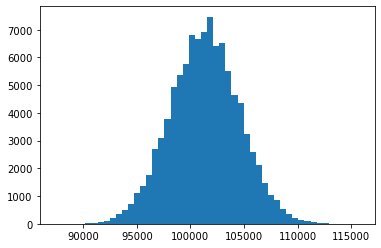

In [13]:
#graph basic graphs to understand distribution
x = dict(d).values()
plt.hist(x,50)

In [14]:
#used to save all data into csv for graphing in Excel
my_dictionary = dict(d)

with open('test5.csv', 'w') as f:
    for key in my_dictionary.keys():
        f.write("%s, %s\n" % (key, my_dictionary[key]))